#### MSIS model density for all observations(2015 storm)17th March at satellite altitude

In [2]:
import os
os.environ["CDF_LIB"] = "C:/Users/jose_ne/Downloads/cdf3.8.0_64bit_VS2015/lib"
from spacepy import pycdf
import pandas as pd
from pymsis import msis
import numpy as np
import spacepy.pycdf as pycdf
import matplotlib.pyplot as plt
from scipy import stats
from scipy.interpolate import griddata
from datetime import datetime
import pickle
import seaborn as sns
import xarray as xr
import os.path
from datetime import datetime, timedelta
from matplotlib.colors import Normalize
from matplotlib.ticker import FuncFormatter


### Combine 2014 - 2023 original swarm data and apex cdf file. Then calculate model density and Normalized density at altitude 453.46km

### 2014

In [4]:

def combine_cdf_files_for_each_year(base_folder_path, start_year, end_year):
    """
    Combine CDF files for each year into separate DataFrames.

    Parameters:
    - base_folder_path: str, the path to the base folder containing yearly subfolders with CDF files.
    - start_year: int, the starting year.
    - end_year: int, the ending year.

    Returns:
    - combined_dfs: dict, a dictionary where keys are years and values are DataFrames containing combined data for each year.
    """
    combined_dfs = {}

    for year in range(start_year, end_year + 1):
        year_folder_path = os.path.join(base_folder_path, f'extracted2_files_{year}')
        
        if not os.path.exists(year_folder_path):
            print(f"Folder for year {year} does not exist. Skipping...")
            continue

        cdf_files = [file for file in os.listdir(year_folder_path) if file.endswith('.cdf')]

        combined_df = pd.DataFrame()

        for cdf_filename in cdf_files:
            cdf_file_path = os.path.join(year_folder_path, cdf_filename)
            cdf_file = pycdf.CDF(cdf_file_path)
            
            data_dict = {
                'time': cdf_file['time'][:], 
                'density': cdf_file['density'][:], 
                'altitude': cdf_file['altitude'][:], 
                'latitude': cdf_file['latitude'][:], 
                'longitude': cdf_file['longitude'][:], 
                'local_solar_time': cdf_file['local_solar_time'][:]
            }
            
            df = pd.DataFrame(data_dict)
            combined_df = pd.concat([combined_df, df], ignore_index=True)

        combined_dfs[year] = combined_df

    return combined_dfs

# Example usage:
base_folder_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE'
start_year = 2014
end_year = 2023

combined_dfs = combine_cdf_files_for_each_year(base_folder_path, start_year, end_year)

# Access DataFrame for a specific year, e.g., 2014
df_2014 = combined_dfs.get(2014)
print(df_2014)


                       time       density       altitude   latitude  \
0       2014-02-01 00:00:00  5.184454e-13  494739.849495  -6.712439   
1       2014-02-01 00:00:10  5.173494e-13  494892.962741  -7.350848   
2       2014-02-01 00:00:20  5.178510e-13  495050.712763  -7.989212   
3       2014-02-01 00:00:30  5.099569e-13  495213.057146  -8.627530   
4       2014-02-01 00:00:40  5.106715e-13  495379.955465  -9.265799   
...                     ...           ...            ...        ...   
2773435 2014-12-31 23:59:10  1.113117e-12  465605.075888  54.591505   
2773436 2014-12-31 23:59:20  1.130219e-12  465467.140004  53.953853   
2773437 2014-12-31 23:59:30  1.135842e-12  465328.703263  53.316064   
2773438 2014-12-31 23:59:40  1.135665e-12  465189.856955  52.678140   
2773439 2014-12-31 23:59:50  1.141818e-12  465050.691062  52.040085   

          longitude  local_solar_time  
0        -54.571835         20.136653  
1        -54.586020         20.138484  
2        -54.600126        

In [18]:

folder_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/extracted2_files_2014'
cdf_files = [file for file in os.listdir(folder_path) if file.endswith('.cdf')]

combined_df2014 = pd.DataFrame()

for cdf_filename in cdf_files:
    cdf_file_path = os.path.join(folder_path, cdf_filename)
    
    cdf_file = cdf.CDF(cdf_file_path)
    
    variable_names = list(cdf_file.keys())
    data_dict = {'time': cdf_file['time'][:], 'density': cdf_file['density'][:], 'altitude': cdf_file['altitude'][:], 'latitude': cdf_file['latitude'][:], 'longitude': cdf_file['longitude'][:], 'local_solar_time': cdf_file['local_solar_time'][:]}
    
    df = pd.DataFrame(data_dict)
    combined_df2014 = pd.concat([combined_df2014, df], ignore_index=True)

print(combined_df2014)

                       time       density       altitude   latitude  \
0       2014-02-01 00:00:00  5.184454e-13  494739.849495  -6.712439   
1       2014-02-01 00:00:10  5.173494e-13  494892.962741  -7.350848   
2       2014-02-01 00:00:20  5.178510e-13  495050.712763  -7.989212   
3       2014-02-01 00:00:30  5.099569e-13  495213.057146  -8.627530   
4       2014-02-01 00:00:40  5.106715e-13  495379.955465  -9.265799   
...                     ...           ...            ...        ...   
2773435 2014-12-31 23:59:10  1.113117e-12  465605.075888  54.591505   
2773436 2014-12-31 23:59:20  1.130219e-12  465467.140004  53.953853   
2773437 2014-12-31 23:59:30  1.135842e-12  465328.703263  53.316064   
2773438 2014-12-31 23:59:40  1.135665e-12  465189.856955  52.678140   
2773439 2014-12-31 23:59:50  1.141818e-12  465050.691062  52.040085   

          longitude  local_solar_time  
0        -54.571835         20.136653  
1        -54.586020         20.138484  
2        -54.600126        

In [4]:

# Directory where your files are located
directory = "C:/Users/jose_ne/Documents/SAT_C"

# Get a list of all files in the directory
files = os.listdir(directory)

# Filter files ending with "_normalt_490km.cdf"
files_to_delete = [file for file in files if file.endswith("_normalt_490km.cdf")]

# Iterate over the files to delete and remove them
for file in files_to_delete:
    file_path = os.path.join(directory, file)
    os.remove(file_path)
    print(f"Deleted file: {file_path}")


Deleted file: C:/Users/jose_ne/Documents/SAT_C\SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_normalt_490km.cdf
Deleted file: C:/Users/jose_ne/Documents/SAT_C\SW_OPER_DNSCACC_2__20140202T000000_20140202T235950_normalt_490km.cdf
Deleted file: C:/Users/jose_ne/Documents/SAT_C\SW_OPER_DNSCACC_2__20140203T000000_20140203T235950_normalt_490km.cdf
Deleted file: C:/Users/jose_ne/Documents/SAT_C\SW_OPER_DNSCACC_2__20140204T000000_20140204T235950_normalt_490km.cdf
Deleted file: C:/Users/jose_ne/Documents/SAT_C\SW_OPER_DNSCACC_2__20140205T000000_20140205T235950_normalt_490km.cdf
Deleted file: C:/Users/jose_ne/Documents/SAT_C\SW_OPER_DNSCACC_2__20140206T000000_20140206T235950_normalt_490km.cdf
Deleted file: C:/Users/jose_ne/Documents/SAT_C\SW_OPER_DNSCACC_2__20140207T000000_20140207T235950_normalt_490km.cdf
Deleted file: C:/Users/jose_ne/Documents/SAT_C\SW_OPER_DNSCACC_2__20140208T000000_20140208T235950_normalt_490km.cdf
Deleted file: C:/Users/jose_ne/Documents/SAT_C\SW_OPER_DNSCACC_2__201402

In [5]:

def combine_apex_cdf_files_for_each_year(base_directory, start_year, end_year):
    """
    Combine APEX CDF files for each year into separate DataFrames.

    Parameters:
    - base_directory: str, the path to the base directory containing CDF files.
    - start_year: int, the starting year.
    - end_year: int, the ending year.

    Returns:
    - combined_dfs: dict, a dictionary where keys are years and values are DataFrames containing combined data for each year.
    """
    combined_apex_dfs = {}

    for year in range(start_year, end_year + 1):
        apex_cdf_files = []
        year_pattern = f"SW_OPER_DNSCACC_2__{year}"
        
        # Iterate over each file in the base directory
        for filename in os.listdir(base_directory):
            if filename.startswith(year_pattern) and filename.endswith("_apex.cdf"):
                file_path = os.path.join(base_directory, filename)
                cdf_data = pycdf.CDF(file_path)
                data = {key: cdf_data[key][...] for key in cdf_data.keys()}
                df = pd.DataFrame(data)
                apex_cdf_files.append(df)
                cdf_data.close()

        # Combine all DataFrames for the current year
        if apex_cdf_files:
            combined_apex_df = pd.concat(apex_cdf_files, ignore_index=True)
            combined_apex_dfs[year] = combined_apex_df
        else:
            print(f"No APEX CDF files found for year {year}")

    return combined_apex_dfs

# Example usage:
base_directory = 'C:/Users/jose_ne/Documents/SAT_C'
start_year = 2014
end_year = 2023

combined_apex_dfs = combine_apex_cdf_files_for_each_year(base_directory, start_year, end_year)

# Access DataFrame for a specific year, e.g., 2014
df_2014 = combined_apex_dfs.get(2014)
print(df_2014)


          apex_lat   apex_lon                time
0       -15.612391  17.451439 2014-02-01 00:00:00
1       -15.664187  17.278343 2014-02-01 00:00:10
2       -15.735022  17.106777 2014-02-01 00:00:20
3       -15.824543  16.936852 2014-02-01 00:00:30
4       -15.932348  16.768671 2014-02-01 00:00:40
...            ...        ...                 ...
2687035  56.400261 -86.022530 2014-12-31 23:59:10
2687036  55.799232 -85.751854 2014-12-31 23:59:20
2687037  55.198776 -85.488815 2014-12-31 23:59:30
2687038  54.598965 -85.232956 2014-12-31 23:59:40
2687039  53.999866 -84.983833 2014-12-31 23:59:50

[2687040 rows x 3 columns]


In [19]:

# Directory where your files are located
directory = "C:/Users/jose_ne/Documents/SAT_C"

# Initialize an empty list to store DataFrames
apex_cdf_files_2014 = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.startswith("SW_OPER_DNSCACC_2__2014") and filename.endswith("_apex.cdf"):
        file_path = os.path.join(directory, filename)
        cdf_data = pycdf.CDF(file_path)
        data = {key: cdf_data[key][...] for key in cdf_data.keys()}
        df = pd.DataFrame(data)
        # Append the DataFrame to the list
        apex_cdf_files_2014.append(df)
        cdf_data.close()

combined_apex_df_2014 = pd.concat(apex_cdf_files_2014, ignore_index=True)
print(combined_apex_df_2014)



          apex_lat   apex_lon                time
0       -15.612391  17.451439 2014-02-01 00:00:00
1       -15.664187  17.278343 2014-02-01 00:00:10
2       -15.735022  17.106777 2014-02-01 00:00:20
3       -15.824543  16.936852 2014-02-01 00:00:30
4       -15.932348  16.768671 2014-02-01 00:00:40
...            ...        ...                 ...
2687035  56.400261 -86.022530 2014-12-31 23:59:10
2687036  55.799232 -85.751854 2014-12-31 23:59:20
2687037  55.198776 -85.488815 2014-12-31 23:59:30
2687038  54.598965 -85.232956 2014-12-31 23:59:40
2687039  53.999866 -84.983833 2014-12-31 23:59:50

[2687040 rows x 3 columns]


In [20]:
merged_df_2014 = pd.merge(combined_df2014, combined_apex_df_2014, on='time', how='inner')
print(merged_df_2014)

                       time       density       altitude   latitude  \
0       2014-02-01 00:00:00  5.184454e-13  494739.849495  -6.712439   
1       2014-02-01 00:00:10  5.173494e-13  494892.962741  -7.350848   
2       2014-02-01 00:00:20  5.178510e-13  495050.712763  -7.989212   
3       2014-02-01 00:00:30  5.099569e-13  495213.057146  -8.627530   
4       2014-02-01 00:00:40  5.106715e-13  495379.955465  -9.265799   
...                     ...           ...            ...        ...   
2773435 2014-12-31 23:59:10  1.113117e-12  465605.075888  54.591505   
2773436 2014-12-31 23:59:20  1.130219e-12  465467.140004  53.953853   
2773437 2014-12-31 23:59:30  1.135842e-12  465328.703263  53.316064   
2773438 2014-12-31 23:59:40  1.135665e-12  465189.856955  52.678140   
2773439 2014-12-31 23:59:50  1.141818e-12  465050.691062  52.040085   

          longitude  local_solar_time   apex_lat   apex_lon  
0        -54.571835         20.136653 -15.612391  17.451439  
1        -54.586020    

In [21]:

# Read the CSV file and create a DataFrame
kpapdf_2014 = pd.read_csv('kpap - Sheet1.csv')

# Display the DataFrame
print(kpapdf_2014)

      YYY  MM  DD   days   days_m   Bsr  dB    Kp1    Kp2    Kp3  ...  ap4  \
0    2014   2   1  29982  29982.5  2462  22  0.000  0.000  0.333  ...    2   
1    2014   2   2  29983  29983.5  2462  23  0.667  2.000  1.000  ...    0   
2    2014   2   3  29984  29984.5  2462  24  2.000  2.333  1.667  ...    5   
3    2014   2   4  29985  29985.5  2462  25  1.667  1.333  0.667  ...    3   
4    2014   2   5  29986  29986.5  2462  26  0.667  0.667  0.333  ...    0   
..    ...  ..  ..    ...      ...   ...  ..    ...    ...    ...  ...  ...   
329  2014  12  27  30311  30311.5  2474  27  3.333  2.000  1.333  ...    6   
330  2014  12  28  30312  30312.5  2475   1  2.333  2.000  1.333  ...    5   
331  2014  12  29  30313  30313.5  2475   2  2.000  3.000  2.333  ...   18   
332  2014  12  30  30314  30314.5  2475   3  3.000  4.000  3.667  ...    7   
333  2014  12  31  30315  30315.5  2475   4  1.333  2.333  1.333  ...    6   

     ap5  ap6  ap7  ap8  Ap   SN  F10.7obs  F10.7adj  D  
0    

In [22]:

merged_df_2014['time'] = pd.to_datetime(merged_df_2014['time'])

# Extract year, month, and day
merged_df_2014['Year'] = merged_df_2014['time'].dt.year
merged_df_2014['Month'] = merged_df_2014['time'].dt.month
merged_df_2014['Day'] = merged_df_2014['time'].dt.day
merged_df_2014 = pd.merge(merged_df_2014, kpapdf_2014[['YYY', 'MM', 'DD', 'F10.7adj','Ap']], 
                       how='left', 
                       left_on=['Year', 'Month', 'Day'], 
                       right_on=['YYY', 'MM', 'DD'])

# Drop the extra date columns from the merge result
merged_df_2014.drop(['YYY', 'MM', 'DD'], axis=1, inplace=True)

'''filtered_df_14 = merged_df_2014[((merged_df_2014['apex_lat'] >= 65) & (merged_df_2014['apex_lat'] <= 67.5)) | ((merged_df_2014['apex_lat'] >= -67.5) & (merged_df_2014['apex_lat'] <= -65))]
filtered_df_14_65_to_67_5 = pd.DataFrame(filtered_df_14)
print(filtered_df_14_65_to_67_5)
'''



# Reduce memory usage of data types
merged_df_2014['latitude'] = merged_df_2014['latitude'].astype('float32')
merged_df_2014['longitude'] = merged_df_2014['longitude'].astype('float32')
merged_df_2014['altitude'] = merged_df_2014['altitude'].astype('float32')
merged_df_2014['F10.7adj'] = merged_df_2014['F10.7adj'].astype('float32')
merged_df_2014['Ap'] = merged_df_2014['Ap'].astype('float32')

lats = merged_df_2014['latitude'].values
lons = merged_df_2014['longitude'].values
alt = merged_df_2014['altitude'].values
altitude_km = alt / 1000
date = merged_df_2014['time'].values
f107 = merged_df_2014['F10.7adj'].values
f107a = np.full_like(date, 155.58, dtype='float32')  # Use numpy to create an array of constant values
ap = merged_df_2014['Ap'].values


aps = np.tile(ap.reshape(-1, 1), (1, 7))  # Reshape ap values and tile for proper shape

# Run MSIS model
output = msis.run(date, lons, lats, altitude_km, f107, f107a, aps)

# Process output
msis_z_14 = np.squeeze(output)
msis_dens_z_14 = msis_z_14[:, 0]
msis_z_df_14 = pd.DataFrame(msis_dens_z_14, columns=['Column1'])

print(msis_z_df_14)
merged_df_2014['msis_allalt'] = msis_z_df_14

##model density calculation for constante alt 490

alt_453 = [453.46]*len(date)
output = msis.run(date, lons, lats, alt_453, f107, f107a, aps)

msis_z0_14 = np.squeeze(output)
msis_dens_z0_14 = msis_z0_14[:,0]
msis_z0_df_14 = pd.DataFrame(msis_dens_z0_14, columns=['Column2'])
print(msis_z0_df_14)

merged_df_2014['msis_constantalt'] = msis_z0_df_14
print(merged_df_2014)

              Column1
0        7.757510e-13
1        7.737749e-13
2        7.719300e-13
3        7.702168e-13
4        7.686536e-13
...               ...
2773435  1.274666e-12
2773436  1.290598e-12
2773437  1.306548e-12
2773438  1.322512e-12
2773439  1.338437e-12

[2773440 rows x 1 columns]
              Column2
0        1.471590e-12
1        1.471372e-12
2        1.471480e-12
3        1.471908e-12
4        1.472698e-12
...               ...
2773435  1.557261e-12
2773436  1.572617e-12
2773437  1.587900e-12
2773438  1.603100e-12
2773439  1.618164e-12

[2773440 rows x 1 columns]
                       time       density      altitude   latitude  \
0       2014-02-01 00:00:00  5.184454e-13  494739.84375  -6.712439   
1       2014-02-01 00:00:10  5.173494e-13  494892.96875  -7.350848   
2       2014-02-01 00:00:20  5.178510e-13  495050.71875  -7.989212   
3       2014-02-01 00:00:30  5.099569e-13  495213.06250  -8.627530   
4       2014-02-01 00:00:40  5.106715e-13  495379.96875  -9.265800

#### Normalized density for 2014 at a constant altitude 453.46km

In [23]:
dens_z = merged_df_2014['density']
dens_Mz = merged_df_2014['msis_allalt']
dens_Mz0 = merged_df_2014['msis_constantalt']

dens_z0 = dens_z * dens_Mz0 / dens_Mz
merged_df_2014['Norm_dens_alt453.46'] = dens_z0
print(merged_df_2014)

                       time       density      altitude   latitude  \
0       2014-02-01 00:00:00  5.184454e-13  494739.84375  -6.712439   
1       2014-02-01 00:00:10  5.173494e-13  494892.96875  -7.350848   
2       2014-02-01 00:00:20  5.178510e-13  495050.71875  -7.989212   
3       2014-02-01 00:00:30  5.099569e-13  495213.06250  -8.627530   
4       2014-02-01 00:00:40  5.106715e-13  495379.96875  -9.265800   
...                     ...           ...           ...        ...   
2773435 2014-12-31 23:59:10  1.113117e-12  465605.06250  54.591503   
2773436 2014-12-31 23:59:20  1.130219e-12  465467.12500  53.953854   
2773437 2014-12-31 23:59:30  1.135842e-12  465328.71875  53.316063   
2773438 2014-12-31 23:59:40  1.135665e-12  465189.84375  52.678139   
2773439 2014-12-31 23:59:50  1.141818e-12  465050.68750  52.040085   

          longitude  local_solar_time   apex_lat   apex_lon  Year  Month  Day  \
0        305.428162         20.136653 -15.612391  17.451439  2014      2    1 

### 2015

In [24]:

folder_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/extracted2_files_2015'
cdf_files = [file for file in os.listdir(folder_path) if file.endswith('.cdf')]

combined_df2015 = pd.DataFrame()

for cdf_filename in cdf_files:
    cdf_file_path = os.path.join(folder_path, cdf_filename)
    
    cdf_file = cdf.CDF(cdf_file_path)
    
    variable_names = list(cdf_file.keys())
    data_dict = {'time': cdf_file['time'][:], 'density': cdf_file['density'][:], 'altitude': cdf_file['altitude'][:], 'latitude': cdf_file['latitude'][:], 'longitude': cdf_file['longitude'][:], 'local_solar_time': cdf_file['local_solar_time'][:]}
    
    df = pd.DataFrame(data_dict)
    combined_df2015 = pd.concat([combined_df2015, df], ignore_index=True)

print(combined_df2015)

                       time       density       altitude   latitude  \
0       2015-01-01 00:00:00  1.143155e-12  464911.520062  51.401898   
1       2015-01-01 00:00:10  1.168639e-12  464771.991853  50.763584   
2       2015-01-01 00:00:20  1.174616e-12  464632.419988  50.125145   
3       2015-01-01 00:00:30  1.174530e-12  464492.898033  49.486582   
4       2015-01-01 00:00:40  1.201540e-12  464353.516623  48.847898   
...                     ...           ...            ...        ...   
2367355 2015-12-31 23:59:10  2.011051e-12  474507.292314 -69.823864   
2367356 2015-12-31 23:59:20  2.057783e-12  474672.345938 -70.454325   
2367357 2015-12-31 23:59:30  2.089454e-12  474832.827008 -71.084346   
2367358 2015-12-31 23:59:40  2.152198e-12  474988.669475 -71.713888   
2367359 2015-12-31 23:59:50  9.990000e+32  475139.810473 -72.342909   

          longitude  local_solar_time  
0       -145.695491         14.233277  
1       -145.662834         14.238231  
2       -145.632174        

In [25]:

# Directory where your files are located
directory = "C:/Users/jose_ne/Documents/SAT_C"

# Initialize an empty list to store DataFrames
apex_cdf_files_2015 = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.startswith("SW_OPER_DNSCACC_2__2015") and filename.endswith("_apex.cdf"):
        file_path = os.path.join(directory, filename)
        cdf_data = pycdf.CDF(file_path)
        data = {key: cdf_data[key][...] for key in cdf_data.keys()}
        df = pd.DataFrame(data)
        # Append the DataFrame to the list
        apex_cdf_files_2015.append(df)
        cdf_data.close()

combined_apex_df_2015 = pd.concat(apex_cdf_files_2015, ignore_index=True)
print(combined_apex_df_2015)


          apex_lat    apex_lon                time
0        53.401558  -84.740608 2015-01-01 00:00:00
1        52.804081  -84.503822 2015-01-01 00:00:10
2        52.207504  -84.272667 2015-01-01 00:00:20
3        51.611881  -84.046822 2015-01-01 00:00:30
4        51.017273  -83.825981 2015-01-01 00:00:40
...            ...         ...                 ...
2367355 -80.038811  117.687057 2015-12-31 23:59:10
2367356 -80.462914  115.176857 2015-12-31 23:59:20
2367357 -80.868286  112.449867 2015-12-31 23:59:30
2367358 -81.252426  109.487717 2015-12-31 23:59:40
2367359 -81.612503  106.273293 2015-12-31 23:59:50

[2367360 rows x 3 columns]


In [26]:
merged_df_2015 = pd.merge(combined_df2015, combined_apex_df_2015, on='time', how='inner')
print(merged_df_2015)

                       time       density       altitude   latitude  \
0       2015-01-01 00:00:00  1.143155e-12  464911.520062  51.401898   
1       2015-01-01 00:00:10  1.168639e-12  464771.991853  50.763584   
2       2015-01-01 00:00:20  1.174616e-12  464632.419988  50.125145   
3       2015-01-01 00:00:30  1.174530e-12  464492.898033  49.486582   
4       2015-01-01 00:00:40  1.201540e-12  464353.516623  48.847898   
...                     ...           ...            ...        ...   
2367355 2015-12-31 23:59:10  2.011051e-12  474507.292314 -69.823864   
2367356 2015-12-31 23:59:20  2.057783e-12  474672.345938 -70.454325   
2367357 2015-12-31 23:59:30  2.089454e-12  474832.827008 -71.084346   
2367358 2015-12-31 23:59:40  2.152198e-12  474988.669475 -71.713888   
2367359 2015-12-31 23:59:50  9.990000e+32  475139.810473 -72.342909   

          longitude  local_solar_time   apex_lat    apex_lon  
0       -145.695491         14.233277  53.401558  -84.740608  
1       -145.662834  

[7.2459806e-14]
[2.0369136e-12]
[2.935306e-13]
[5.0541125e-12]


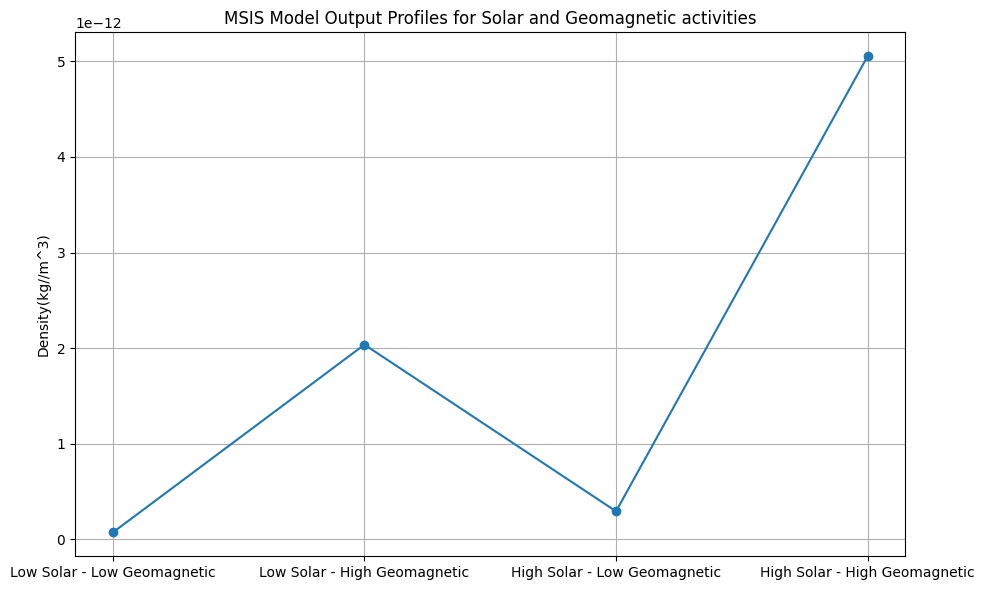

In [153]:

first_row = merged_df.iloc[0]

lat = first_row['latitude']
lon = first_row['longitude']
alt = first_row['altitude'] / 1000  # Convert altitude to km
date = first_row['time']

f107_low = 60
f107_high = 200
ap_low = 10
ap_high = 200

# Run MSIS model for low solar and low geomagnetic activity
output_low_low = msis.run(date, lon, lat, alt, f107_low, ap_low)

# Run MSIS model for low solar and high geomagnetic activity
output_low_high = msis.run(date, lon, lat, alt, f107_low, ap_high)

# Run MSIS model for high solar and low geomagnetic activity
output_high_low = msis.run(date, lon, lat, alt, f107_high, ap_low)

# Run MSIS model for high solar and high geomagnetic activity
output_high_high = msis.run(date, lon, lat, alt, f107_high, ap_high)

f107_low_ap_low = output_low_low[:, 0]  # Extract density values
print(f107_low_ap_low)
f107_low_ap_high = output_low_high[:, 0]
print(f107_low_ap_high)
f107_high_ap_low = output_high_low[:, 0]
print(f107_high_ap_low)
f107_high_ap_high = output_high_high[:, 0]
print(f107_high_ap_high)


import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot([1, 2, 3, 4], [f107_low_ap_low, f107_low_ap_high, f107_high_ap_low, f107_high_ap_high], 
         marker='o', linestyle='-')

# Customize the x-axis labels
plt.xticks([1, 2, 3, 4], ['Low Solar - Low Geomagnetic', 'Low Solar - High Geomagnetic', 
                          'High Solar - Low Geomagnetic', 'High Solar - High Geomagnetic'])

plt.ylabel('Density(kg//m^3)')
plt.title('MSIS Model Output Profiles for Solar and Geomagnetic activities')
plt.grid(True)
plt.tight_layout()
plt.show()


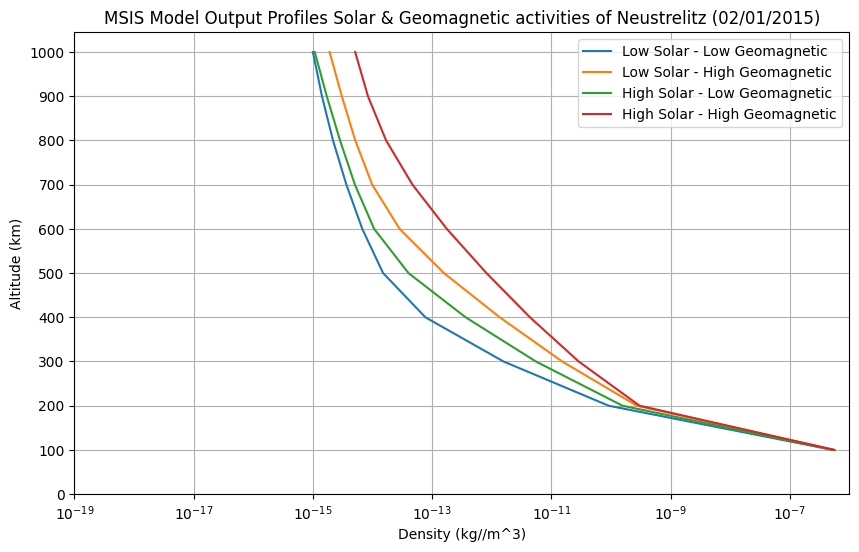

In [15]:

# Define latitude and longitude for Neustrelitz
neustrelitz_lat = 53.3606
neustrelitz_lon = 13.1664

# Define altitude range from 100 to 1000 km
altitudes = range(100, 1001, 100)

# Define date
date = '2014-02-01'

# Initialize lists to store density values for each condition
densities_low_low = []
densities_low_high = []
densities_high_low = []
densities_high_high = []

f107_low = 60
f107_high = 200
ap_low = 10
ap_high = 200


# Loop through altitudes and compute MSIS model for each condition
for alt in altitudes:
    # Run MSIS model for low solar and low geomagnetic activity
    output_low_low = msis.run(date, neustrelitz_lon, neustrelitz_lat, alt, f107_low, ap_low)
    densities_low_low.append(output_low_low[:, 0])

    # Run MSIS model for low solar and high geomagnetic activity
    output_low_high = msis.run(date, neustrelitz_lon, neustrelitz_lat, alt, f107_low, ap_high)
    densities_low_high.append(output_low_high[:, 0])

    # Run MSIS model for high solar and low geomagnetic activity
    output_high_low = msis.run(date, neustrelitz_lon, neustrelitz_lat, alt, f107_high, ap_low)
    densities_high_low.append(output_high_low[:, 0])

    # Run MSIS model for high solar and high geomagnetic activity
    output_high_high = msis.run(date, neustrelitz_lon, neustrelitz_lat, alt, f107_high, ap_high)
    densities_high_high.append(output_high_high[:, 0])

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(densities_low_low, altitudes, label='Low Solar - Low Geomagnetic')
plt.plot(densities_low_high, altitudes, label='Low Solar - High Geomagnetic')
plt.plot(densities_high_low, altitudes, label='High Solar - Low Geomagnetic')
plt.plot(densities_high_high, altitudes, label='High Solar - High Geomagnetic')

plt.title('MSIS Model Output Profiles Solar & Geomagnetic activities of Neustrelitz (02/01/2015)')
plt.xlabel('Density (kg//m^3)')
plt.ylabel('Altitude (km)')
plt.legend()
plt.xscale('log')# Set x-axis to log scale
plt.xlim(1e-19, 1e-6)  # Set x-axis limits
plt.yticks(range(0, 1001, 100))
plt.grid(True)
plt.show()




In [27]:

# Read the CSV file and create a DataFrame
kpapdf_2015 = pd.read_csv('kpap_2015 - Sheet2.csv')

# Display the DataFrame
print(kpapdf_2015)

      YYY  MM  DD   days   days_m   Bsr  dB    Kp1    Kp2    Kp3  ...  ap4  \
0    2015   1   1  30316  30316.5  2475   5  2.333  1.000  1.000  ...    4   
1    2015   1   2  30317  30317.5  2475   6  3.000  1.000  1.333  ...    6   
2    2015   1   3  30318  30318.5  2475   7  4.667  3.000  2.333  ...   15   
3    2015   1   4  30319  30319.5  2475   8  0.667  1.000  2.000  ...   18   
4    2015   1   5  30320  30320.5  2475   9  5.333  3.000  2.333  ...    6   
..    ...  ..  ..    ...      ...   ...  ..    ...    ...    ...  ...  ...   
360  2015  12  27  30676  30676.5  2488  14  2.667  2.000  2.333  ...    9   
361  2015  12  28  30677  30677.5  2488  15  1.333  0.667  1.333  ...    7   
362  2015  12  29  30678  30678.5  2488  16  2.333  0.667  0.333  ...    3   
363  2015  12  30  30679  30679.5  2488  17  0.000  0.000  0.333  ...    3   
364  2015  12  31  30680  30680.5  2488  18  3.333  3.000  3.667  ...   27   

     ap5  ap6  ap7  ap8  Ap   SN  F10.7obs  F10.7adj  D  
0    

In [28]:

merged_df_2015['time'] = pd.to_datetime(merged_df_2015['time'])

# Extract year, month, and day
merged_df_2015['Year'] = merged_df_2015['time'].dt.year
merged_df_2015['Month'] = merged_df_2015['time'].dt.month
merged_df_2015['Day'] = merged_df_2015['time'].dt.day
merged_df_2015 = pd.merge(merged_df_2015, kpapdf_2015[['YYY', 'MM', 'DD', 'F10.7adj','Ap']], 
                       how='left', 
                       left_on=['Year', 'Month', 'Day'], 
                       right_on=['YYY', 'MM', 'DD'])

# Drop the extra date columns from the merge result
merged_df_2015.drop(['YYY', 'MM', 'DD'], axis=1, inplace=True)




# Reduce memory usage of data types
merged_df_2015['latitude'] = merged_df_2015['latitude'].astype('float32')
merged_df_2015['longitude'] = merged_df_2015['longitude'].astype('float32')
merged_df_2015['altitude'] = merged_df_2015['altitude'].astype('float32')
merged_df_2015['F10.7adj'] = merged_df_2015['F10.7adj'].astype('float32')
merged_df_2015['Ap'] = merged_df_2015['Ap'].astype('float32')

lats = merged_df_2015['latitude'].values
lons = merged_df_2015['longitude'].values
alt = merged_df_2015['altitude'].values
altitude_km = alt / 1000
date = merged_df_2015['time'].values
f107 = merged_df_2015['F10.7adj'].values
f107a = np.full_like(date, 127.17, dtype='float32')  # Use numpy to create an array of constant values
ap = merged_df_2015['Ap'].values


aps = np.tile(ap.reshape(-1, 1), (1, 7))  # Reshape ap values and tile for proper shape

# Run MSIS model
output = msis.run(date, lons, lats, altitude_km, f107, f107a, aps)

# Process output
msis_z_15 = np.squeeze(output)
msis_dens_z_15 = msis_z_15[:, 0]
msis_z_df_15 = pd.DataFrame(msis_dens_z_15, columns=['Column1'])

print(msis_z_df_15)
merged_df_2015['msis_allalt'] = msis_z_df_15

##model density calculation for constante alt 490

alt_453 = [453.46]*len(date)
output = msis.run(date, lons, lats, alt_453, f107, f107a, aps)

msis_z0_15 = np.squeeze(output)
msis_dens_z0_15 = msis_z0_15[:,0]
msis_z0_df_15 = pd.DataFrame(msis_dens_z0_15, columns=['Column2'])
print(msis_z0_df_15)

merged_df_2015['msis_constantalt'] = msis_z0_df_15
print(merged_df_2015)

              Column1
0        9.951088e-13
1        1.007023e-12
2        1.018904e-12
3        1.030708e-12
4        1.042451e-12
...               ...
2367355  7.338586e-13
2367356  7.357748e-13
2367357  7.375017e-13
2367358  7.390611e-13
2367359  7.404385e-13

[2367360 rows x 1 columns]
              Column2
0        1.207266e-12
1        1.218441e-12
2        1.229509e-12
3        1.240431e-12
4        1.251221e-12
...               ...
2367355  1.027696e-12
2367356  1.033520e-12
2367357  1.039037e-12
2367358  1.044266e-12
2367359  1.049188e-12

[2367360 rows x 1 columns]
                       time       density      altitude   latitude  \
0       2015-01-01 00:00:00  1.143155e-12  464911.53125  51.401897   
1       2015-01-01 00:00:10  1.168639e-12  464772.00000  50.763584   
2       2015-01-01 00:00:20  1.174616e-12  464632.40625  50.125145   
3       2015-01-01 00:00:30  1.174530e-12  464492.90625  49.486584   
4       2015-01-01 00:00:40  1.201540e-12  464353.53125  48.847897

#### Normalized density for 2015 at a constant altitude 453.46km

In [29]:
dens_z = merged_df_2015['density']
dens_Mz = merged_df_2015['msis_allalt']
dens_Mz0 = merged_df_2015['msis_constantalt']

dens_z0 = dens_z * dens_Mz0 / dens_Mz
merged_df_2015['Norm_dens_alt453.46'] = dens_z0
print(merged_df_2015)

                       time       density      altitude   latitude  \
0       2015-01-01 00:00:00  1.143155e-12  464911.53125  51.401897   
1       2015-01-01 00:00:10  1.168639e-12  464772.00000  50.763584   
2       2015-01-01 00:00:20  1.174616e-12  464632.40625  50.125145   
3       2015-01-01 00:00:30  1.174530e-12  464492.90625  49.486584   
4       2015-01-01 00:00:40  1.201540e-12  464353.53125  48.847897   
...                     ...           ...           ...        ...   
2367355 2015-12-31 23:59:10  2.011051e-12  474507.28125 -69.823868   
2367356 2015-12-31 23:59:20  2.057783e-12  474672.34375 -70.454323   
2367357 2015-12-31 23:59:30  2.089454e-12  474832.81250 -71.084343   
2367358 2015-12-31 23:59:40  2.152198e-12  474988.65625 -71.713890   
2367359 2015-12-31 23:59:50  9.990000e+32  475139.81250 -72.342911   

          longitude  local_solar_time   apex_lat    apex_lon  Year  Month  \
0        214.304504         14.233277  53.401558  -84.740608  2015      1   
1    

### 2016

In [30]:

folder_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/extracted2_files_2016'
cdf_files = [file for file in os.listdir(folder_path) if file.endswith('.cdf')]

combined_df2016 = pd.DataFrame()

for cdf_filename in cdf_files:
    cdf_file_path = os.path.join(folder_path, cdf_filename)
    
    cdf_file = cdf.CDF(cdf_file_path)
    
    variable_names = list(cdf_file.keys())
    data_dict = {'time': cdf_file['time'][:], 'density': cdf_file['density'][:], 'altitude': cdf_file['altitude'][:], 'latitude': cdf_file['latitude'][:], 'longitude': cdf_file['longitude'][:], 'local_solar_time': cdf_file['local_solar_time'][:]}
    
    df = pd.DataFrame(data_dict)
    combined_df2016 = pd.concat([combined_df2016, df], ignore_index=True)

print(combined_df2016)

                       time       density       altitude   latitude  \
0       2016-01-01 00:00:00  9.990000e+32  475286.272480 -72.971362   
1       2016-01-01 00:00:10  9.990000e+32  475427.829465 -73.599187   
2       2016-01-01 00:00:20  1.109534e-13  475564.505825 -74.226319   
3       2016-01-01 00:00:30  1.248728e-13  475696.245838 -74.852680   
4       2016-01-01 00:00:40  1.662133e-13  475822.997275 -75.478181   
...                     ...           ...            ...        ...   
3144955 2016-12-31 23:59:10  1.453367e-13  451662.922206  66.229445   
3144956 2016-12-31 23:59:20  1.419912e-13  451769.854047  66.865704   
3144957 2016-12-31 23:59:30  1.425743e-13  451874.636806  67.501674   
3144958 2016-12-31 23:59:40  1.460949e-13  451977.204387  68.137337   
3144959 2016-12-31 23:59:50  1.425884e-13  452077.492914  68.772670   

          longitude  local_solar_time  
0         94.397939          6.241574  
1         94.710303          6.265175  
2         95.050010        

In [31]:

# Directory where your files are located
directory = "C:/Users/jose_ne/Documents/SAT_C"

# Initialize an empty list to store DataFrames
apex_cdf_files_2016 = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.startswith("SW_OPER_DNSCACC_2__2016") and filename.endswith("_apex.cdf"):
        file_path = os.path.join(directory, filename)
        cdf_data = pycdf.CDF(file_path)
        data = {key: cdf_data[key][...] for key in cdf_data.keys()}
        df = pd.DataFrame(data)
        # Append the DataFrame to the list
        apex_cdf_files_2016.append(df)
        cdf_data.close()

combined_apex_df_2016 = pd.concat(apex_cdf_files_2016, ignore_index=True)
print(combined_apex_df_2016)

          apex_lat    apex_lon                time
0       -81.945396  102.792732 2016-01-01 00:00:00
1       -82.247627   99.035934 2016-01-01 00:00:10
2       -82.515579   95.001358 2016-01-01 00:00:20
3       -82.745483   90.697258 2016-01-01 00:00:30
4       -82.933670   86.144646 2016-01-01 00:00:40
...            ...         ...                 ...
3144955  61.872841 -151.686951 2016-12-31 23:59:10
3144956  62.507904 -151.768402 2016-12-31 23:59:20
3144957  63.142471 -151.853989 2016-12-31 23:59:30
3144958  63.776493 -151.943893 2016-12-31 23:59:40
3144959  64.409920 -152.038239 2016-12-31 23:59:50

[3144960 rows x 3 columns]


In [32]:
merged_df_2016 = pd.merge(combined_df2016, combined_apex_df_2016, on='time', how='inner')
print(merged_df_2016)

                       time       density       altitude   latitude  \
0       2016-01-01 00:00:00  9.990000e+32  475286.272480 -72.971362   
1       2016-01-01 00:00:10  9.990000e+32  475427.829465 -73.599187   
2       2016-01-01 00:00:20  1.109534e-13  475564.505825 -74.226319   
3       2016-01-01 00:00:30  1.248728e-13  475696.245838 -74.852680   
4       2016-01-01 00:00:40  1.662133e-13  475822.997275 -75.478181   
...                     ...           ...            ...        ...   
3144955 2016-12-31 23:59:10  1.453367e-13  451662.922206  66.229445   
3144956 2016-12-31 23:59:20  1.419912e-13  451769.854047  66.865704   
3144957 2016-12-31 23:59:30  1.425743e-13  451874.636806  67.501674   
3144958 2016-12-31 23:59:40  1.460949e-13  451977.204387  68.137337   
3144959 2016-12-31 23:59:50  1.425884e-13  452077.492914  68.772670   

          longitude  local_solar_time   apex_lat    apex_lon  
0         94.397939          6.241574 -81.945396  102.792732  
1         94.710303  

In [33]:

# Read the CSV file and create a DataFrame
kpapdf_2016 = pd.read_csv('kpap_2016 - Sheet2.csv')

# Display the DataFrame
print(kpapdf_2016)

      YYY  MM  DD   days   days_m   Bsr  dB    Kp1    Kp2    Kp3  ...  ap4  \
0    2016   1   1  30681  30681.5  2488  19  6.000  5.333  5.000  ...   18   
1    2016   1   2  30682  30682.5  2488  20  3.000  2.333  3.000  ...    9   
2    2016   1   3  30683  30683.5  2488  21  0.333  1.667  2.000  ...    3   
3    2016   1   4  30684  30684.5  2488  22  0.333  1.667  1.667  ...    3   
4    2016   1   5  30685  30685.5  2488  23  0.333  1.000  1.000  ...    6   
..    ...  ..  ..    ...      ...   ...  ..    ...    ...    ...  ...  ...   
361  2016  12  27  31042  31042.5  2502   2  3.667  3.333  2.000  ...    7   
362  2016  12  28  31043  31043.5  2502   3  1.667  2.000  0.333  ...    3   
363  2016  12  29  31044  31044.5  2502   4  2.000  1.000  0.333  ...    4   
364  2016  12  30  31045  31045.5  2502   5  0.000  1.333  0.333  ...    2   
365  2016  12  31  31046  31046.5  2502   6  0.667  2.333  2.000  ...   12   

     ap5  ap6  ap7  ap8  Ap  SN  F10.7obs  F10.7adj  D  
0     

In [34]:

merged_df_2016['time'] = pd.to_datetime(merged_df_2016['time'])

# Extract year, month, and day
merged_df_2016['Year'] = merged_df_2016['time'].dt.year
merged_df_2016['Month'] = merged_df_2016['time'].dt.month
merged_df_2016['Day'] = merged_df_2016['time'].dt.day
merged_df_2016 = pd.merge(merged_df_2016, kpapdf_2016[['YYY', 'MM', 'DD', 'F10.7adj','Ap']], 
                       how='left', 
                       left_on=['Year', 'Month', 'Day'], 
                       right_on=['YYY', 'MM', 'DD'])

# Drop the extra date columns from the merge result
merged_df_2016.drop(['YYY', 'MM', 'DD'], axis=1, inplace=True)




# Reduce memory usage of data types
merged_df_2016['latitude'] = merged_df_2016['latitude'].astype('float32')
merged_df_2016['longitude'] = merged_df_2016['longitude'].astype('float32')
merged_df_2016['altitude'] = merged_df_2016['altitude'].astype('float32')
merged_df_2016['F10.7adj'] = merged_df_2016['F10.7adj'].astype('float32')
merged_df_2016['Ap'] = merged_df_2016['Ap'].astype('float32')

lats = merged_df_2016['latitude'].values
lons = merged_df_2016['longitude'].values
alt = merged_df_2016['altitude'].values
altitude_km = alt / 1000
date = merged_df_2016['time'].values
f107 = merged_df_2016['F10.7adj'].values
f107a = np.full_like(date, 98.58, dtype='float32')  # Use numpy to create an array of constant values
ap = merged_df_2016['Ap'].values


aps = np.tile(ap.reshape(-1, 1), (1, 7))  # Reshape ap values and tile for proper shape

# Run MSIS model
output = msis.run(date, lons, lats, altitude_km, f107, f107a, aps)

# Process output
msis_z_16 = np.squeeze(output)
msis_dens_z_16 = msis_z_16[:, 0]
msis_z_df_16 = pd.DataFrame(msis_dens_z_16, columns=['Column1'])

print(msis_z_df_16)
merged_df_2016['msis_allalt'] = msis_z_df_16

##model density calculation for constante alt 490

alt_453 = [453.46]*len(date)
output = msis.run(date, lons, lats, alt_453, f107, f107a, aps)

msis_z0_16 = np.squeeze(output)
msis_dens_z0_16 = msis_z0_16[:,0]
msis_z0_df_16 = pd.DataFrame(msis_dens_z0_16, columns=['Column2'])
print(msis_z0_df_16)

merged_df_2016['msis_constantalt'] = msis_z0_df_16
print(merged_df_2016)

              Column1
0        5.164447e-13
1        5.170864e-13
2        5.176032e-13
3        5.179868e-13
4        5.182542e-13
...               ...
3144955  3.045881e-13
3144956  3.066344e-13
3144957  3.087225e-13
3144958  3.108525e-13
3144959  3.130172e-13

[3144960 rows x 1 columns]
              Column2
0        7.430919e-13
1        7.461211e-13
2        7.489282e-13
3        7.514951e-13
4        7.538409e-13
...               ...
3144955  2.940730e-13
3144956  2.966817e-13
3144957  2.993269e-13
3144958  3.020073e-13
3144959  3.047158e-13

[3144960 rows x 1 columns]
                       time       density      altitude   latitude  \
0       2016-01-01 00:00:00  9.990000e+32  475286.28125 -72.971359   
1       2016-01-01 00:00:10  9.990000e+32  475427.84375 -73.599190   
2       2016-01-01 00:00:20  1.109534e-13  475564.50000 -74.226318   
3       2016-01-01 00:00:30  1.248728e-13  475696.25000 -74.852684   
4       2016-01-01 00:00:40  1.662133e-13  475823.00000 -75.478180

#### Normalized density for 2016 at a constant altitude 453.46km

In [35]:
dens_z = merged_df_2016['density']
dens_Mz = merged_df_2016['msis_allalt']
dens_Mz0 = merged_df_2016['msis_constantalt']

dens_z0 = dens_z * dens_Mz0 / dens_Mz
merged_df_2016['Norm_dens_alt453.46'] = dens_z0
print(merged_df_2016)

                       time       density      altitude   latitude  \
0       2016-01-01 00:00:00  9.990000e+32  475286.28125 -72.971359   
1       2016-01-01 00:00:10  9.990000e+32  475427.84375 -73.599190   
2       2016-01-01 00:00:20  1.109534e-13  475564.50000 -74.226318   
3       2016-01-01 00:00:30  1.248728e-13  475696.25000 -74.852684   
4       2016-01-01 00:00:40  1.662133e-13  475823.00000 -75.478180   
...                     ...           ...           ...        ...   
3144955 2016-12-31 23:59:10  1.453367e-13  451662.93750  66.229446   
3144956 2016-12-31 23:59:20  1.419912e-13  451769.84375  66.865707   
3144957 2016-12-31 23:59:30  1.425743e-13  451874.62500  67.501671   
3144958 2016-12-31 23:59:40  1.460949e-13  451977.21875  68.137337   
3144959 2016-12-31 23:59:50  1.425884e-13  452077.50000  68.772667   

          longitude  local_solar_time   apex_lat    apex_lon  Year  Month  \
0         94.397942          6.241574 -81.945396  102.792732  2016      1   
1    

### 2017

In [36]:

folder_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/extracted2_files_2017'
cdf_files = [file for file in os.listdir(folder_path) if file.endswith('.cdf')]

combined_df2017 = pd.DataFrame()

for cdf_filename in cdf_files:
    cdf_file_path = os.path.join(folder_path, cdf_filename)
    
    cdf_file = cdf.CDF(cdf_file_path)
    
    variable_names = list(cdf_file.keys())
    data_dict = {'time': cdf_file['time'][:], 'density': cdf_file['density'][:], 'altitude': cdf_file['altitude'][:], 'latitude': cdf_file['latitude'][:], 'longitude': cdf_file['longitude'][:], 'local_solar_time': cdf_file['local_solar_time'][:]}
    
    df = pd.DataFrame(data_dict)
    combined_df2017 = pd.concat([combined_df2017, df], ignore_index=True)

print(combined_df2017)

                       time       density       altitude   latitude  \
0       2017-01-01 00:00:00  1.449507e-13  452171.243104  69.407651   
1       2017-01-01 00:00:10  1.352436e-13  452271.112329  70.042253   
2       2017-01-01 00:00:20  1.501158e-13  452364.181781  70.676443   
3       2017-01-01 00:00:30  1.417689e-13  452454.724238  71.310188   
4       2017-01-01 00:00:40  1.399850e-13  452542.682306  71.943448   
...                     ...           ...            ...        ...   
3049915 2017-12-31 23:59:10  2.467351e-13  448669.228868  70.551239   
3049916 2017-12-31 23:59:20  2.535151e-13  448575.766578  69.916430   
3049917 2017-12-31 23:59:30  2.673743e-13  448479.875900  69.281217   
3049918 2017-12-31 23:59:40  2.588126e-13  448381.616673  68.645630   
3049919 2017-12-31 23:59:50  2.738814e-13  448281.052822  68.009695   

          longitude  local_solar_time  
0        138.948623          9.205636  
1        139.152122          9.221980  
2        139.371044        

In [37]:

# Directory where your files are located
directory = "C:/Users/jose_ne/Documents/SAT_C"

# Initialize an empty list to store DataFrames
apex_cdf_files_2017 = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.startswith("SW_OPER_DNSCACC_2__2017") and filename.endswith("_apex.cdf"):
        file_path = os.path.join(directory, filename)
        cdf_data = pycdf.CDF(file_path)
        data = {key: cdf_data[key][...] for key in cdf_data.keys()}
        df = pd.DataFrame(data)
        # Append the DataFrame to the list
        apex_cdf_files_2017.append(df)
        cdf_data.close()

combined_apex_df_2017 = pd.concat(apex_cdf_files_2017, ignore_index=True)
print(combined_apex_df_2017)

          apex_lat    apex_lon                time
0        65.042816 -152.136902 2017-01-01 00:00:00
1        65.674934 -152.240692 2017-01-01 00:00:10
2        66.306328 -152.349457 2017-01-01 00:00:20
3        66.936958 -152.463470 2017-01-01 00:00:30
4        67.566788 -152.582962 2017-01-01 00:00:40
...            ...         ...                 ...
3049915  67.105804 -127.497070 2017-12-31 23:59:10
3049916  66.461739 -126.918159 2017-12-31 23:59:20
3049917  65.815933 -126.372032 2017-12-31 23:59:30
3049918  65.168663 -125.856293 2017-12-31 23:59:40
3049919  64.520172 -125.368767 2017-12-31 23:59:50

[3049920 rows x 3 columns]


In [38]:
merged_df_2017 = pd.merge(combined_df2017, combined_apex_df_2017, on='time', how='inner')
print(merged_df_2017)

                       time       density       altitude   latitude  \
0       2017-01-01 00:00:00  1.449507e-13  452171.243104  69.407651   
1       2017-01-01 00:00:10  1.352436e-13  452271.112329  70.042253   
2       2017-01-01 00:00:20  1.501158e-13  452364.181781  70.676443   
3       2017-01-01 00:00:30  1.417689e-13  452454.724238  71.310188   
4       2017-01-01 00:00:40  1.399850e-13  452542.682306  71.943448   
...                     ...           ...            ...        ...   
3049915 2017-12-31 23:59:10  2.467351e-13  448669.228868  70.551239   
3049916 2017-12-31 23:59:20  2.535151e-13  448575.766578  69.916430   
3049917 2017-12-31 23:59:30  2.673743e-13  448479.875900  69.281217   
3049918 2017-12-31 23:59:40  2.588126e-13  448381.616673  68.645630   
3049919 2017-12-31 23:59:50  2.738814e-13  448281.052822  68.009695   

          longitude  local_solar_time   apex_lat    apex_lon  
0        138.948623          9.205636  65.042816 -152.136902  
1        139.152122  

In [39]:

# Read the CSV file and create a DataFrame
kpapdf_2017 = pd.read_csv('kpap_2017 - Sheet2.csv')

# Display the DataFrame
print(kpapdf_2017)

      YYY  MM  DD   days   days_m   Bsr  dB    Kp1    Kp2    Kp3  ...  ap4  \
0    2017   1   1  31047  31047.5  2502   7  3.333  3.667  2.667  ...    9   
1    2017   1   2  31048  31048.5  2502   8  1.667  2.333  2.000  ...    6   
2    2017   1   3  31049  31049.5  2502   9  0.333  1.667  2.000  ...   22   
3    2017   1   4  31050  31050.5  2502  10  1.000  1.667  1.333  ...    7   
4    2017   1   5  31051  31051.5  2502  11  3.333  3.333  2.000  ...    7   
..    ...  ..  ..    ...      ...   ...  ..    ...    ...    ...  ...  ...   
360  2017  12  27  31407  31407.5  2515  16  1.667  2.333  1.333  ...    5   
361  2017  12  28  31408  31408.5  2515  17  1.000  0.333  1.333  ...    4   
362  2017  12  29  31409  31409.5  2515  18  0.667  1.000  0.333  ...    2   
363  2017  12  30  31410  31410.5  2515  19  0.333  1.333  0.333  ...    0   
364  2017  12  31  31411  31411.5  2515  20  0.333  0.000  0.000  ...    2   

     ap5  ap6  ap7  ap8  Ap  SN  F10.7obs  F10.7adj  D  
0     

In [40]:

merged_df_2017['time'] = pd.to_datetime(merged_df_2017['time'])

# Extract year, month, and day
merged_df_2017['Year'] = merged_df_2017['time'].dt.year
merged_df_2017['Month'] = merged_df_2017['time'].dt.month
merged_df_2017['Day'] = merged_df_2017['time'].dt.day
merged_df_2017 = pd.merge(merged_df_2017, kpapdf_2017[['YYY', 'MM', 'DD', 'F10.7adj','Ap']], 
                       how='left', 
                       left_on=['Year', 'Month', 'Day'], 
                       right_on=['YYY', 'MM', 'DD'])

# Drop the extra date columns from the merge result
merged_df_2017.drop(['YYY', 'MM', 'DD'], axis=1, inplace=True)




# Reduce memory usage of data types
merged_df_2017['latitude'] = merged_df_2017['latitude'].astype('float32')
merged_df_2017['longitude'] = merged_df_2017['longitude'].astype('float32')
merged_df_2017['altitude'] = merged_df_2017['altitude'].astype('float32')
merged_df_2017['F10.7adj'] = merged_df_2017['F10.7adj'].astype('float32')
merged_df_2017['Ap'] = merged_df_2017['Ap'].astype('float32')

lats = merged_df_2017['latitude'].values
lons = merged_df_2017['longitude'].values
alt = merged_df_2017['altitude'].values
altitude_km = alt / 1000
date = merged_df_2017['time'].values
f107 = merged_df_2017['F10.7adj'].values
f107a = np.full_like(date, 73.98, dtype='float32')  # Use numpy to create an array of constant values
ap = merged_df_2017['Ap'].values


aps = np.tile(ap.reshape(-1, 1), (1, 7))  # Reshape ap values and tile for proper shape

# Run MSIS model
output = msis.run(date, lons, lats, altitude_km, f107, f107a, aps)

# Process output
msis_z_17 = np.squeeze(output)
msis_dens_z_17 = msis_z_17[:, 0]
msis_z_df_17 = pd.DataFrame(msis_dens_z_17, columns=['Column1'])

print(msis_z_df_17)
merged_df_2017['msis_allalt'] = msis_z_df_17

##model density calculation for constante alt 490

alt_453 = [453.46]*len(date)
output = msis.run(date, lons, lats, alt_453, f107, f107a, aps)

msis_z0_17 = np.squeeze(output)
msis_dens_z0_17 = msis_z0_17[:,0]
msis_z0_df_17 = pd.DataFrame(msis_dens_z0_17, columns=['Column2'])
print(msis_z0_df_17)

merged_df_2017['msis_constantalt'] = msis_z0_df_17
print(merged_df_2017)

              Column1
0        2.198929e-13
1        2.217633e-13
2        2.236608e-13
3        2.255687e-13
4        2.274801e-13
...               ...
3049915  1.538734e-13
3049916  1.555951e-13
3049917  1.573496e-13
3049918  1.591394e-13
3049919  1.609615e-13

[3049920 rows x 1 columns]
              Column2
0        2.144494e-13
1        2.166981e-13
2        2.189512e-13
3        2.212109e-13
4        2.234691e-13
...               ...
3049915  1.405304e-13
3049916  1.418209e-13
3049917  1.431270e-13
3049918  1.444499e-13
3049919  1.457871e-13

[3049920 rows x 1 columns]
                       time       density      altitude   latitude  \
0       2017-01-01 00:00:00  1.449507e-13  452171.25000  69.407654   
1       2017-01-01 00:00:10  1.352436e-13  452271.12500  70.042252   
2       2017-01-01 00:00:20  1.501158e-13  452364.18750  70.676445   
3       2017-01-01 00:00:30  1.417689e-13  452454.71875  71.310188   
4       2017-01-01 00:00:40  1.399850e-13  452542.68750  71.943451

#### Normalized density for 2017 at a constant altitude 453.46km

In [41]:
dens_z = merged_df_2017['density']
dens_Mz = merged_df_2017['msis_allalt']
dens_Mz0 = merged_df_2017['msis_constantalt']

dens_z0 = dens_z * dens_Mz0 / dens_Mz
merged_df_2017['Norm_dens_alt453.46'] = dens_z0
print(merged_df_2017)

                       time       density      altitude   latitude  \
0       2017-01-01 00:00:00  1.449507e-13  452171.25000  69.407654   
1       2017-01-01 00:00:10  1.352436e-13  452271.12500  70.042252   
2       2017-01-01 00:00:20  1.501158e-13  452364.18750  70.676445   
3       2017-01-01 00:00:30  1.417689e-13  452454.71875  71.310188   
4       2017-01-01 00:00:40  1.399850e-13  452542.68750  71.943451   
...                     ...           ...           ...        ...   
3049915 2017-12-31 23:59:10  2.467351e-13  448669.21875  70.551239   
3049916 2017-12-31 23:59:20  2.535151e-13  448575.78125  69.916428   
3049917 2017-12-31 23:59:30  2.673743e-13  448479.87500  69.281219   
3049918 2017-12-31 23:59:40  2.588126e-13  448381.62500  68.645630   
3049919 2017-12-31 23:59:50  2.738814e-13  448281.06250  68.009697   

          longitude  local_solar_time   apex_lat    apex_lon  Year  Month  \
0        138.948624          9.205636  65.042816 -152.136902  2017      1   
1    

### 2018

In [42]:

folder_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/extracted2_files_2018'
cdf_files = [file for file in os.listdir(folder_path) if file.endswith('_0201.cdf')]

combined_df2018 = pd.DataFrame()

for cdf_filename in cdf_files:
    cdf_file_path = os.path.join(folder_path, cdf_filename)
    
    cdf_file = cdf.CDF(cdf_file_path)
    
    variable_names = list(cdf_file.keys())
    data_dict = {'time': cdf_file['time'][:], 'density': cdf_file['density'][:], 'altitude': cdf_file['altitude'][:], 'latitude': cdf_file['latitude'][:], 'longitude': cdf_file['longitude'][:], 'local_solar_time': cdf_file['local_solar_time'][:]}
    
    df = pd.DataFrame(data_dict)
    combined_df2018 = pd.concat([combined_df2018, df], ignore_index=True)

print(combined_df2018)

                       time       density       altitude   latitude  \
0       2018-01-01 00:00:00  2.790533e-13  448178.105941  67.373435   
1       2018-01-01 00:00:10  2.883911e-13  448073.126743  66.736871   
2       2018-01-01 00:00:20  2.736569e-13  447966.039700  66.100023   
3       2018-01-01 00:00:30  2.924646e-13  447856.916213  65.462905   
4       2018-01-01 00:00:40  2.799228e-13  447745.824100  64.825532   
...                     ...           ...            ...        ...   
2635195 2018-12-28 23:59:10  2.993408e-13  461412.862642 -61.912287   
2635196 2018-12-28 23:59:20  2.895628e-13  461624.273601 -62.547905   
2635197 2018-12-28 23:59:30  2.771161e-13  461832.001023 -63.183303   
2635198 2018-12-28 23:59:40  2.736220e-13  462035.956284 -63.818473   
2635199 2018-12-28 23:59:50  2.862561e-13  462236.055320 -64.453404   

          longitude  local_solar_time  
0        172.919747         11.472128  
1        173.071819         11.485043  
2        173.214137        

In [43]:

# Directory where your files are located
directory = "C:/Users/jose_ne/Documents/SAT_C"

# Initialize an empty list to store DataFrames
apex_cdf_files_2018 = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.startswith("SW_OPER_DNSCACC_2__2018") and filename.endswith("_apex.cdf"):
        file_path = os.path.join(directory, filename)
        cdf_data = pycdf.CDF(file_path)
        data = {key: cdf_data[key][...] for key in cdf_data.keys()}
        df = pd.DataFrame(data)
        # Append the DataFrame to the list
        apex_cdf_files_2018.append(df)
        cdf_data.close()

combined_apex_df_2018 = pd.concat(apex_cdf_files_2018, ignore_index=True)
print(combined_apex_df_2018)

          apex_lat    apex_lon                time
0        63.870781 -124.907120 2018-01-01 00:00:00
1        63.220573 -124.470276 2018-01-01 00:00:10
2        62.569836 -124.056213 2018-01-01 00:00:20
3        61.918766 -123.663422 2018-01-01 00:00:30
4        61.267555 -123.290512 2018-01-01 00:00:40
...            ...         ...                 ...
2911675 -66.302231   96.843102 2018-12-28 23:59:10
2911676 -66.752388   96.057701 2018-12-28 23:59:20
2911677 -67.200264   95.248665 2018-12-28 23:59:30
2911678 -67.645760   94.414505 2018-12-28 23:59:40
2911679 -68.088753   93.553627 2018-12-28 23:59:50

[2911680 rows x 3 columns]


In [44]:
merged_df_2018 = pd.merge(combined_df2018, combined_apex_df_2018, on='time', how='inner')
print(merged_df_2018)

                       time       density       altitude   latitude  \
0       2018-01-01 00:00:00  2.790533e-13  448178.105941  67.373435   
1       2018-01-01 00:00:10  2.883911e-13  448073.126743  66.736871   
2       2018-01-01 00:00:20  2.736569e-13  447966.039700  66.100023   
3       2018-01-01 00:00:30  2.924646e-13  447856.916213  65.462905   
4       2018-01-01 00:00:40  2.799228e-13  447745.824100  64.825532   
...                     ...           ...            ...        ...   
2635195 2018-12-28 23:59:10  2.993408e-13  461412.862642 -61.912287   
2635196 2018-12-28 23:59:20  2.895628e-13  461624.273601 -62.547905   
2635197 2018-12-28 23:59:30  2.771161e-13  461832.001023 -63.183303   
2635198 2018-12-28 23:59:40  2.736220e-13  462035.956284 -63.818473   
2635199 2018-12-28 23:59:50  2.862561e-13  462236.055320 -64.453404   

          longitude  local_solar_time   apex_lat    apex_lon  
0        172.919747         11.472128  63.870781 -124.907120  
1        173.071819  

In [45]:

# Read the CSV file and create a DataFrame
kpapdf_2018 = pd.read_csv('kpap_2018 - Sheet1.csv')

# Display the DataFrame
print(kpapdf_2018)

      YYY  MM  DD   days   days_m   Bsr  dB    Kp1    Kp2    Kp3  ...  ap4  \
0    2018   1   1  31412  31412.5  2515  21  3.333  3.667  2.333  ...    9   
1    2018   1   2  31413  31413.5  2515  22  1.667  0.667  0.333  ...    3   
2    2018   1   3  31414  31414.5  2515  23  0.000  0.667  1.000  ...    3   
3    2018   1   4  31415  31415.5  2515  24  0.667  0.000  1.000  ...    0   
4    2018   1   5  31416  31416.5  2515  25  0.667  1.667  1.333  ...    3   
..    ...  ..  ..    ...      ...   ...  ..    ...    ...    ...  ...  ...   
360  2018  12  27  31772  31772.5  2529   3  1.667  1.333  0.333  ...    0   
361  2018  12  28  31773  31773.5  2529   4  4.000  4.000  4.333  ...   15   
362  2018  12  29  31774  31774.5  2529   5  2.333  3.000  2.667  ...    7   
363  2018  12  30  31775  31775.5  2529   6  2.000  3.000  2.667  ...    7   
364  2018  12  31  31776  31776.5  2529   7  3.000  2.000  1.667  ...    6   

     ap5  ap6  ap7  ap8  Ap  SN  F10.7obs  F10.7adj  D  
0     

In [46]:

merged_df_2018['time'] = pd.to_datetime(merged_df_2018['time'])

# Extract year, month, and day
merged_df_2018['Year'] = merged_df_2018['time'].dt.year
merged_df_2018['Month'] = merged_df_2018['time'].dt.month
merged_df_2018['Day'] = merged_df_2018['time'].dt.day
merged_df_2018 = pd.merge(merged_df_2018, kpapdf_2018[['YYY', 'MM', 'DD', 'F10.7adj','Ap']], 
                       how='left', 
                       left_on=['Year', 'Month', 'Day'], 
                       right_on=['YYY', 'MM', 'DD'])

# Drop the extra date columns from the merge result
merged_df_2018.drop(['YYY', 'MM', 'DD'], axis=1, inplace=True)




# Reduce memory usage of data types
merged_df_2018['latitude'] = merged_df_2018['latitude'].astype('float32')
merged_df_2018['longitude'] = merged_df_2018['longitude'].astype('float32')
merged_df_2018['altitude'] = merged_df_2018['altitude'].astype('float32')
merged_df_2018['F10.7adj'] = merged_df_2018['F10.7adj'].astype('float32')
merged_df_2018['Ap'] = merged_df_2018['Ap'].astype('float32')

lats = merged_df_2018['latitude'].values
lons = merged_df_2018['longitude'].values
alt = merged_df_2018['altitude'].values
altitude_km = alt / 1000
date = merged_df_2018['time'].values
f107 = merged_df_2018['F10.7adj'].values
f107a = np.full_like(date, 68.48, dtype='float32')  # Use numpy to create an array of constant values
ap = merged_df_2018['Ap'].values


aps = np.tile(ap.reshape(-1, 1), (1, 7))  # Reshape ap values and tile for proper shape

# Run MSIS model
output = msis.run(date, lons, lats, altitude_km, f107, f107a, aps)

# Process output
msis_z_18 = np.squeeze(output)
msis_dens_z_18 = msis_z_18[:, 0]
msis_z_df_18 = pd.DataFrame(msis_dens_z_18, columns=['Column1'])

print(msis_z_df_18)
merged_df_2018['msis_allalt'] = msis_z_df_18

##model density calculation for constante alt 490

alt_453 = [453.46]*len(date)
output = msis.run(date, lons, lats, alt_453, f107, f107a, aps)

msis_z0_18 = np.squeeze(output)
msis_dens_z0_18 = msis_z0_18[:,0]
msis_z0_df_18 = pd.DataFrame(msis_dens_z0_18, columns=['Column2'])
print(msis_z0_df_18)

merged_df_2018['msis_constantalt'] = msis_z0_df_18
print(merged_df_2018)

              Column1
0        2.228128e-13
1        2.230208e-13
2        2.232523e-13
3        2.235086e-13
4        2.237929e-13
...               ...
2635195  2.359930e-13
2635196  2.370563e-13
2635197  2.381128e-13
2635198  2.391597e-13
2635199  2.401962e-13

[2635200 rows x 1 columns]
              Column2
0        2.005827e-13
1        2.003236e-13
2        2.000756e-13
3        1.998405e-13
4        1.996200e-13
...               ...
2635195  2.739996e-13
2635196  2.763184e-13
2635197  2.786263e-13
2635198  2.809195e-13
2635199  2.831950e-13

[2635200 rows x 1 columns]
                       time       density      altitude   latitude  \
0       2018-01-01 00:00:00  2.790533e-13  448178.09375  67.373436   
1       2018-01-01 00:00:10  2.883911e-13  448073.12500  66.736870   
2       2018-01-01 00:00:20  2.736569e-13  447966.03125  66.100021   
3       2018-01-01 00:00:30  2.924646e-13  447856.90625  65.462906   
4       2018-01-01 00:00:40  2.799228e-13  447745.81250  64.825531

#### Normalized density for 2018 at a constant altitude 453.46km

In [47]:
dens_z = merged_df_2018['density']
dens_Mz = merged_df_2018['msis_allalt']
dens_Mz0 = merged_df_2018['msis_constantalt']

dens_z0 = dens_z * dens_Mz0 / dens_Mz
merged_df_2018['Norm_dens_alt453.46'] = dens_z0
print(merged_df_2018)

                       time       density      altitude   latitude  \
0       2018-01-01 00:00:00  2.790533e-13  448178.09375  67.373436   
1       2018-01-01 00:00:10  2.883911e-13  448073.12500  66.736870   
2       2018-01-01 00:00:20  2.736569e-13  447966.03125  66.100021   
3       2018-01-01 00:00:30  2.924646e-13  447856.90625  65.462906   
4       2018-01-01 00:00:40  2.799228e-13  447745.81250  64.825531   
...                     ...           ...           ...        ...   
2635195 2018-12-28 23:59:10  2.993408e-13  461412.87500 -61.912289   
2635196 2018-12-28 23:59:20  2.895628e-13  461624.28125 -62.547905   
2635197 2018-12-28 23:59:30  2.771161e-13  461832.00000 -63.183304   
2635198 2018-12-28 23:59:40  2.736220e-13  462035.96875 -63.818474   
2635199 2018-12-28 23:59:50  2.862561e-13  462236.06250 -64.453407   

          longitude  local_solar_time   apex_lat    apex_lon  Year  Month  \
0        172.919754         11.472128  63.870781 -124.907120  2018      1   
1    

### 2019

In [48]:

folder_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/extracted2_files_2019'
cdf_files = [file for file in os.listdir(folder_path) if file.endswith('.cdf')]

combined_df2019 = pd.DataFrame()

for cdf_filename in cdf_files:
    cdf_file_path = os.path.join(folder_path, cdf_filename)
    
    cdf_file = cdf.CDF(cdf_file_path)
    
    variable_names = list(cdf_file.keys())
    data_dict = {'time': cdf_file['time'][:], 'density': cdf_file['density'][:], 'altitude': cdf_file['altitude'][:], 'latitude': cdf_file['latitude'][:], 'longitude': cdf_file['longitude'][:], 'local_solar_time': cdf_file['local_solar_time'][:]}
    
    df = pd.DataFrame(data_dict)
    combined_df2019 = pd.concat([combined_df2019, df], ignore_index=True)

print(combined_df2019)

                       time       density       altitude   latitude  \
0       2019-01-08 00:00:00  2.585085e-13  446405.607707 -26.543995   
1       2019-01-08 00:00:10  2.658736e-13  446151.767271 -25.900338   
2       2019-01-08 00:00:20  2.566758e-13  445900.256818 -25.256581   
3       2019-01-08 00:00:30  9.990000e+32  445651.169077 -24.612724   
4       2019-01-08 00:00:40  9.990000e+32  445404.593358 -23.968769   
...                     ...           ...            ...        ...   
2704315 2019-11-27 23:59:10  1.835687e-13  440792.779007 -15.737280   
2704316 2019-11-27 23:59:20  1.901983e-13  441006.961819 -16.382569   
2704317 2019-11-27 23:59:30  1.901553e-13  441224.663938 -17.027781   
2704318 2019-11-27 23:59:40  1.873716e-13  441445.815141 -17.672915   
2704319 2019-11-27 23:59:50  1.792078e-13  441670.341651 -18.317970   

          longitude  local_solar_time  
0       -144.550793         14.256507  
1       -144.555766         14.258952  
2       -144.561133        

In [49]:

# Directory where your files are located
directory = "C:/Users/jose_ne/Documents/SAT_C"

# Initialize an empty list to store DataFrames
apex_cdf_files_2019 = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.startswith("SW_OPER_DNSCACC_2__2019") and filename.endswith("_apex.cdf"):
        file_path = os.path.join(directory, filename)
        cdf_data = pycdf.CDF(file_path)
        data = {key: cdf_data[key][...] for key in cdf_data.keys()}
        df = pd.DataFrame(data)
        # Append the DataFrame to the list
        apex_cdf_files_2019.append(df)
        cdf_data.close()

combined_apex_df_2019 = pd.concat(apex_cdf_files_2019, ignore_index=True)
print(combined_apex_df_2019)

          apex_lat   apex_lon                time
0       -28.483624 -66.252647 2019-01-08 00:00:00
1       -27.944824 -66.453865 2019-01-08 00:00:10
2       -27.409208 -66.651497 2019-01-08 00:00:20
3       -26.877050 -66.845604 2019-01-08 00:00:30
4       -26.348640 -67.036270 2019-01-08 00:00:40
...            ...        ...                 ...
2704315 -22.316334  27.831888 2019-11-27 23:59:10
2704316 -22.691658  27.652878 2019-11-27 23:59:20
2704317 -23.069618  27.476477 2019-11-27 23:59:30
2704318 -23.449993  27.302797 2019-11-27 23:59:40
2704319 -23.832586  27.131950 2019-11-27 23:59:50

[2704320 rows x 3 columns]


In [50]:
merged_df_2019 = pd.merge(combined_df2019, combined_apex_df_2019, on='time', how='inner')
print(merged_df_2019)

                       time       density       altitude   latitude  \
0       2019-01-08 00:00:00  2.585085e-13  446405.607707 -26.543995   
1       2019-01-08 00:00:10  2.658736e-13  446151.767271 -25.900338   
2       2019-01-08 00:00:20  2.566758e-13  445900.256818 -25.256581   
3       2019-01-08 00:00:30  9.990000e+32  445651.169077 -24.612724   
4       2019-01-08 00:00:40  9.990000e+32  445404.593358 -23.968769   
...                     ...           ...            ...        ...   
2704315 2019-11-27 23:59:10  1.835687e-13  440792.779007 -15.737280   
2704316 2019-11-27 23:59:20  1.901983e-13  441006.961819 -16.382569   
2704317 2019-11-27 23:59:30  1.901553e-13  441224.663938 -17.027781   
2704318 2019-11-27 23:59:40  1.873716e-13  441445.815141 -17.672915   
2704319 2019-11-27 23:59:50  1.792078e-13  441670.341651 -18.317970   

          longitude  local_solar_time   apex_lat   apex_lon  
0       -144.550793         14.256507 -28.483624 -66.252647  
1       -144.555766    

In [51]:

# Read the CSV file and create a DataFrame
kpapdf_2019 = pd.read_csv('kpap_2019 - Sheet2.csv')

# Display the DataFrame
print(kpapdf_2019)

      YYY  MM  DD   days   days_m   Bsr  dB    Kp1    Kp2    Kp3  ...  ap4  \
0    2019   1   1  31777  31777.5  2529   8  1.000  1.333  2.667  ...    6   
1    2019   1   2  31778  31778.5  2529   9  0.000  0.000  0.000  ...    0   
2    2019   1   3  31779  31779.5  2529  10  1.000  0.000  0.000  ...    2   
3    2019   1   4  31780  31780.5  2529  11  1.333  0.333  1.000  ...    6   
4    2019   1   5  31781  31781.5  2529  12  5.000  4.000  2.333  ...    9   
..    ...  ..  ..    ...      ...   ...  ..    ...    ...    ...  ...  ...   
360  2019  12  27  32137  32137.5  2542  17  1.000  0.667  0.667  ...    3   
361  2019  12  28  32138  32138.5  2542  18  0.667  0.333  0.000  ...    0   
362  2019  12  29  32139  32139.5  2542  19  0.000  0.000  0.333  ...    0   
363  2019  12  30  32140  32140.5  2542  20  0.000  0.000  0.333  ...    2   
364  2019  12  31  32141  32141.5  2542  21  0.667  1.000  0.333  ...    0   

     ap5  ap6  ap7  ap8  Ap  SN  F10.7obs  F10.7adj  D  
0     

In [52]:

merged_df_2019['time'] = pd.to_datetime(merged_df_2019['time'])

# Extract year, month, and day
merged_df_2019['Year'] = merged_df_2019['time'].dt.year
merged_df_2019['Month'] = merged_df_2019['time'].dt.month
merged_df_2019['Day'] = merged_df_2019['time'].dt.day
merged_df_2019 = pd.merge(merged_df_2019, kpapdf_2019[['YYY', 'MM', 'DD', 'F10.7adj','Ap']], 
                       how='left', 
                       left_on=['Year', 'Month', 'Day'], 
                       right_on=['YYY', 'MM', 'DD'])

# Drop the extra date columns from the merge result
merged_df_2019.drop(['YYY', 'MM', 'DD'], axis=1, inplace=True)




# Reduce memory usage of data types
merged_df_2019['latitude'] = merged_df_2019['latitude'].astype('float32')
merged_df_2019['longitude'] = merged_df_2019['longitude'].astype('float32')
merged_df_2019['altitude'] = merged_df_2019['altitude'].astype('float32')
merged_df_2019['F10.7adj'] = merged_df_2019['F10.7adj'].astype('float32')
merged_df_2019['Ap'] = merged_df_2019['Ap'].astype('float32')

lats = merged_df_2019['latitude'].values
lons = merged_df_2019['longitude'].values
alt = merged_df_2019['altitude'].values
altitude_km = alt / 1000
date = merged_df_2019['time'].values
f107 = merged_df_2019['F10.7adj'].values
f107a = np.full_like(date, 69.52, dtype='float32')  # Use numpy to create an array of constant values
ap = merged_df_2019['Ap'].values


aps = np.tile(ap.reshape(-1, 1), (1, 7))  # Reshape ap values and tile for proper shape

# Run MSIS model
output = msis.run(date, lons, lats, altitude_km, f107, f107a, aps)

# Process output
msis_z_19 = np.squeeze(output)
msis_dens_z_19 = msis_z_19[:, 0]
msis_z_df_19 = pd.DataFrame(msis_dens_z_19, columns=['Column1'])

print(msis_z_df_19)
merged_df_2019['msis_allalt'] = msis_z_df_19

##model density calculation for constante alt 490

alt_453 = [453.46]*len(date)
output = msis.run(date, lons, lats, alt_453, f107, f107a, aps)

msis_z0_19 = np.squeeze(output)
msis_dens_z0_19 = msis_z0_19[:,0]
msis_z0_df_19 = pd.DataFrame(msis_dens_z0_19, columns=['Column2'])
print(msis_z0_df_19)

merged_df_2019['msis_constantalt'] = msis_z0_df_19
print(merged_df_2019)

              Column1
0        5.025010e-13
1        5.047638e-13
2        5.069858e-13
3        5.091655e-13
4        5.113055e-13
...               ...
2704315  2.049367e-13
2704316  2.046382e-13
2704317  2.043866e-13
2704318  2.041795e-13
2704319  2.040218e-13

[2704320 rows x 1 columns]
              Column2
0        4.372117e-13
1        4.369711e-13
2        4.367069e-13
3        4.364201e-13
4        4.361118e-13
...               ...
2704315  1.552042e-13
2704316  1.557061e-13
2704317  1.562588e-13
2704318  1.568609e-13
2704319  1.575152e-13

[2704320 rows x 1 columns]
                       time       density      altitude   latitude  \
0       2019-01-08 00:00:00  2.585085e-13  446405.59375 -26.543995   
1       2019-01-08 00:00:10  2.658736e-13  446151.78125 -25.900339   
2       2019-01-08 00:00:20  2.566758e-13  445900.25000 -25.256580   
3       2019-01-08 00:00:30  9.990000e+32  445651.15625 -24.612724   
4       2019-01-08 00:00:40  9.990000e+32  445404.59375 -23.968769

#### Normalized density for 2019 at a constant altitude 453.46km

In [53]:
dens_z = merged_df_2019['density']
dens_Mz = merged_df_2019['msis_allalt']
dens_Mz0 = merged_df_2019['msis_constantalt']

dens_z0 = dens_z * dens_Mz0 / dens_Mz
merged_df_2019['Norm_dens_alt453.46'] = dens_z0
print(merged_df_2019)

                       time       density      altitude   latitude  \
0       2019-01-08 00:00:00  2.585085e-13  446405.59375 -26.543995   
1       2019-01-08 00:00:10  2.658736e-13  446151.78125 -25.900339   
2       2019-01-08 00:00:20  2.566758e-13  445900.25000 -25.256580   
3       2019-01-08 00:00:30  9.990000e+32  445651.15625 -24.612724   
4       2019-01-08 00:00:40  9.990000e+32  445404.59375 -23.968769   
...                     ...           ...           ...        ...   
2704315 2019-11-27 23:59:10  1.835687e-13  440792.78125 -15.737280   
2704316 2019-11-27 23:59:20  1.901983e-13  441006.96875 -16.382568   
2704317 2019-11-27 23:59:30  1.901553e-13  441224.65625 -17.027781   
2704318 2019-11-27 23:59:40  1.873716e-13  441445.81250 -17.672915   
2704319 2019-11-27 23:59:50  1.792078e-13  441670.34375 -18.317970   

          longitude  local_solar_time   apex_lat   apex_lon  Year  Month  Day  \
0        215.449203         14.256507 -28.483624 -66.252647  2019      1    8 

### 2020

In [54]:

folder_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/extracted2_files_2020'
cdf_files = [file for file in os.listdir(folder_path) if file.endswith('.cdf')]

combined_df2020 = pd.DataFrame()

for cdf_filename in cdf_files:
    cdf_file_path = os.path.join(folder_path, cdf_filename)
    
    cdf_file = cdf.CDF(cdf_file_path)
    
    variable_names = list(cdf_file.keys())
    data_dict = {'time': cdf_file['time'][:], 'density': cdf_file['density'][:], 'altitude': cdf_file['altitude'][:], 'latitude': cdf_file['latitude'][:], 'longitude': cdf_file['longitude'][:], 'local_solar_time': cdf_file['local_solar_time'][:]}
    
    df = pd.DataFrame(data_dict)
    combined_df2020 = pd.concat([combined_df2020, df], ignore_index=True)

print(combined_df2020)

                       time       density       altitude   latitude  \
0       2020-02-16 00:00:00  9.990000e+32  436585.890104  30.913148   
1       2020-02-16 00:00:10  9.990000e+32  436672.541057  31.558083   
2       2020-02-16 00:00:20  9.990000e+32  436761.875212  32.202939   
3       2020-02-16 00:00:30  9.990000e+32  436853.813673  32.847714   
4       2020-02-16 00:00:40  9.990000e+32  436948.273531  33.492406   
...                     ...           ...            ...        ...   
2764795 2020-12-31 23:59:10  2.486053e-13  433366.883608  14.165609   
2764796 2020-12-31 23:59:20  2.513452e-13  433375.130993  13.518899   
2764797 2020-12-31 23:59:30  2.438264e-13  433387.705984  12.872162   
2764798 2020-12-31 23:59:40  2.575875e-13  433404.639014  12.225399   
2764799 2020-12-31 23:59:50  2.494999e-13  433425.963785  11.578613   

          longitude  local_solar_time  
0         32.537153          1.933607  
1         32.535912          1.936302  
2         32.535232        

In [55]:

# Directory where your files are located
directory = "C:/Users/jose_ne/Documents/SAT_C"

# Initialize an empty list to store DataFrames
apex_cdf_files_2020 = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.startswith("SW_OPER_DNSCACC_2__2020") and filename.endswith("_apex.cdf"):
        file_path = os.path.join(directory, filename)
        cdf_data = pycdf.CDF(file_path)
        data = {key: cdf_data[key][...] for key in cdf_data.keys()}
        df = pd.DataFrame(data)
        # Append the DataFrame to the list
        apex_cdf_files_2020.append(df)
        cdf_data.close()

combined_apex_df_2020 = pd.concat(apex_cdf_files_2020, ignore_index=True)
print(combined_apex_df_2020)

          apex_lat    apex_lon                time
0        28.709698  105.528366 2020-02-16 00:00:00
1        29.319572  105.515396 2020-02-16 00:00:10
2        29.933308  105.505112 2020-02-16 00:00:20
3        30.550617  105.497643 2020-02-16 00:00:30
4        31.171232  105.493111 2020-02-16 00:00:40
...            ...         ...                 ...
2764795  16.006903 -149.620087 2020-12-31 23:59:10
2764796  15.749974 -149.633682 2020-12-31 23:59:20
2764797  15.516766 -149.646057 2020-12-31 23:59:30
2764798  15.308393 -149.657211 2020-12-31 23:59:40
2764799  15.125922 -149.667099 2020-12-31 23:59:50

[2764800 rows x 3 columns]


In [56]:
merged_df_2020 = pd.merge(combined_df2020, combined_apex_df_2020, on='time', how='inner')
print(merged_df_2020)

                       time       density       altitude   latitude  \
0       2020-02-16 00:00:00  9.990000e+32  436585.890104  30.913148   
1       2020-02-16 00:00:10  9.990000e+32  436672.541057  31.558083   
2       2020-02-16 00:00:20  9.990000e+32  436761.875212  32.202939   
3       2020-02-16 00:00:30  9.990000e+32  436853.813673  32.847714   
4       2020-02-16 00:00:40  9.990000e+32  436948.273531  33.492406   
...                     ...           ...            ...        ...   
2764795 2020-12-31 23:59:10  2.486053e-13  433366.883608  14.165609   
2764796 2020-12-31 23:59:20  2.513452e-13  433375.130993  13.518899   
2764797 2020-12-31 23:59:30  2.438264e-13  433387.705984  12.872162   
2764798 2020-12-31 23:59:40  2.575875e-13  433404.639014  12.225399   
2764799 2020-12-31 23:59:50  2.494999e-13  433425.963785  11.578613   

          longitude  local_solar_time   apex_lat    apex_lon  
0         32.537153          1.933607  28.709698  105.528366  
1         32.535912  

In [57]:

# Read the CSV file and create a DataFrame
kpapdf_2020 = pd.read_csv('kpap_2020 - Sheet2.csv')

# Display the DataFrame
print(kpapdf_2020)

      YYY  MM  DD   days   days_m   Bsr  dB    Kp1    Kp2    Kp3  ...  ap4  \
0    2020   1   1  32142  32142.5  2542  22  0.333  0.000  0.000  ...    3   
1    2020   1   2  32143  32143.5  2542  23  0.000  0.000  0.333  ...    2   
2    2020   1   3  32144  32144.5  2542  24  0.667  1.000  2.667  ...    7   
3    2020   1   4  32145  32145.5  2542  25  1.667  0.667  0.667  ...    3   
4    2020   1   5  32146  32146.5  2542  26  1.667  1.000  1.667  ...    5   
..    ...  ..  ..    ...      ...   ...  ..    ...    ...    ...  ...  ...   
361  2020  12  27  32503  32503.5  2556   5  1.667  1.333  0.667  ...    6   
362  2020  12  28  32504  32504.5  2556   6  2.000  2.000  2.333  ...    7   
363  2020  12  29  32505  32505.5  2556   7  2.333  2.667  0.667  ...    3   
364  2020  12  30  32506  32506.5  2556   8  2.333  2.667  1.667  ...    7   
365  2020  12  31  32507  32507.5  2556   9  1.333  1.000  0.333  ...    4   

     ap5  ap6  ap7  ap8  Ap  SN  F10.7obs  F10.7adj  D  
0     

In [58]:

merged_df_2020['time'] = pd.to_datetime(merged_df_2020['time'])

# Extract year, month, and day
merged_df_2020['Year'] = merged_df_2020['time'].dt.year
merged_df_2020['Month'] = merged_df_2020['time'].dt.month
merged_df_2020['Day'] = merged_df_2020['time'].dt.day
merged_df_2020 = pd.merge(merged_df_2020, kpapdf_2020[['YYY', 'MM', 'DD', 'F10.7adj','Ap']], 
                       how='left', 
                       left_on=['Year', 'Month', 'Day'], 
                       right_on=['YYY', 'MM', 'DD'])

# Drop the extra date columns from the merge result
merged_df_2020.drop(['YYY', 'MM', 'DD'], axis=1, inplace=True)




# Reduce memory usage of data types
merged_df_2020['latitude'] = merged_df_2020['latitude'].astype('float32')
merged_df_2020['longitude'] = merged_df_2020['longitude'].astype('float32')
merged_df_2020['altitude'] = merged_df_2020['altitude'].astype('float32')
merged_df_2020['F10.7adj'] = merged_df_2020['F10.7adj'].astype('float32')
merged_df_2020['Ap'] = merged_df_2020['Ap'].astype('float32')

lats = merged_df_2020['latitude'].values
lons = merged_df_2020['longitude'].values
alt = merged_df_2020['altitude'].values
altitude_km = alt / 1000
date = merged_df_2020['time'].values
f107 = merged_df_2020['F10.7adj'].values
f107a = np.full_like(date, 69.53, dtype='float32')  # Use numpy to create an array of constant values
ap = merged_df_2020['Ap'].values


aps = np.tile(ap.reshape(-1, 1), (1, 7))  # Reshape ap values and tile for proper shape

# Run MSIS model
output = msis.run(date, lons, lats, altitude_km, f107, f107a, aps)

# Process output
msis_z_20 = np.squeeze(output)
msis_dens_z_20 = msis_z_20[:, 0]
msis_z_df_20 = pd.DataFrame(msis_dens_z_20, columns=['Column1'])

print(msis_z_df_20)
merged_df_2020['msis_allalt'] = msis_z_df_20

##model density calculation for constante alt 490

alt_453 = [453.46]*len(date)
output = msis.run(date, lons, lats, alt_453, f107, f107a, aps)

msis_z0_20 = np.squeeze(output)
msis_dens_z0_20 = msis_z0_20[:,0]
msis_z0_df_20 = pd.DataFrame(msis_dens_z0_20, columns=['Column2'])
print(msis_z0_df_20)

merged_df_2020['msis_constantalt'] = msis_z0_df_20
print(merged_df_2020)

              Column1
0        1.420522e-13
1        1.420113e-13
2        1.419703e-13
3        1.419272e-13
4        1.418834e-13
...               ...
2764795  2.824272e-13
2764796  2.843198e-13
2764797  2.862077e-13
2764798  2.880844e-13
2764799  2.899565e-13

[2764800 rows x 1 columns]
              Column2
0        9.740247e-14
1        9.762202e-14
2        9.784722e-14
3        9.807662e-14
4        9.831069e-14
...               ...
2764795  1.817403e-13
2764796  1.830462e-13
2764797  1.843723e-13
2764798  1.857149e-13
2764799  1.870786e-13

[2764800 rows x 1 columns]
                       time       density      altitude   latitude  \
0       2020-02-16 00:00:00  9.990000e+32  436585.87500  30.913149   
1       2020-02-16 00:00:10  9.990000e+32  436672.53125  31.558083   
2       2020-02-16 00:00:20  9.990000e+32  436761.87500  32.202938   
3       2020-02-16 00:00:30  9.990000e+32  436853.81250  32.847713   
4       2020-02-16 00:00:40  9.990000e+32  436948.28125  33.492405

#### Normalized density for 2020 at a constant altitude 453.46km

In [59]:
dens_z = merged_df_2020['density']
dens_Mz = merged_df_2020['msis_allalt']
dens_Mz0 = merged_df_2020['msis_constantalt']

dens_z0 = dens_z * dens_Mz0 / dens_Mz
merged_df_2020['Norm_dens_alt453.46'] = dens_z0
print(merged_df_2020)

                       time       density      altitude   latitude  \
0       2020-02-16 00:00:00  9.990000e+32  436585.87500  30.913149   
1       2020-02-16 00:00:10  9.990000e+32  436672.53125  31.558083   
2       2020-02-16 00:00:20  9.990000e+32  436761.87500  32.202938   
3       2020-02-16 00:00:30  9.990000e+32  436853.81250  32.847713   
4       2020-02-16 00:00:40  9.990000e+32  436948.28125  33.492405   
...                     ...           ...           ...        ...   
2764795 2020-12-31 23:59:10  2.486053e-13  433366.87500  14.165609   
2764796 2020-12-31 23:59:20  2.513452e-13  433375.12500  13.518899   
2764797 2020-12-31 23:59:30  2.438264e-13  433387.71875  12.872162   
2764798 2020-12-31 23:59:40  2.575875e-13  433404.62500  12.225399   
2764799 2020-12-31 23:59:50  2.494999e-13  433425.96875  11.578612   

          longitude  local_solar_time   apex_lat    apex_lon  Year  Month  \
0         32.537151          1.933607  28.709698  105.528366  2020      2   
1    

### 2021

In [60]:

folder_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/extracted2_files_2021'
cdf_files = [file for file in os.listdir(folder_path) if file.endswith('.cdf')]

combined_df2021 = pd.DataFrame()

for cdf_filename in cdf_files:
    cdf_file_path = os.path.join(folder_path, cdf_filename)
    
    cdf_file = cdf.CDF(cdf_file_path)
    
    variable_names = list(cdf_file.keys())
    data_dict = {'time': cdf_file['time'][:], 'density': cdf_file['density'][:], 'altitude': cdf_file['altitude'][:], 'latitude': cdf_file['latitude'][:], 'longitude': cdf_file['longitude'][:], 'local_solar_time': cdf_file['local_solar_time'][:]}
    
    df = pd.DataFrame(data_dict)
    combined_df2021 = pd.concat([combined_df2021, df], ignore_index=True)

print(combined_df2021)

                       time       density       altitude   latitude  \
0       2021-01-01 00:00:00  2.523531e-13  433451.674901  10.931805   
1       2021-01-01 00:00:10  2.548739e-13  433481.863832  10.284979   
2       2021-01-01 00:00:20  2.483187e-13  433516.520719   9.638136   
3       2021-01-01 00:00:30  2.607004e-13  433555.668519   8.991280   
4       2021-01-01 00:00:40  2.496204e-13  433599.325168   8.344411   
...                     ...           ...            ...        ...   
3144955 2021-12-31 23:59:10  3.290010e-13  432047.393157  -9.045438   
3144956 2021-12-31 23:59:20  3.376701e-13  432216.128802  -9.692332   
3144957 2021-12-31 23:59:30  3.397766e-13  432388.928521 -10.339171   
3144958 2021-12-31 23:59:40  3.350477e-13  432565.744919 -10.985954   
3144959 2021-12-31 23:59:50  3.420369e-13  432746.525807 -11.632680   

          longitude  local_solar_time  
0        137.956828          9.139412  
1        137.945860          9.141458  
2        137.934767        

In [61]:

# Directory where your files are located
directory = "C:/Users/jose_ne/Documents/SAT_C"

# Initialize an empty list to store DataFrames
apex_cdf_files_2021 = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.startswith("SW_OPER_DNSCACC_2__2021") and filename.endswith("_apex.cdf"):
        file_path = os.path.join(directory, filename)
        cdf_data = pycdf.CDF(file_path)
        data = {key: cdf_data[key][...] for key in cdf_data.keys()}
        df = pd.DataFrame(data)
        # Append the DataFrame to the list
        apex_cdf_files_2021.append(df)
        cdf_data.close()

combined_apex_df_2021 = pd.concat(apex_cdf_files_2021, ignore_index=True)
print(combined_apex_df_2021)

          apex_lat    apex_lon                time
0        14.970332 -149.675720 2021-01-01 00:00:00
1        14.842536 -149.683044 2021-01-01 00:00:10
2        14.743296 -149.689041 2021-01-01 00:00:20
3        14.673243 -149.693710 2021-01-01 00:00:30
4        14.632854 -149.697037 2021-01-01 00:00:40
...            ...         ...                 ...
3144955 -25.327892   78.511108 2021-12-31 23:59:10
3144956 -25.824951   78.388275 2021-12-31 23:59:20
3144957 -26.322657   78.261017 2021-12-31 23:59:30
3144958 -26.820608   78.129311 2021-12-31 23:59:40
3144959 -27.318438   77.993149 2021-12-31 23:59:50

[3144960 rows x 3 columns]


In [62]:
merged_df_2021 = pd.merge(combined_df2021, combined_apex_df_2021, on='time', how='inner')
print(merged_df_2021)

                       time       density       altitude   latitude  \
0       2021-01-01 00:00:00  2.523531e-13  433451.674901  10.931805   
1       2021-01-01 00:00:10  2.548739e-13  433481.863832  10.284979   
2       2021-01-01 00:00:20  2.483187e-13  433516.520719   9.638136   
3       2021-01-01 00:00:30  2.607004e-13  433555.668519   8.991280   
4       2021-01-01 00:00:40  2.496204e-13  433599.325168   8.344411   
...                     ...           ...            ...        ...   
3144955 2021-12-31 23:59:10  3.290010e-13  432047.393157  -9.045438   
3144956 2021-12-31 23:59:20  3.376701e-13  432216.128802  -9.692332   
3144957 2021-12-31 23:59:30  3.397766e-13  432388.928521 -10.339171   
3144958 2021-12-31 23:59:40  3.350477e-13  432565.744919 -10.985954   
3144959 2021-12-31 23:59:50  3.420369e-13  432746.525807 -11.632680   

          longitude  local_solar_time   apex_lat    apex_lon  
0        137.956828          9.139412  14.970332 -149.675720  
1        137.945860  

In [63]:

# Read the CSV file and create a DataFrame
kpapdf_2021 = pd.read_csv('kpap_2021 - Sheet2.csv')

# Display the DataFrame
print(kpapdf_2021)

      YYY  MM  DD   days   days_m   Bsr  dB    Kp1    Kp2    Kp3  ...  ap4  \
0    2021   1   1  32508  32508.5  2556  10  0.000  0.333  0.667  ...    2   
1    2021   1   2  32509  32509.5  2556  11  0.333  0.000  0.000  ...    2   
2    2021   1   3  32510  32510.5  2556  12  0.000  0.000  0.000  ...    0   
3    2021   1   4  32511  32511.5  2556  13  0.333  0.000  0.333  ...    3   
4    2021   1   5  32512  32512.5  2556  14  1.667  0.667  1.000  ...    3   
..    ...  ..  ..    ...      ...   ...  ..    ...    ...    ...  ...  ...   
360  2021  12  27  32868  32868.5  2569  19  1.667  1.333  2.333  ...    9   
361  2021  12  28  32869  32869.5  2569  20  2.333  2.667  2.667  ...    6   
362  2021  12  29  32870  32870.5  2569  21  1.000  2.000  0.667  ...    4   
363  2021  12  30  32871  32871.5  2569  22  3.000  2.333  1.667  ...    9   
364  2021  12  31  32872  32872.5  2569  23  0.000  0.333  1.000  ...    2   

     ap5  ap6  ap7  ap8  Ap   SN  F10.7obs  F10.7adj  D  
0    

In [64]:

merged_df_2021['time'] = pd.to_datetime(merged_df_2021['time'])

# Extract year, month, and day
merged_df_2021['Year'] = merged_df_2021['time'].dt.year
merged_df_2021['Month'] = merged_df_2021['time'].dt.month
merged_df_2021['Day'] = merged_df_2021['time'].dt.day
merged_df_2021 = pd.merge(merged_df_2021, kpapdf_2021[['YYY', 'MM', 'DD', 'F10.7adj','Ap']], 
                       how='left', 
                       left_on=['Year', 'Month', 'Day'], 
                       right_on=['YYY', 'MM', 'DD'])

# Drop the extra date columns from the merge result
merged_df_2021.drop(['YYY', 'MM', 'DD'], axis=1, inplace=True)




# Reduce memory usage of data types
merged_df_2021['latitude'] = merged_df_2021['latitude'].astype('float32')
merged_df_2021['longitude'] = merged_df_2021['longitude'].astype('float32')
merged_df_2021['altitude'] = merged_df_2021['altitude'].astype('float32')
merged_df_2021['F10.7adj'] = merged_df_2021['F10.7adj'].astype('float32')
merged_df_2021['Ap'] = merged_df_2021['Ap'].astype('float32')

lats = merged_df_2021['latitude'].values
lons = merged_df_2021['longitude'].values
alt = merged_df_2021['altitude'].values
altitude_km = alt / 1000
date = merged_df_2021['time'].values
f107 = merged_df_2021['F10.7adj'].values
f107a = np.full_like(date, 73.21, dtype='float32')  # Use numpy to create an array of constant values
ap = merged_df_2021['Ap'].values


aps = np.tile(ap.reshape(-1, 1), (1, 7))  # Reshape ap values and tile for proper shape

# Run MSIS model
output = msis.run(date, lons, lats, altitude_km, f107, f107a, aps)

# Process output
msis_z_21 = np.squeeze(output)
msis_dens_z_21 = msis_z_21[:, 0]
msis_z_df_21 = pd.DataFrame(msis_dens_z_21, columns=['Column1'])

print(msis_z_df_21)
merged_df_2021['msis_allalt'] = msis_z_df_21

##model density calculation for constante alt 490

alt_453 = [453.46]*len(date)
output = msis.run(date, lons, lats, alt_453, f107, f107a, aps)

msis_z0_21 = np.squeeze(output)
msis_dens_z0_21 = msis_z0_21[:,0]
msis_z0_df_21 = pd.DataFrame(msis_dens_z0_21, columns=['Column2'])
print(msis_z0_df_21)

merged_df_2021['msis_constantalt'] = msis_z0_df_21
print(merged_df_2021)

              Column1
0        2.999184e-13
1        3.017987e-13
2        3.036719e-13
3        3.055388e-13
4        3.073986e-13
...               ...
3144955  3.109610e-13
3144956  3.108455e-13
3144957  3.105894e-13
3144958  3.102016e-13
3144959  3.096738e-13

[3144960 rows x 1 columns]
              Column2
0        1.939030e-13
1        1.953285e-13
2        1.967749e-13
3        1.982429e-13
4        1.997317e-13
...               ...
3144955  1.953734e-13
3144956  1.960204e-13
3144957  1.965968e-13
3144958  1.971051e-13
3144959  1.975411e-13

[3144960 rows x 1 columns]
                       time       density      altitude   latitude  \
0       2021-01-01 00:00:00  2.523531e-13  433451.68750  10.931805   
1       2021-01-01 00:00:10  2.548739e-13  433481.87500  10.284979   
2       2021-01-01 00:00:20  2.483187e-13  433516.53125   9.638137   
3       2021-01-01 00:00:30  2.607004e-13  433555.65625   8.991280   
4       2021-01-01 00:00:40  2.496204e-13  433599.31250   8.344411

#### Normalized density for 2021 at a constant altitude 453.46km

In [65]:
dens_z = merged_df_2021['density']
dens_Mz = merged_df_2021['msis_allalt']
dens_Mz0 = merged_df_2021['msis_constantalt']

dens_z0 = dens_z * dens_Mz0 / dens_Mz
merged_df_2021['Norm_dens_alt453.46'] = dens_z0
print(merged_df_2021)

                       time       density      altitude   latitude  \
0       2021-01-01 00:00:00  2.523531e-13  433451.68750  10.931805   
1       2021-01-01 00:00:10  2.548739e-13  433481.87500  10.284979   
2       2021-01-01 00:00:20  2.483187e-13  433516.53125   9.638137   
3       2021-01-01 00:00:30  2.607004e-13  433555.65625   8.991280   
4       2021-01-01 00:00:40  2.496204e-13  433599.31250   8.344411   
...                     ...           ...           ...        ...   
3144955 2021-12-31 23:59:10  3.290010e-13  432047.40625  -9.045438   
3144956 2021-12-31 23:59:20  3.376701e-13  432216.12500  -9.692331   
3144957 2021-12-31 23:59:30  3.397766e-13  432388.93750 -10.339171   
3144958 2021-12-31 23:59:40  3.350477e-13  432565.75000 -10.985954   
3144959 2021-12-31 23:59:50  3.420369e-13  432746.53125 -11.632680   

          longitude  local_solar_time   apex_lat    apex_lon  Year  Month  \
0        137.956833          9.139412  14.970332 -149.675720  2021      1   
1    

### 2022

In [66]:

folder_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/extracted2_files_2022'
cdf_files = [file for file in os.listdir(folder_path) if file.endswith('.cdf')]

combined_df2022 = pd.DataFrame()

for cdf_filename in cdf_files:
    cdf_file_path = os.path.join(folder_path, cdf_filename)
    
    cdf_file = cdf.CDF(cdf_file_path)
    
    variable_names = list(cdf_file.keys())
    data_dict = {'time': cdf_file['time'][:], 'density': cdf_file['density'][:], 'altitude': cdf_file['altitude'][:], 'latitude': cdf_file['latitude'][:], 'longitude': cdf_file['longitude'][:], 'local_solar_time': cdf_file['local_solar_time'][:]}
    
    df = pd.DataFrame(data_dict)
    combined_df2022 = pd.concat([combined_df2022, df], ignore_index=True)

print(combined_df2022)

                       time       density       altitude   latitude  \
0       2022-01-01 00:00:00  3.375538e-13  432931.064373 -12.279345   
1       2022-01-01 00:00:10  3.410272e-13  433119.609394 -12.925947   
2       2022-01-01 00:00:20  3.336874e-13  433311.952077 -13.572485   
3       2022-01-01 00:00:30  3.440798e-13  433508.031124 -14.218956   
4       2022-01-01 00:00:40  3.496878e-13  433707.785614 -14.865359   
...                     ...           ...            ...        ...   
3153595 2022-12-31 23:59:10  1.845431e-12  466863.273779   2.464101   
3153596 2022-12-31 23:59:20  1.851326e-12  466950.382578   1.821908   
3153597 2022-12-31 23:59:30  1.853282e-12  467041.974386   1.179727   
3153598 2022-12-31 23:59:40  1.849990e-12  467138.042324   0.537562   
3153599 2022-12-31 23:59:50  1.853927e-12  467238.575965  -0.104586   

          longitude  local_solar_time  
0          5.414853          0.305519  
1          5.404313          0.307593  
2          5.393933        

In [67]:

# Directory where your files are located
directory = "C:/Users/jose_ne/Documents/SAT_C"

# Initialize an empty list to store DataFrames
apex_cdf_files_2022 = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.startswith("SW_OPER_DNSCACC_2__2022") and filename.endswith("_apex.cdf"):
        file_path = os.path.join(directory, filename)
        cdf_data = pycdf.CDF(file_path)
        data = {key: cdf_data[key][...] for key in cdf_data.keys()}
        df = pd.DataFrame(data)
        # Append the DataFrame to the list
        apex_cdf_files_2022.append(df)
        cdf_data.close()

combined_apex_df_2022 = pd.concat(apex_cdf_files_2022, ignore_index=True)
print(combined_apex_df_2022)

          apex_lat   apex_lon                time
0       -27.815794  77.852623 2022-01-01 00:00:00
1       -28.312361  77.707527 2022-01-01 00:00:10
2       -28.807837  77.557968 2022-01-01 00:00:20
3       -29.301941  77.403946 2022-01-01 00:00:30
4       -29.794416  77.245483 2022-01-01 00:00:40
...            ...        ...                 ...
3153595  16.619446 -55.493343 2022-12-31 23:59:10
3153596  16.368111 -55.401688 2022-12-31 23:59:20
3153597  16.138254 -55.310047 2022-12-31 23:59:30
3153598  15.930814 -55.218349 2022-12-31 23:59:40
3153599  15.746673 -55.126518 2022-12-31 23:59:50

[3153600 rows x 3 columns]


In [68]:
merged_df_2022 = pd.merge(combined_df2022, combined_apex_df_2022, on='time', how='inner')
print(merged_df_2022)

                       time       density       altitude   latitude  \
0       2022-01-01 00:00:00  3.375538e-13  432931.064373 -12.279345   
1       2022-01-01 00:00:10  3.410272e-13  433119.609394 -12.925947   
2       2022-01-01 00:00:20  3.336874e-13  433311.952077 -13.572485   
3       2022-01-01 00:00:30  3.440798e-13  433508.031124 -14.218956   
4       2022-01-01 00:00:40  3.496878e-13  433707.785614 -14.865359   
...                     ...           ...            ...        ...   
3153595 2022-12-31 23:59:10  1.845431e-12  466863.273779   2.464101   
3153596 2022-12-31 23:59:20  1.851326e-12  466950.382578   1.821908   
3153597 2022-12-31 23:59:30  1.853282e-12  467041.974386   1.179727   
3153598 2022-12-31 23:59:40  1.849990e-12  467138.042324   0.537562   
3153599 2022-12-31 23:59:50  1.853927e-12  467238.575965  -0.104586   

          longitude  local_solar_time   apex_lat   apex_lon  
0          5.414853          0.305519 -27.815794  77.852623  
1          5.404313    

In [69]:

# Read the CSV file and create a DataFrame
kpapdf_2022 = pd.read_csv('kpap_2022 - Sheet2.csv')

# Display the DataFrame
print(kpapdf_2022)

      YYY  MM  DD   days   days_m   Bsr  dB    Kp1    Kp2    Kp3  ...  ap4  \
0    2022   1   1  32873  32873.5  2569  24  2.333  4.000  2.333  ...    6   
1    2022   1   2  32874  32874.5  2569  25  3.000  1.667  1.333  ...    5   
2    2022   1   3  32875  32875.5  2569  26  2.000  4.000  3.333  ...   15   
3    2022   1   4  32876  32876.5  2569  27  2.333  3.000  0.667  ...    5   
4    2022   1   5  32877  32877.5  2570   1  0.667  2.333  0.000  ...    0   
..    ...  ..  ..    ...      ...   ...  ..    ...    ...    ...  ...  ...   
360  2022  12  27  33233  33233.5  2583   6  4.000  4.333  4.333  ...   27   
361  2022  12  28  33234  33234.5  2583   7  2.333  1.667  1.333  ...    3   
362  2022  12  29  33235  33235.5  2583   8  0.000  0.333  1.333  ...    6   
363  2022  12  30  33236  33236.5  2583   9  4.667  4.000  4.000  ...   18   
364  2022  12  31  33237  33237.5  2583  10  3.000  3.000  2.667  ...    6   

     ap5  ap6  ap7  ap8  Ap   SN  F10.7obs  F10.7adj  D  
0    

In [70]:

merged_df_2022['time'] = pd.to_datetime(merged_df_2022['time'])

# Extract year, month, and day
merged_df_2022['Year'] = merged_df_2022['time'].dt.year
merged_df_2022['Month'] = merged_df_2022['time'].dt.month
merged_df_2022['Day'] = merged_df_2022['time'].dt.day
merged_df_2022 = pd.merge(merged_df_2022, kpapdf_2022[['YYY', 'MM', 'DD', 'F10.7adj','Ap']], 
                       how='left', 
                       left_on=['Year', 'Month', 'Day'], 
                       right_on=['YYY', 'MM', 'DD'])

# Drop the extra date columns from the merge result
merged_df_2022.drop(['YYY', 'MM', 'DD'], axis=1, inplace=True)




# Reduce memory usage of data types
merged_df_2022['latitude'] = merged_df_2022['latitude'].astype('float32')
merged_df_2022['longitude'] = merged_df_2022['longitude'].astype('float32')
merged_df_2022['altitude'] = merged_df_2022['altitude'].astype('float32')
merged_df_2022['F10.7adj'] = merged_df_2022['F10.7adj'].astype('float32')
merged_df_2022['Ap'] = merged_df_2022['Ap'].astype('float32')

lats = merged_df_2022['latitude'].values
lons = merged_df_2022['longitude'].values
alt = merged_df_2022['altitude'].values
altitude_km = alt / 1000
date = merged_df_2022['time'].values
f107 = merged_df_2022['F10.7adj'].values
f107a = np.full_like(date, 105.08, dtype='float32')  # Use numpy to create an array of constant values
ap = merged_df_2022['Ap'].values


aps = np.tile(ap.reshape(-1, 1), (1, 7))  # Reshape ap values and tile for proper shape

# Run MSIS model
output = msis.run(date, lons, lats, altitude_km, f107, f107a, aps)

# Process output
msis_z_22 = np.squeeze(output)
msis_dens_z_22 = msis_z_22[:, 0]
msis_z_df_22 = pd.DataFrame(msis_dens_z_22, columns=['Column1'])

print(msis_z_df_22)
merged_df_2022['msis_allalt'] = msis_z_df_22

##model density calculation for constante alt 490

alt_453 = [453.46]*len(date)
output = msis.run(date, lons, lats, alt_453, f107, f107a, aps)

msis_z0_22 = np.squeeze(output)
msis_dens_z0_22 = msis_z0_22[:,0]
msis_z0_df_22 = pd.DataFrame(msis_dens_z0_22, columns=['Column2'])
print(msis_z0_df_22)

merged_df_2022['msis_constantalt'] = msis_z0_df_22
print(merged_df_2022)

              Column1
0        6.035919e-13
1        6.014908e-13
2        5.991542e-13
3        5.966004e-13
4        5.938244e-13
...               ...
3153595  1.390404e-12
3153596  1.392918e-12
3153597  1.395250e-12
3153598  1.397411e-12
3153599  1.399410e-12

[3153600 rows x 1 columns]
              Column2
0        3.994453e-13
1        3.995391e-13
2        3.995006e-13
3        3.993390e-13
4        3.990488e-13
...               ...
3153595  1.704502e-12
3153596  1.709594e-12
3153597  1.714582e-12
3153598  1.719483e-12
3153599  1.724314e-12

[3153600 rows x 1 columns]
                       time       density      altitude   latitude  \
0       2022-01-01 00:00:00  3.375538e-13  432931.06250 -12.279346   
1       2022-01-01 00:00:10  3.410272e-13  433119.62500 -12.925947   
2       2022-01-01 00:00:20  3.336874e-13  433311.93750 -13.572485   
3       2022-01-01 00:00:30  3.440798e-13  433508.03125 -14.218956   
4       2022-01-01 00:00:40  3.496878e-13  433707.78125 -14.865358

#### Normalized density for 2022 at a constant altitude 453.46km

In [71]:
dens_z = merged_df_2022['density']
dens_Mz = merged_df_2022['msis_allalt']
dens_Mz0 = merged_df_2022['msis_constantalt']

dens_z0 = dens_z * dens_Mz0 / dens_Mz
merged_df_2022['Norm_dens_alt453.46'] = dens_z0
print(merged_df_2022)

                       time       density      altitude   latitude  \
0       2022-01-01 00:00:00  3.375538e-13  432931.06250 -12.279346   
1       2022-01-01 00:00:10  3.410272e-13  433119.62500 -12.925947   
2       2022-01-01 00:00:20  3.336874e-13  433311.93750 -13.572485   
3       2022-01-01 00:00:30  3.440798e-13  433508.03125 -14.218956   
4       2022-01-01 00:00:40  3.496878e-13  433707.78125 -14.865358   
...                     ...           ...           ...        ...   
3153595 2022-12-31 23:59:10  1.845431e-12  466863.28125   2.464101   
3153596 2022-12-31 23:59:20  1.851326e-12  466950.37500   1.821908   
3153597 2022-12-31 23:59:30  1.853282e-12  467041.96875   1.179727   
3153598 2022-12-31 23:59:40  1.849990e-12  467138.03125   0.537562   
3153599 2022-12-31 23:59:50  1.853927e-12  467238.56250  -0.104586   

          longitude  local_solar_time   apex_lat   apex_lon  Year  Month  Day  \
0          5.414854          0.305519 -27.815794  77.852623  2022      1    1 

### 2023

In [72]:

folder_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/2023_extracted'
cdf_files = [file for file in os.listdir(folder_path) if file.endswith('.cdf')]

combined_df2023 = pd.DataFrame()

for cdf_filename in cdf_files:
    cdf_file_path = os.path.join(folder_path, cdf_filename)
    
    cdf_file = cdf.CDF(cdf_file_path)
    
    variable_names = list(cdf_file.keys())
    data_dict = {'time': cdf_file['time'][:], 'density': cdf_file['density'][:], 'altitude': cdf_file['altitude'][:], 'latitude': cdf_file['latitude'][:], 'longitude': cdf_file['longitude'][:], 'local_solar_time': cdf_file['local_solar_time'][:]}
    
    df = pd.DataFrame(data_dict)
    combined_df2023 = pd.concat([combined_df2023, df], ignore_index=True)

print(combined_df2023)

                       time       density       altitude  latitude  \
0       2023-01-01 00:00:00  1.856608e-12  467342.560482 -0.746719   
1       2023-01-01 00:00:10  1.855397e-12  467451.985388 -1.388825   
2       2023-01-01 00:00:20  1.858180e-12  467565.831249 -2.030908   
3       2023-01-01 00:00:30  1.857696e-12  467684.079504 -2.672965   
4       2023-01-01 00:00:40  1.856570e-12  467806.707756 -3.314992   
...                     ...           ...            ...       ...   
1831675 2023-07-31 23:59:10  6.136444e-13  485997.119211  0.115049   
1831676 2023-07-31 23:59:20  6.103917e-13  486100.695612 -0.524486   
1831677 2023-07-31 23:59:30  6.152847e-13  486208.821473 -1.163999   
1831678 2023-07-31 23:59:40  6.174146e-13  486321.481134 -1.803489   
1831679 2023-07-31 23:59:50  6.067010e-13  486438.655007 -2.442953   

          longitude  local_solar_time  
0       -127.338105         15.457192  
1       -127.350296         15.459156  
2       -127.362472         15.461121  

In [73]:

# Directory where your files are located
directory = "C:/Users/jose_ne/Documents/SAT_C"

# Initialize an empty list to store DataFrames
apex_cdf_files_2023 = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.startswith("SW_OPER_DNSCACC_2__2023") and filename.endswith("_apex.cdf"):
        file_path = os.path.join(directory, filename)
        cdf_data = pycdf.CDF(file_path)
        data = {key: cdf_data[key][...] for key in cdf_data.keys()}
        df = pd.DataFrame(data)
        # Append the DataFrame to the list
        apex_cdf_files_2023.append(df)
        cdf_data.close()

combined_apex_df_2023 = pd.concat(apex_cdf_files_2023, ignore_index=True)
print(combined_apex_df_2023)

          apex_lat   apex_lon                time
0        15.586658 -55.034500 2023-01-01 00:00:00
1        15.451494 -54.942173 2023-01-01 00:00:10
2        15.341827 -54.849476 2023-01-01 00:00:20
3        15.258185 -54.756325 2023-01-01 00:00:30
4        15.200967 -54.662640 2023-01-01 00:00:40
...            ...        ...                 ...
1831675  15.566668  20.973907 2023-07-31 23:59:10
1831676  15.506543  20.783993 2023-07-31 23:59:20
1831677  15.466884  20.594269 2023-07-31 23:59:30
1831678  15.447614  20.404856 2023-07-31 23:59:40
1831679 -15.448584  20.215870 2023-07-31 23:59:50

[1831680 rows x 3 columns]


In [74]:
merged_df_2023 = pd.merge(combined_df2023, combined_apex_df_2023, on='time', how='inner')
print(merged_df_2023)

                       time       density       altitude  latitude  \
0       2023-01-01 00:00:00  1.856608e-12  467342.560482 -0.746719   
1       2023-01-01 00:00:10  1.855397e-12  467451.985388 -1.388825   
2       2023-01-01 00:00:20  1.858180e-12  467565.831249 -2.030908   
3       2023-01-01 00:00:30  1.857696e-12  467684.079504 -2.672965   
4       2023-01-01 00:00:40  1.856570e-12  467806.707756 -3.314992   
...                     ...           ...            ...       ...   
1831675 2023-07-31 23:59:10  6.136444e-13  485997.119211  0.115049   
1831676 2023-07-31 23:59:20  6.103917e-13  486100.695612 -0.524486   
1831677 2023-07-31 23:59:30  6.152847e-13  486208.821473 -1.163999   
1831678 2023-07-31 23:59:40  6.174146e-13  486321.481134 -1.803489   
1831679 2023-07-31 23:59:50  6.067010e-13  486438.655007 -2.442953   

          longitude  local_solar_time   apex_lat   apex_lon  
0       -127.338105         15.457192  15.586658 -55.034500  
1       -127.350296         15.4591

In [75]:

# Read the CSV file and create a DataFrame
kpapdf_2023 = pd.read_csv('kpap_2023 - Sheet2.csv')

# Display the DataFrame
print(kpapdf_2023)

      YYY  MM  DD   days   days_m   Bsr  dB    Kp1    Kp2    Kp3  ...  ap4  \
0    2023   1   1  33238  33238.5  2583  11  2.333  3.000  2.000  ...   12   
1    2023   1   2  33239  33239.5  2583  12  2.000  2.000  1.000  ...    6   
2    2023   1   3  33240  33240.5  2583  13  1.333  0.333  0.667  ...    2   
3    2023   1   4  33241  33241.5  2583  14  4.000  4.667  4.333  ...   18   
4    2023   1   5  33242  33242.5  2583  15  0.333  0.667  1.000  ...    5   
..    ...  ..  ..    ...      ...   ...  ..    ...    ...    ...  ...  ...   
360  2023  12  27  33598  33598.5  2596  20  2.000  1.667  1.000  ...    5   
361  2023  12  28  33599  33599.5  2596  21  0.000  0.000  0.667  ...    2   
362  2023  12  29  33600  33600.5  2596  22  1.333  1.000  1.333  ...    7   
363  2023  12  30  33601  33601.5  2596  23  1.000  2.333  1.333  ...    2   
364  2023  12  31  33602  33602.5  2596  24  0.000  0.667  0.333  ...    2   

     ap5  ap6  ap7  ap8  Ap   SN  F10.7obs  F10.7adj  D  
0    

In [76]:

merged_df_2023['time'] = pd.to_datetime(merged_df_2023['time'])

# Extract year, month, and day
merged_df_2023['Year'] = merged_df_2023['time'].dt.year
merged_df_2023['Month'] = merged_df_2023['time'].dt.month
merged_df_2023['Day'] = merged_df_2023['time'].dt.day
merged_df_2023 = pd.merge(merged_df_2023, kpapdf_2023[['YYY', 'MM', 'DD', 'F10.7adj','Ap']], 
                       how='left', 
                       left_on=['Year', 'Month', 'Day'], 
                       right_on=['YYY', 'MM', 'DD'])

# Drop the extra date columns from the merge result
merged_df_2023.drop(['YYY', 'MM', 'DD'], axis=1, inplace=True)




# Reduce memory usage of data types
merged_df_2023['latitude'] = merged_df_2023['latitude'].astype('float32')
merged_df_2023['longitude'] = merged_df_2023['longitude'].astype('float32')
merged_df_2023['altitude'] = merged_df_2023['altitude'].astype('float32')
merged_df_2023['F10.7adj'] = merged_df_2023['F10.7adj'].astype('float32')
merged_df_2023['Ap'] = merged_df_2023['Ap'].astype('float32')

lats = merged_df_2023['latitude'].values
lons = merged_df_2023['longitude'].values
alt = merged_df_2023['altitude'].values
altitude_km = alt / 1000
date = merged_df_2023['time'].values
f107 = merged_df_2023['F10.7adj'].values
f107a = np.full_like(date, 170.62, dtype='float32')  # Use numpy to create an array of constant values
ap = merged_df_2023['Ap'].values


aps = np.tile(ap.reshape(-1, 1), (1, 7))  # Reshape ap values and tile for proper shape

# Run MSIS model
output = msis.run(date, lons, lats, altitude_km, f107, f107a, aps)

# Process output
msis_z_23 = np.squeeze(output)
msis_dens_z_23 = msis_z_23[:, 0]
msis_z_df_23 = pd.DataFrame(msis_dens_z_23, columns=['Column1'])

print(msis_z_df_23)
merged_df_2023['msis_allalt'] = msis_z_df_23

##model density calculation for constante alt 490

alt_453 = [453.46]*len(date)
output = msis.run(date, lons, lats, alt_453, f107, f107a, aps)

msis_z0_23 = np.squeeze(output)
msis_dens_z0_23 = msis_z0_23[:,0]
msis_z0_df_23 = pd.DataFrame(msis_dens_z0_23, columns=['Column2'])
print(msis_z0_df_23)

merged_df_2023['msis_constantalt'] = msis_z0_df_23
print(merged_df_2023)

              Column1
0        2.579804e-12
1        2.583947e-12
2        2.587785e-12
3        2.591274e-12
4        2.594471e-12
...               ...
1831675  7.804990e-13
1831676  7.805826e-13
1831677  7.806827e-13
1831678  7.807733e-13
1831679  7.808484e-13

[1831680 rows x 1 columns]
              Column2
0        3.129317e-12
1        3.138613e-12
2        3.147734e-12
3        3.156637e-12
4        3.165400e-12
...               ...
1831675  1.290075e-12
1831676  1.292303e-12
1831677  1.294659e-12
1831678  1.297096e-12
1831679  1.299610e-12

[1831680 rows x 1 columns]
                       time       density      altitude  latitude   longitude  \
0       2023-01-01 00:00:00  1.856608e-12  467342.56250 -0.746719  232.661896   
1       2023-01-01 00:00:10  1.855397e-12  467452.00000 -1.388825  232.649704   
2       2023-01-01 00:00:20  1.858180e-12  467565.84375 -2.030908  232.637527   
3       2023-01-01 00:00:30  1.857696e-12  467684.09375 -2.672965  232.625366   
4       202

#### Normalized density for 2023 at a constant altitude 453.46km

In [77]:
dens_z = merged_df_2023['density']
dens_Mz = merged_df_2023['msis_allalt']
dens_Mz0 = merged_df_2023['msis_constantalt']

dens_z0 = dens_z * dens_Mz0 / dens_Mz
merged_df_2023['Norm_dens_alt453.46'] = dens_z0
print(merged_df_2023)

                       time       density      altitude  latitude   longitude  \
0       2023-01-01 00:00:00  1.856608e-12  467342.56250 -0.746719  232.661896   
1       2023-01-01 00:00:10  1.855397e-12  467452.00000 -1.388825  232.649704   
2       2023-01-01 00:00:20  1.858180e-12  467565.84375 -2.030908  232.637527   
3       2023-01-01 00:00:30  1.857696e-12  467684.09375 -2.672965  232.625366   
4       2023-01-01 00:00:40  1.856570e-12  467806.71875 -3.314992  232.613251   
...                     ...           ...           ...       ...         ...   
1831675 2023-07-31 23:59:10  6.136444e-13  485997.12500  0.115049  307.602417   
1831676 2023-07-31 23:59:20  6.103917e-13  486100.68750 -0.524486  307.590179   
1831677 2023-07-31 23:59:30  6.152847e-13  486208.81250 -1.163999  307.577942   
1831678 2023-07-31 23:59:40  6.174146e-13  486321.46875 -1.803489  307.565704   
1831679 2023-07-31 23:59:50  6.067010e-13  486438.65625 -2.442954  307.553497   

         local_solar_time  

In [79]:

combined_df_10yrs = pd.concat([merged_df_2014, merged_df_2015, merged_df_2016, merged_df_2017, merged_df_2018, merged_df_2019, merged_df_2020, merged_df_2021, merged_df_2022, merged_df_2023], ignore_index=True)

with open('combined_df_10yrs.pickle', 'wb') as f:
    pickle.dump(combined_df_10yrs, f)
print(combined_df_10yrs)


                        time       density      altitude  latitude  \
0        2014-02-01 00:00:00  5.184454e-13  494739.84375 -6.712439   
1        2014-02-01 00:00:10  5.173494e-13  494892.96875 -7.350848   
2        2014-02-01 00:00:20  5.178510e-13  495050.71875 -7.989212   
3        2014-02-01 00:00:30  5.099569e-13  495213.06250 -8.627530   
4        2014-02-01 00:00:40  5.106715e-13  495379.96875 -9.265800   
...                      ...           ...           ...       ...   
27570235 2023-07-31 23:59:10  6.136444e-13  485997.12500  0.115049   
27570236 2023-07-31 23:59:20  6.103917e-13  486100.68750 -0.524486   
27570237 2023-07-31 23:59:30  6.152847e-13  486208.81250 -1.163999   
27570238 2023-07-31 23:59:40  6.174146e-13  486321.46875 -1.803489   
27570239 2023-07-31 23:59:50  6.067010e-13  486438.65625 -2.442954   

           longitude  local_solar_time   apex_lat   apex_lon  Year  Month  \
0         305.428162         20.136653 -15.612391  17.451439  2014      2   
1    

In [80]:

# Assuming df is your DataFrame with columns 'altitude' and 'density'

# Step 1: Explore Altitude Distribution
altitude_distribution = combined_df_10yrs['altitude'].describe()
print("Altitude Distribution Summary:")
print(altitude_distribution)

# Step 2: Identify Relevant Altitude Range
relevant_altitude_range = (420, 520)  # Define your relevant altitude range

# Step 3: Calculate Density Statistics
density_statistics = combined_df_10yrs.groupby(pd.cut(combined_df_10yrs['altitude'], bins=10))[['density']].mean()
print("\nDensity Statistics by Altitude Range:")
print(density_statistics)

# Step 4: Select Normalization Altitude
normalization_altitude = altitude_distribution['50%']  # Example: Use median altitude as normalization point
print("\nSelected Normalization Altitude:", normalization_altitude)

# Convert altitude from meters to kilometers
normalization_altitude_km = normalization_altitude / 1000
print("Selected Normalization Altitude (km):", normalization_altitude_km)

Altitude Distribution Summary:
count    2.757024e+07
mean     4.565448e+05
std      1.760959e+04
min      4.226921e+05
25%      4.426508e+05
50%      4.534692e+05
75%      4.677345e+05
max      5.314199e+05
Name: altitude, dtype: float64


C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14316\2864412256.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  density_statistics = combined_df_10yrs.groupby(pd.cut(combined_df_10yrs['altitude'], bins=10))[['density']].mean()



Density Statistics by Altitude Range:
                               density
altitude                              
(422583.335, 433564.85]   1.790617e+32
(433564.85, 444437.638]   1.199623e+32
(444437.638, 455310.425]  6.349348e+31
(455310.425, 466183.212]          -inf
(466183.212, 477056.0]    5.178685e+31
(477056.0, 487928.788]            -inf
(487928.788, 498801.575]  8.534796e+31
(498801.575, 509674.362]  8.361882e+31
(509674.362, 520547.15]   1.297882e+32
(520547.15, 531419.938]   1.587161e+31

Selected Normalization Altitude: 453469.15625
Selected Normalization Altitude (km): 453.46915625


In [5]:

# Specify the path to your pickle file
pickle_file_path = "combined_df_10yrs.pickle"

# Open the pickle file in binary mode for reading
with open(pickle_file_path, "rb") as f:
    # Load the data from the pickle file
    data = pickle.load(f)

# Now 'data' contains the content of the pickle file


            date  Norm_dens_alt453.46      altitude
0     2014-02-01         9.835957e-13  506143.00000
1     2014-02-02         1.118931e-12  506217.90625
2     2014-02-03         1.146636e-12  505773.06250
3     2014-02-04         1.204466e-12  505951.75000
4     2014-02-05         1.226922e-12  506163.06250
...          ...                  ...           ...
3176  2023-07-27         1.251373e-12  495036.37500
3177  2023-07-28         1.166568e-12  495051.78125
3178  2023-07-29         1.246627e-12  495120.00000
3179  2023-07-30         1.322412e-12  494804.81250
3180  2023-07-31         1.310758e-12  494824.37500

[3181 rows x 3 columns]


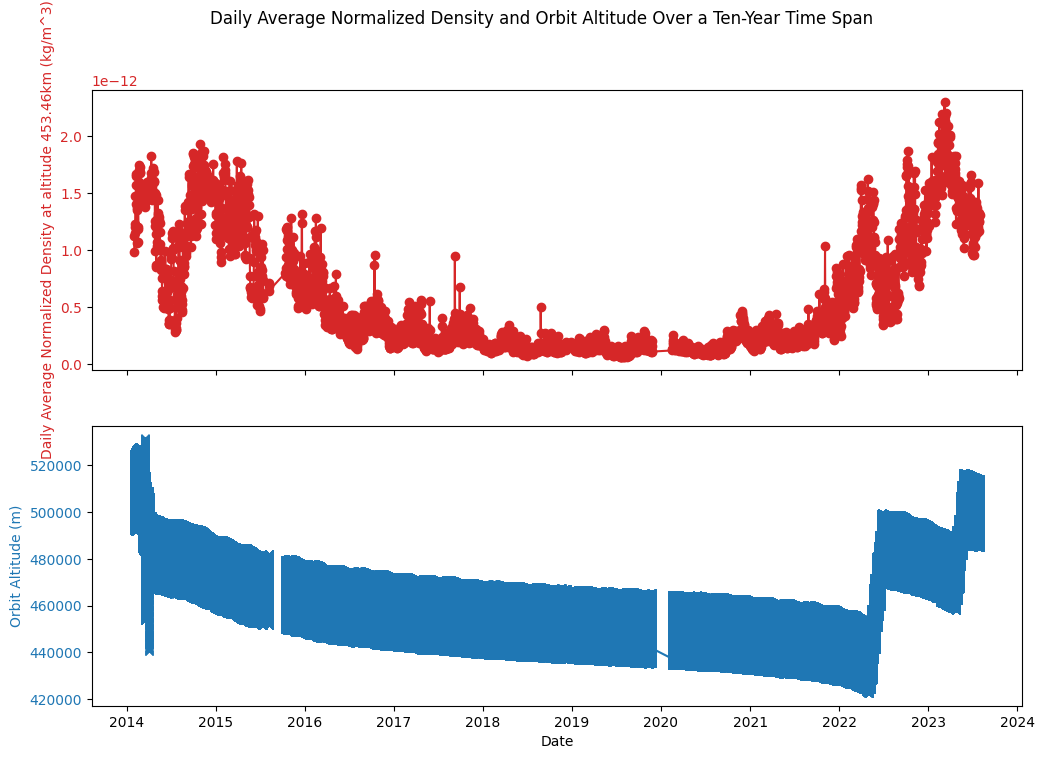

In [217]:
low_threshold = 1e-14
high_threshold = 1e6
window_size = 50  # It's like 5000 kilometers
threshold = 3

combined_df_10yrs = combined_df_10yrs[(combined_df_10yrs['Norm_dens_alt453.46'] > low_threshold) & (combined_df_10yrs['Norm_dens_alt453.46'] < high_threshold)]
z_scores = (combined_df_10yrs['Norm_dens_alt453.46'] - combined_df_10yrs['Norm_dens_alt453.46'].mean()) / combined_df_10yrs['Norm_dens_alt453.46'].std()
outliers = combined_df_10yrs[abs(z_scores) > threshold]
combined_df_10yrs[abs(z_scores) > threshold] = np.nan

combined_df_10yrs['rolling_median'] = combined_df_10yrs['Norm_dens_alt453.46'].rolling(window=window_size, min_periods=20, center=True).median()
combined_df_10yrs['rolling_std'] = combined_df_10yrs['Norm_dens_alt453.46'].rolling(window=window_size, min_periods=20, center=True).std()

combined_df_10yrs['outlier'] = (abs(combined_df_10yrs['Norm_dens_alt453.46'] - combined_df_10yrs['rolling_median']) / combined_df_10yrs['rolling_std']) > threshold


combined_df_10yrs['date'] = pd.to_datetime(combined_df_10yrs['time']).dt.date
daily_average_Normdensity_alt453 = combined_df_10yrs.groupby('date')[['Norm_dens_alt453.46', 'altitude']].mean().reset_index()
print(daily_average_Normdensity_alt453)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

color = 'tab:red'
ax1.set_ylabel('Daily Average Normalized Density at altitude 453.46km (kg/m^3)', color=color)
ax1.plot(pd.to_datetime(daily_average_Normdensity_alt453['date']), daily_average_Normdensity_alt453['Norm_dens_alt453.46'], marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2.set_ylabel('Orbit Altitude (m)', color='tab:blue')
ax2.plot(pd.to_datetime(combined_df_10yrs['date']), combined_df_10yrs['altitude'], marker='x', linestyle='-', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.xlabel('Date')
fig.suptitle('Daily Average Normalized Density and Orbit Altitude Over a Ten-Year Time Span', y=0.98)
plt.show()

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14316\613209744.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  combined_df_10yrs[abs(z_scores) > threshold] = np.nan


            date       density      altitude
0     2014-02-01  4.285174e-13  506143.00000
1     2014-02-02  4.923360e-13  506217.90625
2     2014-02-03  5.109292e-13  505773.06250
3     2014-02-04  5.337860e-13  505951.75000
4     2014-02-05  5.434833e-13  506163.06250
...          ...           ...           ...
3176  2023-07-27  6.661090e-13  495036.37500
3177  2023-07-28  6.215993e-13  495051.78125
3178  2023-07-29  6.709110e-13  495120.00000
3179  2023-07-30  7.103847e-13  494804.81250
3180  2023-07-31  7.027117e-13  494824.37500

[3181 rows x 3 columns]


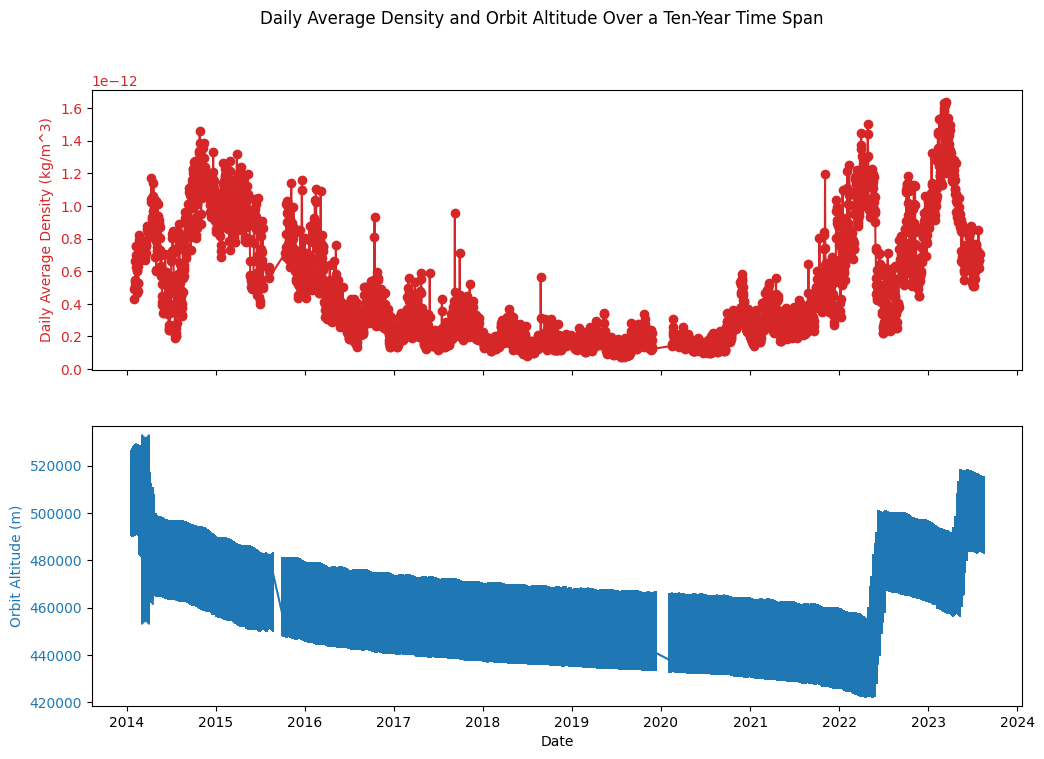

In [218]:
low_threshold = 1e-14
high_threshold = 1e6
window_size = 50  # It's like 5000 kilometers
threshold = 3

combined_df_10yrs = combined_df_10yrs[(combined_df_10yrs['density'] > low_threshold) & (combined_df_10yrs['density'] < high_threshold)]
z_scores = (combined_df_10yrs['density'] - combined_df_10yrs['density'].mean()) / combined_df_10yrs['density'].std()
outliers = combined_df_10yrs[abs(z_scores) > threshold]
combined_df_10yrs[abs(z_scores) > threshold] = np.nan

combined_df_10yrs['rolling_median'] = combined_df_10yrs['density'].rolling(window=window_size, min_periods=20, center=True).median()
combined_df_10yrs['rolling_std'] = combined_df_10yrs['density'].rolling(window=window_size, min_periods=20, center=True).std()

combined_df_10yrs['outlier'] = (abs(combined_df_10yrs['density'] - combined_df_10yrs['rolling_median']) / combined_df_10yrs['rolling_std']) > threshold


combined_df_10yrs['date'] = pd.to_datetime(combined_df_10yrs['time']).dt.date
daily_average_density = combined_df_10yrs.groupby('date')[['density', 'altitude']].mean().reset_index()
print(daily_average_density)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

color = 'tab:red'
ax1.set_ylabel('Daily Average Density (kg/m^3)', color=color)
ax1.plot(pd.to_datetime(daily_average_density['date']), daily_average_density['density'], marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2.set_ylabel('Orbit Altitude (m)', color='tab:blue')
ax2.plot(pd.to_datetime(combined_df_10yrs['date']), combined_df_10yrs['altitude'], marker='x', linestyle='-', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.xlabel('Date')
fig.suptitle('Daily Average Density and Orbit Altitude Over a Ten-Year Time Span', y=0.98)
plt.savefig('Tenyear_Daily average density_timeseries_altitude.png')

plt.show()

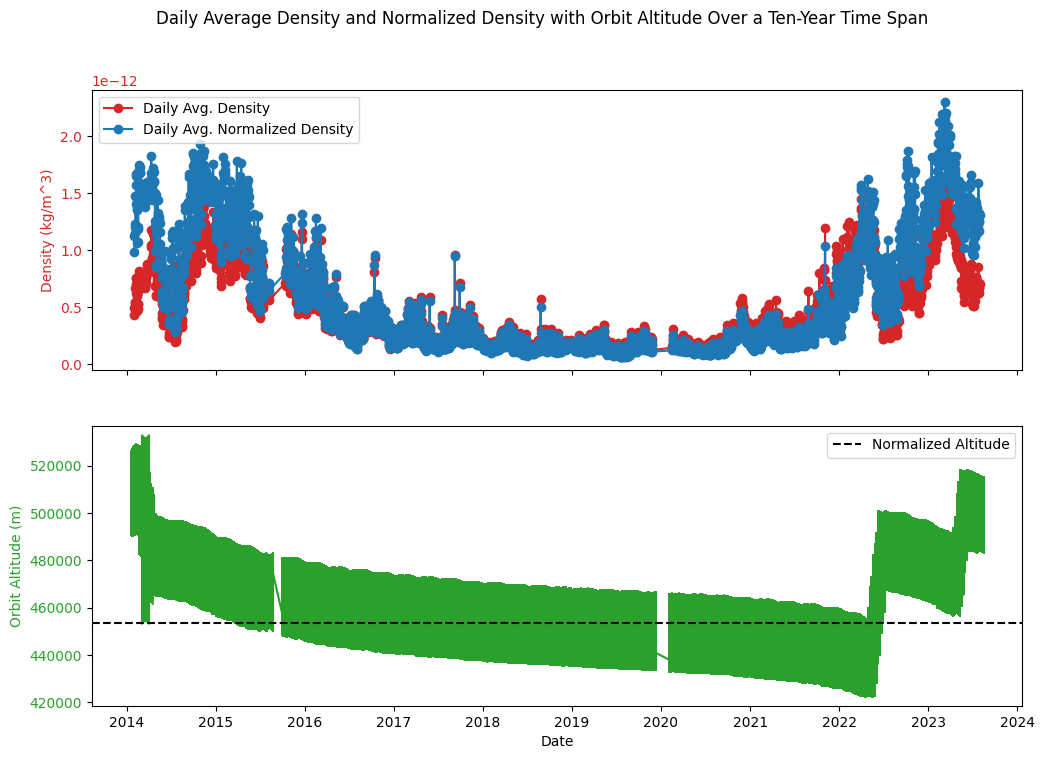

<Figure size 640x480 with 0 Axes>

In [227]:

# Assuming you have the dataframes daily_average_density and daily_average_Normdensity_alt453

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plotting daily average density and normalized density in the upper panel
color = 'tab:red'
ax1.set_ylabel('Density (kg/m^3)', color=color)
ax1.plot(pd.to_datetime(daily_average_density['date']), daily_average_density['density'], marker='o', linestyle='-', color=color, label='Daily Avg. Density')
ax1.tick_params(axis='y', labelcolor=color)

ax1.plot(pd.to_datetime(daily_average_Normdensity_alt453['date']), daily_average_Normdensity_alt453['Norm_dens_alt453.46'], marker='o', linestyle='-', color='tab:blue', label='Daily Avg. Normalized Density')

# Adding legend
ax1.legend(loc='upper left')

# Adding second y-axis for orbit altitude in the upper panel
ax2.set_ylabel('Orbit Altitude (m)', color='tab:green')
ax2.plot(pd.to_datetime(combined_df_10yrs['date']), combined_df_10yrs['altitude'], marker='x', linestyle='-', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Plotting orbit altitude in the lower panel
ax2.set_xlabel('Date')
altitude_line = 453469.15625
ax2.axhline(y=altitude_line, color='black', linestyle='--', label='Normalized Altitude')

# Title
fig.suptitle('Daily Average Density and Normalized Density with Orbit Altitude Over a Ten-Year Time Span', y=0.98)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()
plt.savefig('Combined_Density_and_Altitude_Plot.pdf')

In [80]:
filtered_df = combined_df_10yrs[((combined_df_10yrs['apex_lat'] >= 65) & (combined_df_10yrs['apex_lat'] <= 67.5))]
filtered_df_65_to_67_5 = pd.DataFrame(filtered_df)
with open('filtered_df_65_to_67_5.pickle', 'wb') as f:
    pickle.dump(filtered_df_65_to_67_5, f)
print(filtered_df_65_to_67_5)




                        time       density      altitude   latitude  \
383      2014-02-01 01:03:50  2.725692e-13  505730.28125  69.427361   
384      2014-02-01 01:04:00  2.793605e-13  505789.12500  70.055328   
385      2014-02-01 01:04:10  2.712588e-13  505845.43750  70.682945   
386      2014-02-01 01:04:20  2.762786e-13  505899.18750  71.310188   
467      2014-02-01 01:17:50  3.422360e-13  500348.12500  57.199112   
...                      ...           ...           ...        ...   
27570065 2023-07-31 23:30:50  8.732996e-13  494268.68750  71.481606   
27570138 2023-07-31 23:43:00  8.429428e-13  492326.25000  61.933971   
27570139 2023-07-31 23:43:10  8.462735e-13  492201.53125  61.301685   
27570140 2023-07-31 23:43:20  8.549948e-13  492075.43750  60.669209   
27570141 2023-07-31 23:43:30  8.365466e-13  491947.96875  60.036556   

           longitude  local_solar_time   apex_lat    apex_lon  Year  Month  \
383       115.648796          8.548480  65.324440 -172.214035  2014  

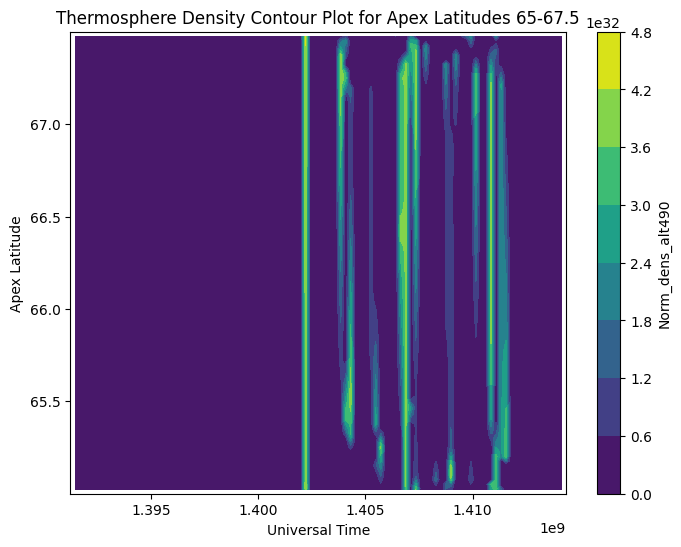

In [113]:

# Assuming filtered_df_65_to_67_5 contains the filtered DataFrame

# Sample data (replace this with your actual data)
universal_time_unix = filtered_df_65_to_67_5['time'].astype(np.int64) // 10**9
apex_lat = filtered_df_65_to_67_5_no_outliers['apex_lat'].values
density_values = filtered_df_65_to_67_5_no_outliers['Norm_dens_alt490'].values

min_length = min(len(universal_time_unix), len(apex_lat), len(density_values))
universal_time_unix = universal_time_unix[:min_length]
apex_lat = apex_lat[:min_length]
density_values = density_values[:min_length]


# Create a grid for contour plotting
x_grid, y_grid = np.meshgrid(np.linspace(min(universal_time_unix), max(universal_time_unix), 100),
                              np.linspace(min(apex_lat), max(apex_lat), 100))

# Interpolate density values onto the grid
density_grid = griddata((universal_time_unix, apex_lat), density_values, (x_grid, y_grid), method='linear')

# Plot contour
plt.figure(figsize=(8, 6))
plt.contourf(x_grid, y_grid, density_grid, cmap='viridis')
plt.colorbar(label='Norm_dens_alt490')
plt.xlabel('Universal Time')
plt.ylabel('Apex Latitude')
plt.title('Thermosphere Density Contour Plot for Apex Latitudes 65-67.5')
plt.show()


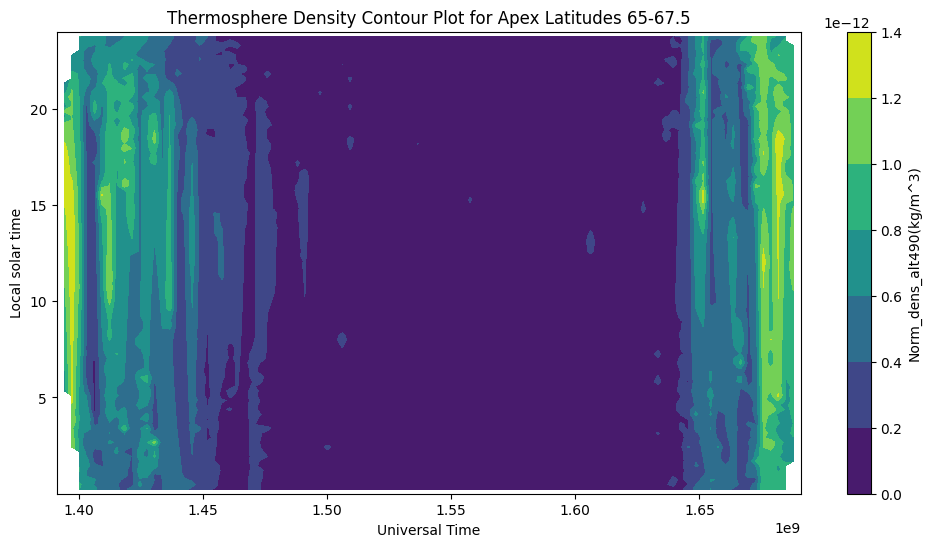

In [303]:

# Sample data (replace this with your actual data)
universal_time_unix = filtered_df_65_to_67_5_no_outliers['time'].astype(np.int64) // 10**9
local_solar_time = filtered_df_65_to_67_5_no_outliers['local_solar_time'].values
density_values = filtered_df_65_to_67_5_no_outliers['Norm_dens_alt490'].values

min_length = min(len(universal_time_unix), len(local_solar_time), len(density_values))
universal_time_unix = universal_time_unix[:min_length]
local_solar_time = local_solar_time[:min_length]
density_values = density_values[:min_length]


# Create a grid for contour plotting
x_grid, y_grid = np.meshgrid(np.linspace(min(universal_time_unix), max(universal_time_unix), 100),
                              np.linspace(min(local_solar_time), max(local_solar_time), 100))

# Interpolate density values onto the grid
density_grid = griddata((universal_time_unix, local_solar_time), density_values, (x_grid, y_grid), method='linear')

# Plot contour
plt.figure(figsize=(12, 6))
plt.contourf(x_grid, y_grid, density_grid, cmap='viridis')
plt.colorbar(label='Norm_dens_alt490(kg/m^3)')
plt.xlabel('Universal Time')
plt.ylabel('Local solar time')
plt.title('Thermosphere Density Contour Plot for Apex Latitudes 65-67.5')
plt.show()


                    time       density      altitude   latitude   longitude  \
383  2014-02-01 01:03:50  2.725692e-13  505730.28125  69.427361  115.648796   
384  2014-02-01 01:04:00  2.793605e-13  505789.12500  70.055328  115.831970   
385  2014-02-01 01:04:10  2.712588e-13  505845.43750  70.682945  116.029137   
386  2014-02-01 01:04:20  2.762786e-13  505899.18750  71.310188  116.241692   
467  2014-02-01 01:17:50  3.422360e-13  500348.12500  57.199112  281.815002   
468  2014-02-01 01:18:00  3.419090e-13  500186.21875  56.566395  281.863831   
469  2014-02-01 01:18:10  3.466174e-13  500023.75000  55.933533  281.909668   
470  2014-02-01 01:18:20  3.524731e-13  499860.78125  55.300533  281.952698   
950  2014-02-01 02:38:20  2.500612e-13  505748.96875  69.220634   91.868088   
951  2014-02-01 02:38:30  2.553807e-13  505810.62500  69.848694   92.047020   
952  2014-02-01 02:38:40  2.508586e-13  505869.75000  70.476425   92.239525   
953  2014-02-01 02:38:50  2.539286e-13  505926.34375

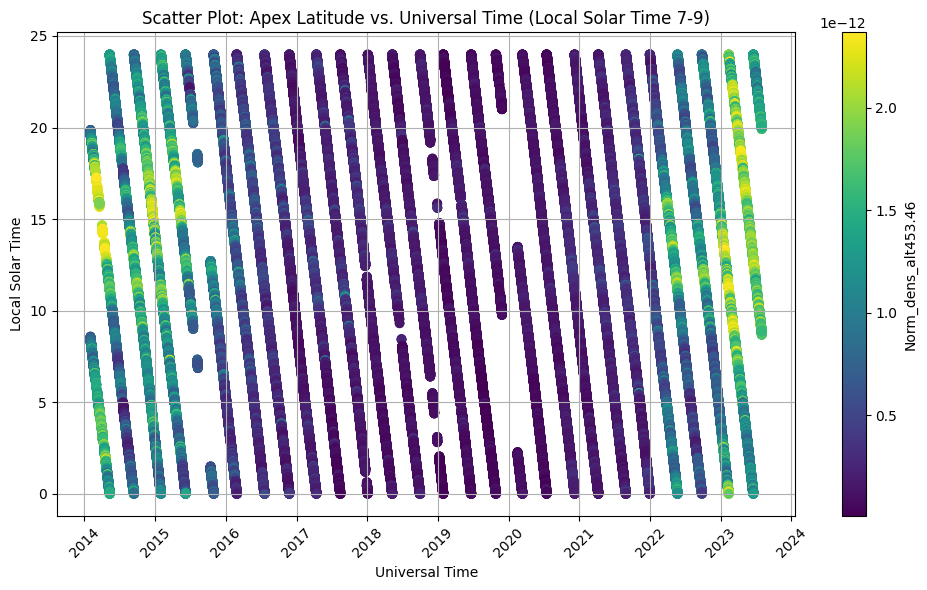

In [87]:

low_threshold = 1e-14
high_threshold = 1e6
window_size = 50  # It's like 5000 kilometers
threshold = 3

filtered_df_65_to_67_5 = filtered_df_65_to_67_5[(filtered_df_65_to_67_5['Norm_dens_alt453.46'] > low_threshold) & (filtered_df_65_to_67_5['Norm_dens_alt453.46'] < high_threshold)]
z_scores = (filtered_df_65_to_67_5['Norm_dens_alt453.46'] - filtered_df_65_to_67_5['Norm_dens_alt453.46'].mean()) / filtered_df_65_to_67_5['Norm_dens_alt453.46'].std()
filtered_df_65_to_67_5_no_outliers =  filtered_df_65_to_67_5[(z_scores < threshold)].copy()
with open('filtered_df_65_to_67_5_no_outliers.pickle', 'wb') as f:
    pickle.dump(filtered_df_65_to_67_5_no_outliers, f)

print(filtered_df_65_to_67_5_no_outliers.head(20))

plt.figure(figsize=(10, 6))

plt.scatter(filtered_df_65_to_67_5_no_outliers['time'], filtered_df_65_to_67_5_no_outliers['local_solar_time'], c=filtered_df_65_to_67_5_no_outliers['Norm_dens_alt453.46'], cmap='viridis')
plt.colorbar(label='Norm_dens_alt453.46')
plt.xlabel('Universal Time')
plt.ylabel('Local Solar Time')
plt.title('Scatter Plot: Apex Latitude vs. Universal Time (Local Solar Time 7-9)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

Grid Data:
                    9.0  20.0
2014-02-01 01:00:00  0.0  0.0
2014-02-01 03:00:00  0.0  0.0
2014-02-01 04:00:00  0.0  0.0
2014-02-01 06:00:00  0.0  0.0
2014-02-01 07:00:00  0.0  NaN
2014-02-01 08:00:00  NaN  0.0
2014-02-01 09:00:00  0.0  0.0
2014-02-01 10:00:00  0.0  NaN
2014-02-01 11:00:00  NaN  0.0
2014-02-01 12:00:00  0.0  0.0
2014-02-01 14:00:00  0.0  0.0
2014-02-01 15:00:00  0.0  0.0
2014-02-01 17:00:00  0.0  0.0
2014-02-01 18:00:00  0.0  NaN
2014-02-01 19:00:00  NaN  0.0
2014-02-01 20:00:00  0.0  0.0
2014-02-01 22:00:00  0.0  0.0
2014-02-01 23:00:00  0.0  0.0

Count of Observations:
                    9.0  20.0
2014-02-01 01:00:00    4    4
2014-02-01 03:00:00    4    4
2014-02-01 04:00:00    5    4
2014-02-01 06:00:00    4    4
2014-02-01 07:00:00    4    0
2014-02-01 08:00:00    0    4
2014-02-01 09:00:00    4    3
2014-02-01 10:00:00    4    0
2014-02-01 11:00:00    0    4
2014-02-01 12:00:00    4    4
2014-02-01 14:00:00    5    4
2014-02-01 15:00:00    4    4
2014-

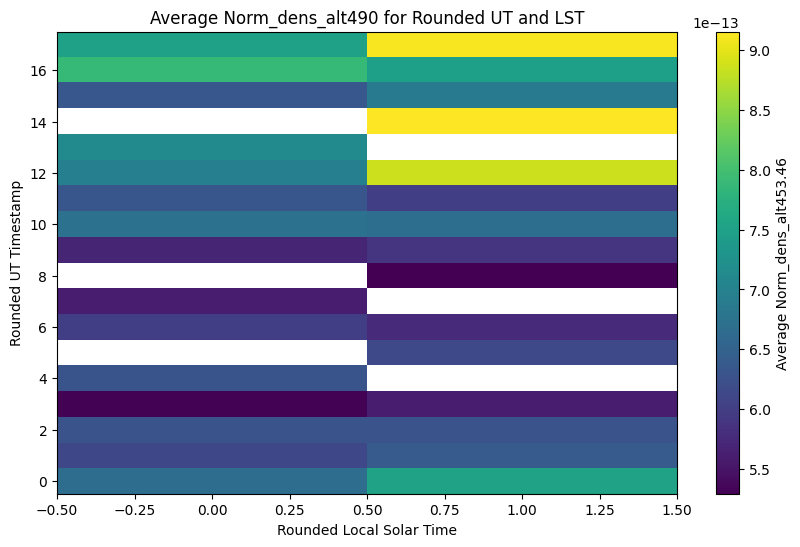

6.673142162838983e-13


KeyError: 'rounded_UT'

In [94]:

df = filtered_df_65_to_67_5_no_outliers.copy()

df['time'] = pd.to_datetime(df['time'])

df = df[df['time'].dt.date == pd.to_datetime('2014-02-01').date()]

df['rounded_UT'] = df['time'].dt.round('60min')

df['rounded_LST'] = np.ceil(df['local_solar_time'])

unique_rounded_UT = df['rounded_UT'].unique()
unique_rounded_LST = df['rounded_LST'].unique()

grid_data = pd.DataFrame(index=unique_rounded_UT, columns=unique_rounded_LST)
observations_count = pd.DataFrame(index=unique_rounded_UT, columns=unique_rounded_LST)

for rounded_UT in unique_rounded_UT:
    for rounded_LST in unique_rounded_LST:
        selected_data = df[(df['rounded_UT'] == rounded_UT) & (df['rounded_LST'] == rounded_LST)]
        average_value = selected_data['Norm_dens_alt453.46'].mean()
        count_value = selected_data.shape[0]
        grid_data.at[rounded_UT, rounded_LST] = average_value
        observations_count.at[rounded_UT, rounded_LST] = count_value

print("Grid Data:")
print(grid_data)

print("\nCount of Observations:")
print(observations_count)
grid_data_numeric = grid_data.astype(float)

plt.figure(figsize=(10, 6))
plt.imshow(grid_data_numeric, cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(label='Average Norm_dens_alt453.46')
plt.xlabel('Rounded Local Solar Time')
plt.ylabel('Rounded UT Timestamp')
plt.title('Average Norm_dens_alt490 for Rounded UT and LST')
plt.show()
first_cell_value = grid_data.iloc[0, 0]
print(first_cell_value)


pivot_table = grid_data.reset_index().pivot(index='rounded_UT', columns='rounded_LST', values='Norm_dens_alt453.46')

# Plot the pivot table as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".2f", cbar_kws={'label': 'Average Norm_dens_alt453.46'})
plt.xlabel('Rounded Local Solar Time')
plt.ylabel('Rounded UT Timestamp')
plt.title('Average Norm_dens_alt453.46 for Rounded UT and LST')
plt.show()

Grid Data:
                      0    1    2    3    4    5    6    7    8    9   ...  \
2014-02-01 01:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  ...   
2014-02-01 02:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2014-02-01 03:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  ...   
2014-02-01 04:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  ...   
2014-02-01 05:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2014-02-01 06:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  ...   
2014-02-01 07:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  ...   
2014-02-01 08:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2014-02-01 09:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  NaN  ...   
2014-02-01 10:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  NaN  ...   
2014-02-01 11:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2014-02-01 12:00:00  NaN  NaN  NaN  NaN  NaN  NaN  Na

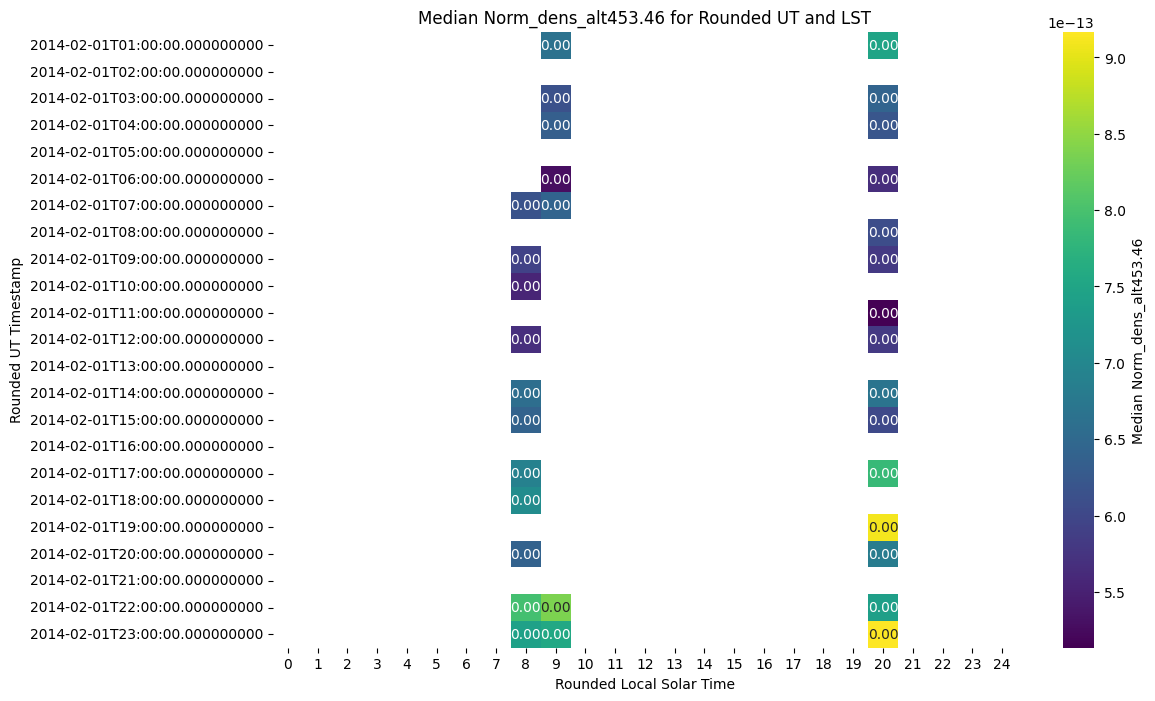

Count of Data Points in Each Column:
0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8     11
9      7
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20    15
21     0
22     0
23     0
24     0
dtype: int64


In [110]:

df = filtered_df_65_to_67_5_no_outliers.copy()

df['time'] = pd.to_datetime(df['time'])

df = df[df['time'].dt.date == pd.to_datetime('2014-02-01').date()]
df['rounded_UT'] = df['time'].dt.round('H')

df['rounded_LST'] = np.round(df['local_solar_time'])

unique_rounded_UT = pd.date_range(df['rounded_UT'].min(), df['rounded_UT'].max(), freq='H')
#unique_rounded_LST = np.arange(np.floor(df['rounded_LST'].min()), np.ceil(df['rounded_LST'].max()) + 1)
unique_rounded_LST = np.arange(0, 25, 1)
grid_data = pd.DataFrame(index=unique_rounded_UT, columns=unique_rounded_LST)
observations_count = pd.DataFrame(index=unique_rounded_UT, columns=unique_rounded_LST)

for rounded_UT in unique_rounded_UT:
    for rounded_LST in unique_rounded_LST:
        selected_data = df[(df['rounded_UT'] == rounded_UT) & (df['rounded_LST'] == rounded_LST)]
        median_value = selected_data['Norm_dens_alt453.46'].median()
        count_value = selected_data.shape[0]
        grid_data.at[rounded_UT, rounded_LST] = median_value
        observations_count.at[rounded_UT, rounded_LST] = count_value

print("Grid Data:")
print(grid_data)

print("\nObservations Count:")
print(observations_count)

grid_data_numeric = grid_data.apply(pd.to_numeric, errors='coerce')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(grid_data_numeric, cmap='viridis', annot=True, fmt=".2f", cbar_kws={'label': 'Median Norm_dens_alt453.46'})
plt.xlabel('Rounded Local Solar Time')
plt.ylabel('Rounded UT Timestamp')
plt.title('Median Norm_dens_alt453.46 for Rounded UT and LST')
plt.show()


grid_data_counts = grid_data.count(axis=0)

print("Count of Data Points in Each Column:")
print(grid_data_counts)


C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14208\128949083.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['rounded_UT'] = df_day['time'].dt.round('H')
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14208\128949083.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['rounded_LST'] = np.round(df_day['local_solar_time'])
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14208\128949083.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

Aggregate Grid Data:
                      0    1    2    3    4    5    6    7    8    9   ...  \
2014-02-01 01:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  ...   
2014-02-01 02:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2014-02-01 03:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  ...   
2014-02-01 04:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  ...   
2014-02-01 05:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
...                  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2014-05-01 19:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2014-05-01 20:00:00  NaN  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2014-05-01 21:00:00  NaN  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2014-05-01 22:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2014-05-01 23:00:00  NaN  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   

                      15   16   17   18   

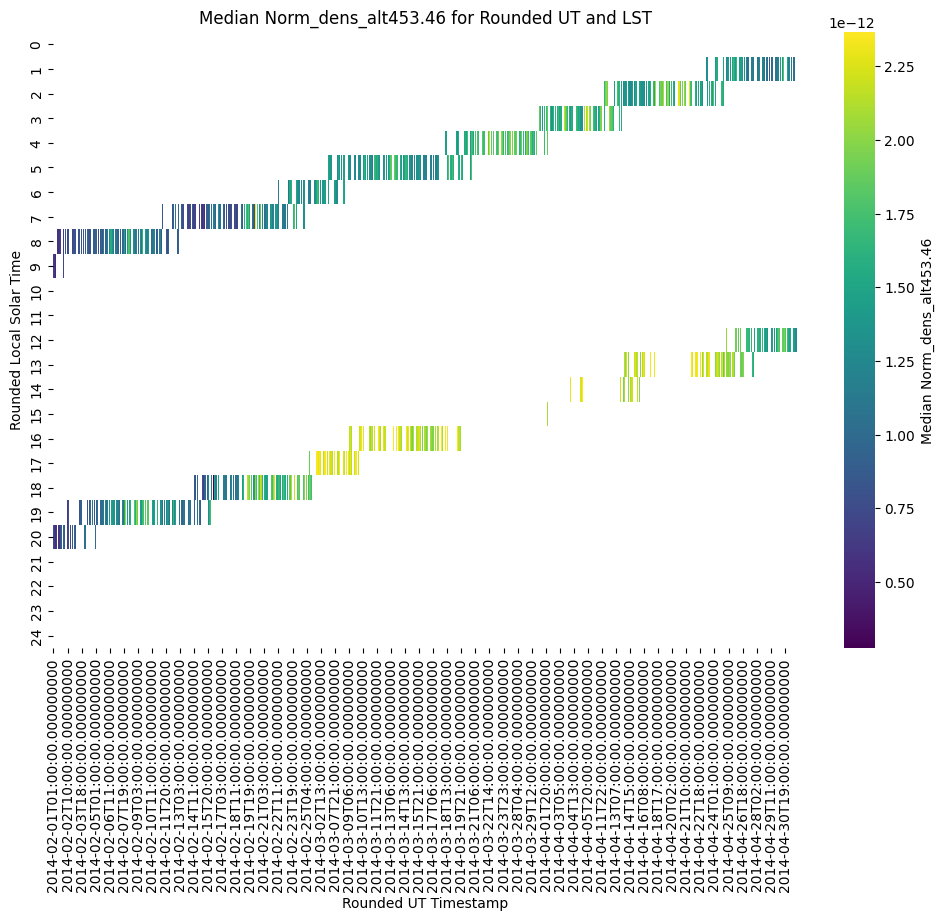

Count of Grid cells:
0       0
1     121
2     164
3     114
4     125
5     187
6      70
7     179
8     169
9       8
10      0
11      0
12     88
13     94
14     32
15      1
16    119
17     58
18    161
19    181
20     43
21      0
22      0
23      0
24      0
dtype: int64


In [118]:

df = filtered_df_65_to_67_5_no_outliers.copy()

df['time'] = pd.to_datetime(df['time'])

start_date = pd.to_datetime('2014-02-01')
num_days = 90

aggregate_grid_data = pd.DataFrame()
aggregate_observations_count = pd.DataFrame()

data_points_count = pd.DataFrame()

for i in range(num_days):
    current_date = start_date + pd.DateOffset(days=i)
    df_day = df[df['time'].dt.date == current_date.date()]
    
    if not df_day.empty:
        df_day['rounded_UT'] = df_day['time'].dt.round('H')
        
        df_day['rounded_LST'] = np.round(df_day['local_solar_time'])
        
        unique_rounded_UT = pd.date_range(df_day['rounded_UT'].min(), df_day['rounded_UT'].max(), freq='H')
        unique_rounded_LST = np.arange(0, 25, 1)
        
        grid_data_day = pd.DataFrame(index=unique_rounded_UT, columns=unique_rounded_LST)
        observations_count_day = pd.DataFrame(index=unique_rounded_UT, columns=unique_rounded_LST)
        
        for rounded_UT in unique_rounded_UT:
            for rounded_LST in unique_rounded_LST:
                selected_data = df_day[(df_day['rounded_UT'] == rounded_UT) & (df_day['rounded_LST'] == rounded_LST)]
                median_value = selected_data['Norm_dens_alt453.46'].median()
                count_value = selected_data.shape[0]
                grid_data_day.at[rounded_UT, rounded_LST] = median_value
                observations_count_day.at[rounded_UT, rounded_LST] = count_value
        
        aggregate_grid_data = pd.concat([aggregate_grid_data, grid_data_day])
        aggregate_observations_count = pd.concat([aggregate_observations_count, observations_count_day])
        data_points_day = df_day['rounded_LST'].value_counts().sort_index()
        data_points_count = pd.concat([data_points_count, data_points_day.to_frame(name='Data Points')])

print("Aggregate Grid Data:")
print(aggregate_grid_data)

print("\nAggregate Observations Count:")
print(aggregate_observations_count)


aggregate_grid_data_numeric = aggregate_grid_data.apply(pd.to_numeric, errors='coerce')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(aggregate_grid_data_numeric.transpose(), cmap='viridis', annot=False, fmt=".2f", cbar_kws={'label': 'Median Norm_dens_alt453.46'})
plt.xlabel('Rounded UT Timestamp')
plt.ylabel('Rounded Local Solar Time')
plt.title('Median Norm_dens_alt453.46 for Rounded UT and LST')
plt.show()

grid_data_counts = aggregate_grid_data.count(axis=0)

print("Count of Grid cells:")
print(grid_data_counts)

#### Grid table for Model density(UT versus Local solar time)

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14208\3807001367.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['rounded_UT'] = df_day['time'].dt.round('H')
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14208\3807001367.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['rounded_LST'] = np.round(df_day['local_solar_time'])
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14208\3807001367.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Aggregate Grid Data:
                      0    1    2    3    4    5    6    7    8    9   ...  \
2014-02-01 01:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  ...   
2014-02-01 02:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2014-02-01 03:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  ...   
2014-02-01 04:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  ...   
2014-02-01 05:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
...                  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2014-05-01 19:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2014-05-01 20:00:00  NaN  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2014-05-01 21:00:00  NaN  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2014-05-01 22:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2014-05-01 23:00:00  NaN  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   

                      15   16   17   18   

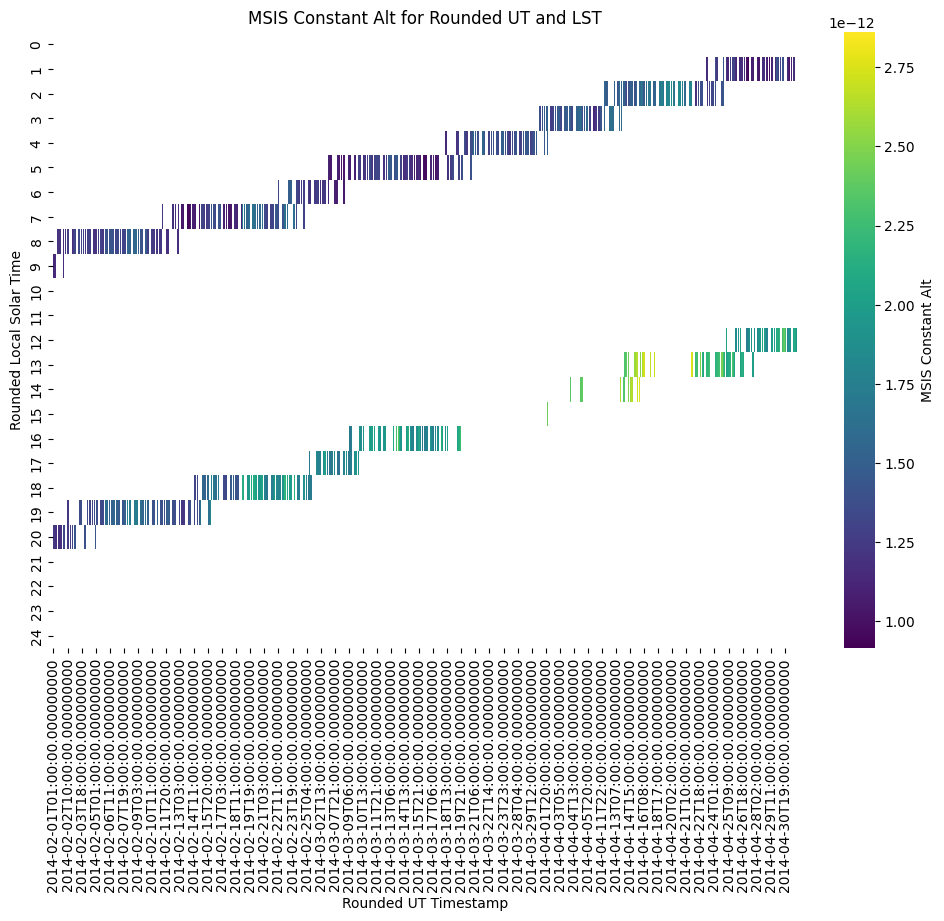

In [120]:

df = filtered_df_65_to_67_5_no_outliers.copy()

df['time'] = pd.to_datetime(df['time'])

start_date = pd.to_datetime('2014-02-01')
num_days = 90

aggregate_grid_data = pd.DataFrame()
aggregate_observations_count = pd.DataFrame()
aggregate_msis_data = pd.DataFrame()

data_points_count = pd.DataFrame()

for i in range(num_days):
    current_date = start_date + pd.DateOffset(days=i)
    df_day = df[df['time'].dt.date == current_date.date()]
    
    if not df_day.empty:
        df_day['rounded_UT'] = df_day['time'].dt.round('H')
        df_day['rounded_LST'] = np.round(df_day['local_solar_time'])
        
        unique_rounded_UT = pd.date_range(df_day['rounded_UT'].min(), df_day['rounded_UT'].max(), freq='H')
        unique_rounded_LST = np.arange(0, 25, 1)
        
        grid_data_day = pd.DataFrame(index=unique_rounded_UT, columns=unique_rounded_LST)
        observations_count_day = pd.DataFrame(index=unique_rounded_UT, columns=unique_rounded_LST)
        msis_data_day = pd.DataFrame(index=unique_rounded_UT, columns=unique_rounded_LST)
        
        for rounded_UT in unique_rounded_UT:
            for rounded_LST in unique_rounded_LST:
                selected_data = df_day[(df_day['rounded_UT'] == rounded_UT) & (df_day['rounded_LST'] == rounded_LST)]
                
                if not selected_data.empty:
                    value = selected_data['msis_constantalt'].values[0]
                else:
                    value = np.nan
                
                grid_data_day.at[rounded_UT, rounded_LST] = value
                observations_count_day.at[rounded_UT, rounded_LST] = selected_data.shape[0]
                msis_data_day.at[rounded_UT, rounded_LST] = value
        
        aggregate_grid_data = pd.concat([aggregate_grid_data, grid_data_day])
        aggregate_observations_count = pd.concat([aggregate_observations_count, observations_count_day])
        aggregate_msis_data = pd.concat([aggregate_msis_data, msis_data_day])
        data_points_day = df_day['rounded_LST'].value_counts().sort_index()
        data_points_count = pd.concat([data_points_count, data_points_day.to_frame(name='Data Points')])

print("Aggregate Grid Data:")
print(aggregate_grid_data)

print("\nAggregate Observations Count:")
print(aggregate_observations_count)

print("\nAggregate MSIS Data:")
print(aggregate_msis_data)

aggregate_grid_data_numeric = aggregate_grid_data.apply(pd.to_numeric, errors='coerce')
aggregate_msis_data_numeric = aggregate_msis_data.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(12, 8))
sns.heatmap(aggregate_msis_data_numeric.transpose(), cmap='viridis', annot=False, fmt=".2f", cbar_kws={'label': 'MSIS Constant Alt'})
plt.xlabel('Rounded UT Timestamp')
plt.ylabel('Rounded Local Solar Time')
plt.title('MSIS Constant Alt for Rounded UT and LST')
plt.show()


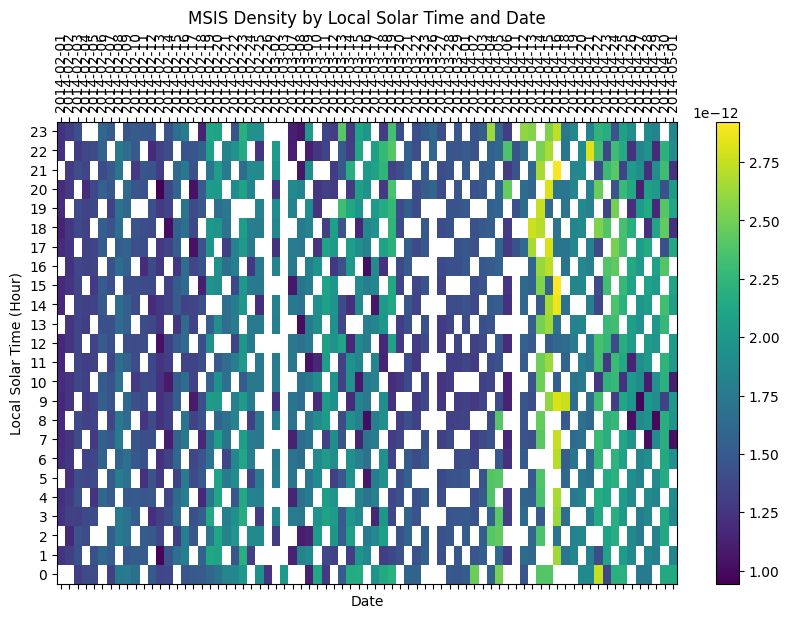

In [185]:

# Assuming df is already defined and cleaned
df = filtered_df_65_to_67_5_no_outliers.copy()

# Round the time column to the nearest hour
df['time'] = df['time'].dt.round('H')


# Split the time column into separate date and hour columns
df['date'] = df['time'].dt.floor('D')
df['lsthour'] = df['time'].dt.hour

# Filter the DataFrame by the desired date range
start_date = pd.Timestamp('2014-02-01')
end_date = start_date + pd.Timedelta(days=90)
df = df[(df['time'] >= start_date) & (df['time'] < end_date)]

# Get unique dates and hours
dates = df['date'].unique()
hours = np.arange(24)  # 0 to 23 hours

# Create an empty 2D DataArray for density values
density_2d = xr.DataArray(
    data=np.full((len(hours), len(dates)), np.nan), 
    coords=[hours, dates],
    dims=['hour', 'date']
)

# Fill the density DataArray
for _, row in df.iterrows():
    date = row['date']
    hour = row['lsthour']
    density = row['msis_constantalt']
    density_2d.loc[hour, date] = density

# Save the DataArray to a NetCDF file
file_path = 'C:/Users/jose_ne/Documents/density_Tw.nc'
density_2d.to_netcdf(file_path)

# Read the DataArray back from the NetCDF file
density_2d_read = xr.open_dataset(file_path)['__xarray_dataarray_variable__']

# Plotting the data
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# Convert DataArray to DataFrame for easier plotting
density_df = density_2d_read.to_dataframe().reset_index()

# Pivot the DataFrame to get the proper format for heatmap
pivot_df = density_df.pivot(index='hour', columns='date', values='__xarray_dataarray_variable__')

# Plot the heatmap
cax = ax.matshow(pivot_df, aspect='auto', origin='lower', cmap='viridis')

# Set axis labels
ax.set_xlabel('Date')
ax.set_ylabel('Local Solar Time (Hour)')
ax.set_title('MSIS Density by Local Solar Time and Date')

# Set x-ticks to show date labels
ax.set_xticks(np.arange(len(dates)))
ax.set_xticklabels(pd.to_datetime(dates).strftime('%Y-%m-%d'), rotation=90)

# Set y-ticks to show hour labels
ax.set_yticks(np.arange(24))
ax.set_yticklabels(np.arange(24))

# Add color bar
fig.colorbar(cax)

# Show the plot
plt.show()


Densities [[1.0208564e-12 9.8835599e-13 9.5767459e-13 ... 1.0793975e-12
  1.0626454e-12 1.0458916e-12]
 [1.0491325e-12 1.0152862e-12 9.8454047e-13 ... 1.1178086e-12
  1.0967300e-12 1.0765918e-12]
 [1.3015403e-12 1.2646513e-12 1.2287339e-12 ... 1.3595146e-12
  1.3447365e-12 1.3285839e-12]
 ...
 [9.5928387e-13 9.5430196e-13 9.7322790e-13 ... 1.1459524e-12
  1.0571843e-12 9.9307433e-13]
 [1.1715001e-12 1.1579451e-12 1.1665479e-12 ... 1.3589434e-12
  1.2745037e-12 1.2101397e-12]
 [9.7424185e-13 9.6930059e-13 9.8901670e-13 ... 1.1663792e-12
  1.0749843e-12 1.0089552e-12]]


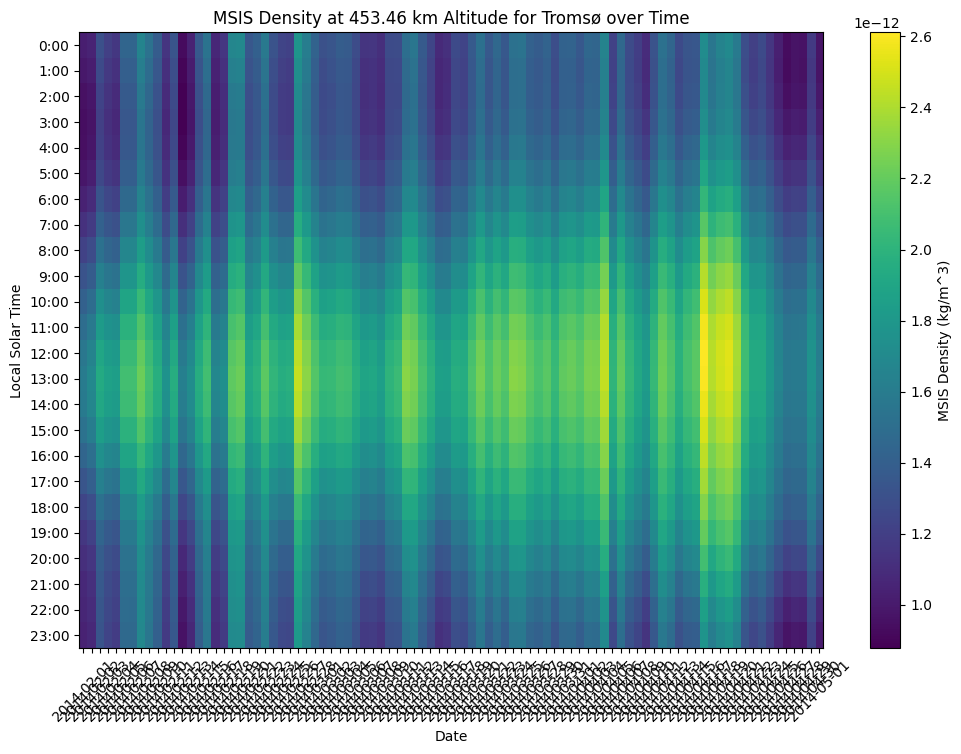

In [287]:

def fetch_msis_density_hourly(lat, lon, alt, start_date, num_days):
    # Generate datetime objects for each hour in the specified period
    num_hours = num_days * 24
    dates = [start_date + timedelta(hours=i) for i in range(num_hours)]
    
    # Create arrays for the altitude, latitude, and longitude
    alts = np.full(len(dates), alt)
    lats = np.full(len(dates), lat)
    lons = np.full(len(dates), lon)
    
    # Run the MSIS model
    output = msis.run(dates, lon, lat, alt)
    #print("Output", output.shape, output)
    msisresult = np.squeeze(output)
    #print("msisresult", msisresult.shape)
    densities = msisresult[:, 0]
    #print("Density",densities.shape,type(densities), densities)
    return dates, densities

def calculate_local_solar_time(lon, dates):
    lst = [(date + timedelta(hours=lon * 24 / 360)).hour for date in dates]
    return lst

def plot_density(dates, densities, lst, num_days):
    densities = densities.reshape((num_days, 24))
    lst = np.array(lst).reshape((num_days, 24))
    
    # Plot
    fig, ax = plt.subplots(figsize=(12, 8))
    im = ax.imshow(densities.T, cmap='viridis', aspect='auto', norm=Normalize(vmin=min(densities.flatten()), vmax=max(densities.flatten())))
    print("Densities", densities)
    # Customize ticks and labels
    ax.set_yticks(np.arange(24))
    ax.set_yticklabels([f'{i}:00' for i in range(24)])
    ax.set_ylabel('Local Solar Time')
    
    # Format x-axis ticks to show UT dates
    ax.set_xticks(np.arange(0, num_days, 1))
    date_formatter = FuncFormatter(lambda x, _: (start_date + timedelta(days=int(x))).strftime('%Y-%m-%d'))
    ax.xaxis.set_major_formatter(date_formatter)
    plt.xticks(rotation=45)
    ax.set_xlabel('Date')
    
    # Add color bar
    cbar = fig.colorbar(im, ax=ax, orientation='vertical')
    cbar.set_label('MSIS Density (kg/m^3)')
    
    plt.title('MSIS Density at 453.46 km Altitude for Tromsø over Time')
    plt.show()

# Parameters
lat = 69.66  # Tromsø latitude
lon = 18.94  # Tromsø longitude
alt = 453.46  # Altitude in km
f107 = [150]*2160
f107a = [150]*2160
ap = [4]*2160
aps = [[ap]*7]
start_date = datetime(2014, 2, 1)
num_days = 90

# Fetch MSIS density data hourly
dates, densities = fetch_msis_density_hourly(lat, lon, alt, start_date, num_days)

# Calculate local solar time (LST)
lst = calculate_local_solar_time(lon, dates)

# Plot the density data
plot_density(dates, densities, lst, num_days)


                  datehour  lsthour  msis_constantalt
383    2014-02-01 01:00:00        8      1.121641e-12
384    2014-02-01 01:00:00        8      1.120769e-12
385    2014-02-01 01:00:00        8      1.120046e-12
386    2014-02-01 01:00:00        8      1.119446e-12
467    2014-02-01 01:00:00       18      1.234373e-12
...                    ...      ...               ...
716778 2014-05-01 23:00:00        0      1.227997e-12
716842 2014-05-01 23:00:00       10      1.832981e-12
716843 2014-05-01 23:00:00       10      1.843669e-12
716844 2014-05-01 23:00:00       12      1.854391e-12
716845 2014-05-01 23:00:00       12      1.865151e-12

[7958 rows x 3 columns]
<xarray.Dataset>
Dimensions:           (datehour: 1245, lsthour: 10)
Coordinates:
  * datehour          (datehour) datetime64[ns] 2014-02-01T01:00:00 ... 2014-...
  * lsthour           (lsthour) int64 0 2 4 6 8 10 12 14 16 18
Data variables:
    msis_constantalt  (datehour, lsthour) float32 nan nan nan ... nan nan nan


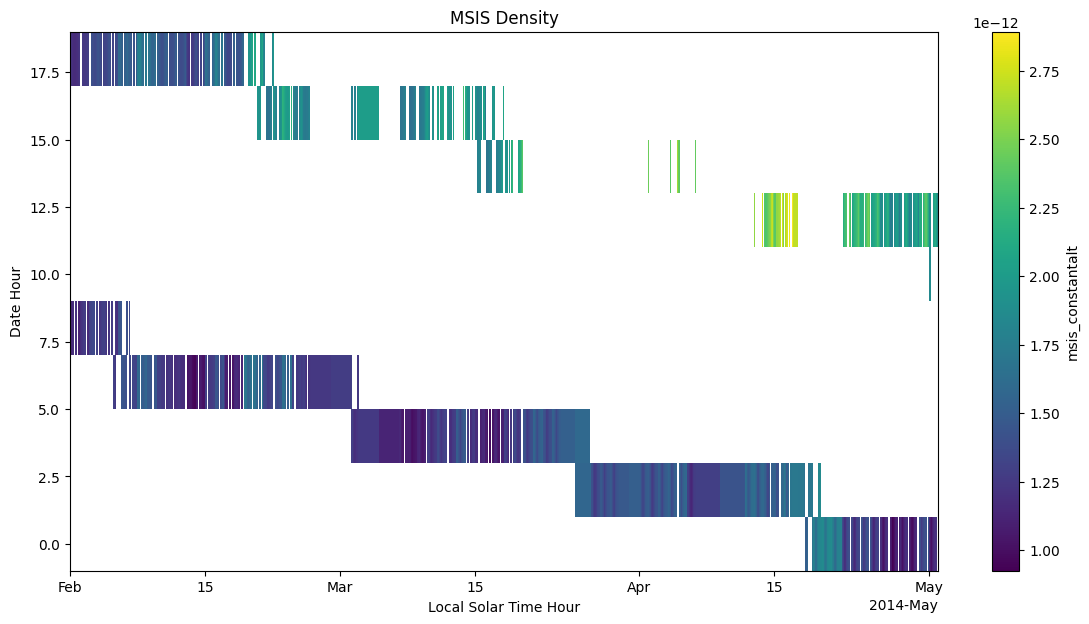

In [273]:

# Assuming df is already defined and cleaned
df = filtered_df_65_to_67_5_no_outliers.copy()

# Round the time column to the nearest hour
df['time'] = df['time'].dt.round('H')
df['datehour'] = df['time'].dt.floor('H')

# Convert local_solar_time to integer and apply rounding conditions for lsthour
def round_lst(lst):
    if lst >= 0 and lst < 2:
        return 0
    elif lst >= 2 and lst < 4:
        return 2
    elif lst >= 4 and lst < 6:
        return 4
    elif lst >= 6 and lst < 8:
        return 6
    elif lst >= 8 and lst < 10:
        return 8
    elif lst >= 10 and lst < 12:
        return 10
    elif lst >= 12 and lst < 14:
        return 12
    elif lst >= 14 and lst < 16:
        return 14
    elif lst >= 16 and lst < 18:
        return 16
    elif lst >= 18 and lst < 20:
        return 18
    elif lst >= 20 and lst < 22:
        return 20
    else:
        return 22

df['lsthour'] = df['local_solar_time'].apply(round_lst)

# Filter the DataFrame by the desired date range
start_date = pd.Timestamp('2014-02-01')
end_date = start_date + pd.Timedelta(days=90)
df = df[(df['time'] >= start_date) & (df['time'] < end_date)]

# Define dates with hourly resolution between start_date and end_date
dates = pd.date_range(start=start_date, end=end_date, freq='H')

# Define hours with interval of 2
hours = np.arange(0, 24, 2)

# Ensure the columns used for grouping are correctly named
df['datehour'] = df['time'].dt.floor('H')
df = df[['datehour', 'lsthour', 'msis_constantalt']]
print(df)
# Group by 'datehour' and 'lsthour' and take the mean of 'msisdensity'
df = df.groupby(['datehour', 'lsthour']).mean().reset_index()

# Convert the DataFrame to an xarray dataset
ds = df.set_index(['datehour', 'lsthour']).to_xarray()
print(ds)
# Transpose the DataArray for plotting
msisdensity_transposed = ds['msis_constantalt'].transpose()

# Plotting the transposed data
plt.figure(figsize=(14, 7))
msisdensity_transposed.plot()
plt.title('MSIS Density')
plt.xlabel('Local Solar Time Hour')
plt.ylabel('Date Hour')
plt.show()


DatetimeIndex(['2014-02-01 00:00:00', '2014-02-01 01:00:00',
               '2014-02-01 02:00:00', '2014-02-01 03:00:00',
               '2014-02-01 04:00:00', '2014-02-01 05:00:00',
               '2014-02-01 06:00:00', '2014-02-01 07:00:00',
               '2014-02-01 08:00:00', '2014-02-01 09:00:00',
               ...
               '2014-05-01 15:00:00', '2014-05-01 16:00:00',
               '2014-05-01 17:00:00', '2014-05-01 18:00:00',
               '2014-05-01 19:00:00', '2014-05-01 20:00:00',
               '2014-05-01 21:00:00', '2014-05-01 22:00:00',
               '2014-05-01 23:00:00', '2014-05-02 00:00:00'],
              dtype='datetime64[ns]', length=2161, freq='H')
<xarray.DataArray (hour: 12, date: 2161)>
array([[           nan,            nan,            nan, ...,
                   nan, 1.22799676e-12,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,        

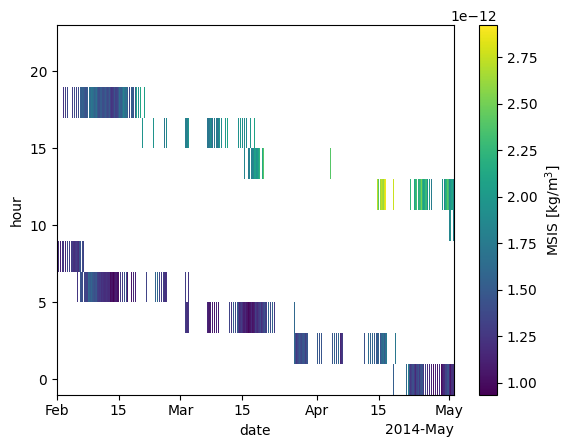

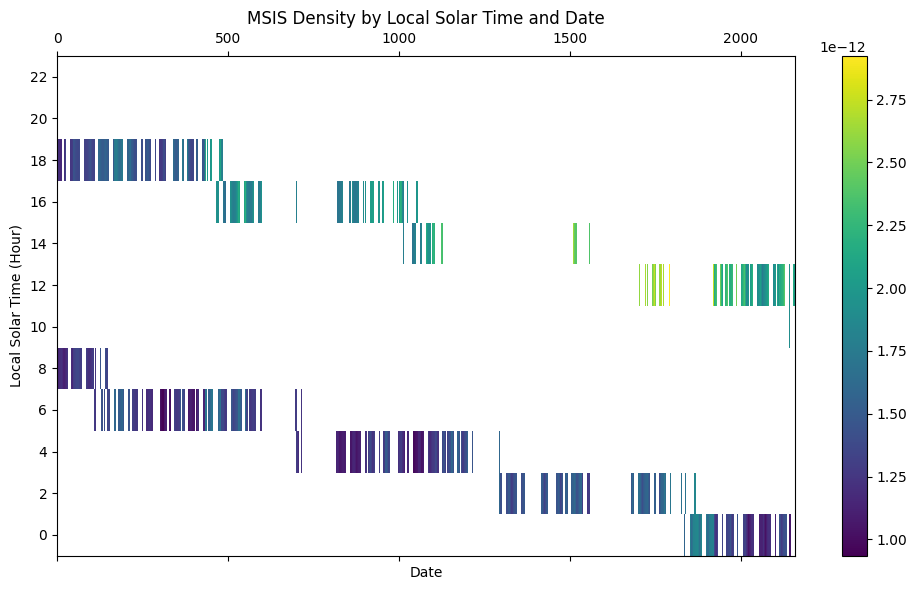

In [305]:

# Assuming df is already defined and cleaned
df = filtered_df_65_to_67_5_no_outliers.copy()

df['datehour'] = df['time'].dt.floor('H')

# Convert local_solar_time to integer and apply rounding conditions for lsthour
def round_lst(lst):
    if lst >= 0 and lst < 2:
        return 0
    elif lst >= 2 and lst < 4:
        return 2
    elif lst >= 4 and lst < 6:
        return 4
    elif lst >= 6 and lst < 8:
        return 6
    elif lst >= 8 and lst < 10:
        return 8
    elif lst >= 10 and lst < 12:
        return 10
    elif lst >= 12 and lst < 14:
        return 12
    elif lst >= 14 and lst < 16:
        return 14
    elif lst >= 16 and lst < 18:
        return 16
    elif lst >= 18 and lst < 20:
        return 18
    elif lst >= 20 and lst < 22:
        return 20
    else:
        return 22

df['lsthour'] = df['local_solar_time'].apply(round_lst)


start_date = pd.Timestamp('2014-02-01')
end_date = start_date + pd.Timedelta(days=90)
df = df[(df['time'] >= start_date) & (df['time'] < end_date)]

dates = pd.date_range(start=start_date, end=end_date, freq='H')
print(dates)
# Define hours with interval of 2
hours = np.arange(0, 24, 2)

# Initialize the DataArray
density_2d = xr.DataArray(
    data=np.full((len(hours), len(dates)), np.nan),
    coords=[hours, dates],
    dims=['hour', 'date'],
    attrs={'standard_name': 'MSIS', 'units': 'kg/m$^3$'}
)

# Fill the density DataArray
for _, row in df.iterrows():
    date = row['datehour']
    hour = row['lsthour']
    density = row['msis_constantalt']
    density_2d.loc[hour, date] = density

# Save the DataArray to a NetCDF file
file_path = 'C:/Users/jose_ne/Documents/density_T2220000.nc'
density_2d.to_netcdf(file_path)
print(density_2d)
# Read the DataArray back from the NetCDF file
density_2d_read = xr.open_dataset(file_path)['__xarray_dataarray_variable__']
density_2d.plot()

# Plotting the data
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# Convert DataArray to DataFrame for easier plotting
density_df = density_2d_read.to_dataframe().reset_index()
print(density_df)
# Pivot the DataFrame to get the proper format for heatmap
pivot_df = density_df.pivot(index='hour', columns='date', values='__xarray_dataarray_variable__')
print(pivot_df)
# Plot the heatmap
cax = ax.matshow(pivot_df, aspect='auto', origin='lower', cmap='viridis')

ax.set_xlabel('Date')
ax.set_ylabel('Local Solar Time (Hour)')
ax.set_title('MSIS Density by Local Solar Time and Date')

# Set x-ticks to show date labels
#ax.set_xticks(np.arange(len(dates)))
#ax.set_xticklabels(pd.to_datetime(dates).strftime('%Y-%m-%d'), rotation=90, ha='right')

# Set y-ticks to show hour labels
ax.set_yticks(np.arange(len(hours)))
ax.set_yticklabels(hours)

# Add color bar
fig.colorbar(cax)

plt.tight_layout()

# Show the plot
plt.show()


In [289]:

# Create time series from 2014-02-01 for 90 days with hourly resolution
start_date = datetime(2014, 2, 1)
end_date = start_date + timedelta(days=90)
time_series = pd.date_range(start=start_date, end=end_date, freq='H')

# Create a dataframe for the Tromsø region
# Tromsø coordinates: latitude ~69.6492, longitude ~18.9553
latitude = 69.6492
longitude = 18.9553

# Create arrays for latitude and longitude
lats = np.full(len(time_series), latitude, dtype='float32')
lons = np.full(len(time_series), longitude, dtype='float32')

# Set constant values for F10.7, F10.7a, and Ap
f107 = np.full(len(time_series), 150, dtype='float32')
f107a = np.full(len(time_series), 150, dtype='float32')
ap = np.full(len(time_series), 4, dtype='float32')
aps = np.tile(ap.reshape(-1, 1), (1, 7))

# Convert altitude to km (e.g., for a typical satellite orbit, use 450 km)
altitude_km = np.full(len(time_series), 450, dtype='float32')

# Run MSIS model
output = msis.run(time_series.to_pydatetime(), lons, lats, altitude_km, f107, f107a, aps)

# Process output
msis_grid = np.squeeze(output)
msis_dens_grid = msis_grid[:, 0]
msis_z_grid = pd.DataFrame(msis_dens_grid, columns=['Density'])

# Add time series to the dataframe
msis_z_grid['Time'] = time_series

print(msis_z_grid)

           Density                Time
0     8.955557e-13 2014-02-01 00:00:00
1     8.668734e-13 2014-02-01 01:00:00
2     8.395792e-13 2014-02-01 02:00:00
3     8.245983e-13 2014-02-01 03:00:00
4     8.306034e-13 2014-02-01 04:00:00
...            ...                 ...
2156  1.808154e-12 2014-05-01 20:00:00
2157  1.670224e-12 2014-05-01 21:00:00
2158  1.545367e-12 2014-05-01 22:00:00
2159  1.453718e-12 2014-05-01 23:00:00
2160  1.397245e-12 2014-05-02 00:00:00

[2161 rows x 2 columns]


           Density                Time                     LST  LST_hour  \
0     8.955557e-13 2014-02-01 00:00:00 2014-02-01 01:15:49.272         1   
22    9.318685e-13 2014-02-01 22:00:00 2014-02-01 23:15:49.272        23   
21    9.461948e-13 2014-02-01 21:00:00 2014-02-01 22:15:49.272        22   
20    9.716631e-13 2014-02-01 20:00:00 2014-02-01 21:15:49.272        21   
19    1.017415e-12 2014-02-01 19:00:00 2014-02-01 20:15:49.272        20   
...            ...                 ...                     ...       ...   
2136  1.404210e-12 2014-05-01 00:00:00 2014-05-01 01:15:49.272         1   
2135  1.460431e-12 2014-04-30 23:00:00 2014-05-01 00:15:49.272         0   
2146  2.206835e-12 2014-05-01 10:00:00 2014-05-01 11:15:49.272        11   
2159  1.453718e-12 2014-05-01 23:00:00 2014-05-02 00:15:49.272         0   
2160  1.397245e-12 2014-05-02 00:00:00 2014-05-02 01:15:49.272         1   

           Date  
0    2014-02-01  
22   2014-02-01  
21   2014-02-01  
20   2014-02-01

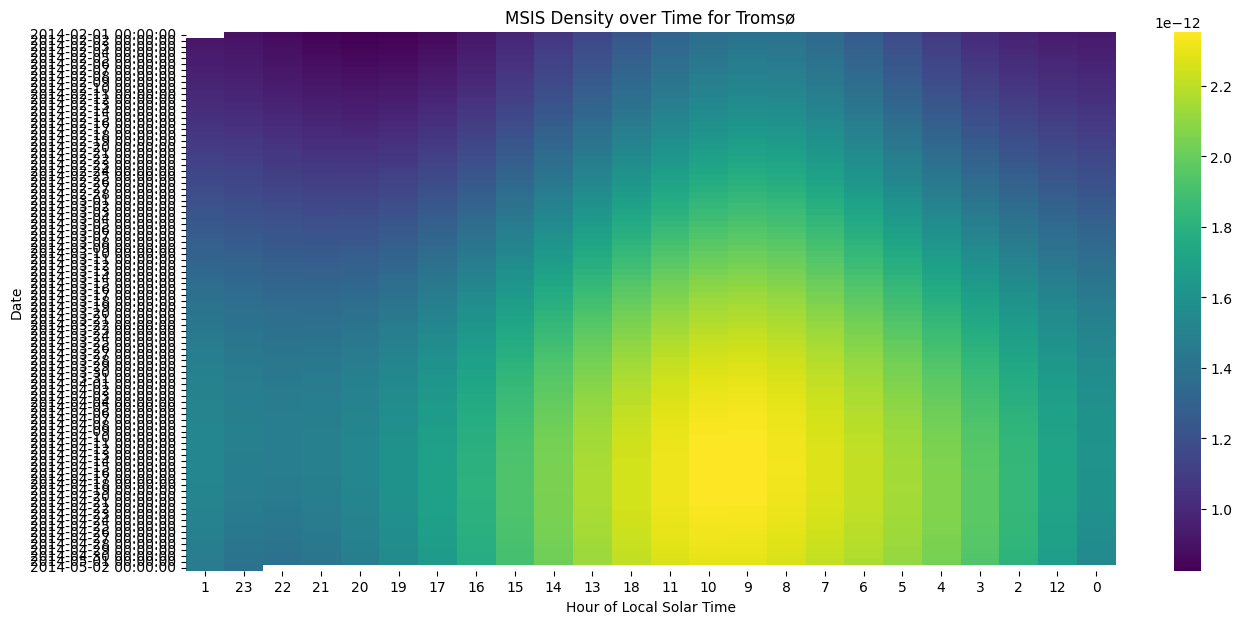

In [293]:

# 1. Create time series from 2014-02-01 for 90 days with hourly resolution
start_date = datetime(2014, 2, 1)
end_date = start_date + timedelta(days=90)
time_series = pd.date_range(start=start_date, end=end_date, freq='H')

# Tromsø coordinates
latitude = 69.6492
longitude = 18.9553

# 2. Create arrays for latitude and longitude
lats = np.full(len(time_series), latitude, dtype='float32')
lons = np.full(len(time_series), longitude, dtype='float32')

# 3. Set constant values for F10.7, F10.7a, and Ap
f107 = np.full(len(time_series), 150, dtype='float32')
f107a = np.full(len(time_series), 150, dtype='float32')
ap = np.full(len(time_series), 4, dtype='float32')
aps = np.tile(ap.reshape(-1, 1), (1, 7))

# 4. Convert altitude to km
altitude_km = np.full(len(time_series), 450, dtype='float32')

# 5. Run MSIS model
output = msis.run(time_series.to_pydatetime(), lons, lats, altitude_km, f107, f107a, aps)

# 6. Process output
msis_grid = np.squeeze(output)
msis_dens_grid = msis_grid[:, 0]
msis_df = pd.DataFrame({'Density': msis_dens_grid, 'Time': time_series})

# 7. Calculate Local Solar Time (LST)
def calculate_lst(time, longitude):
    lst = time + timedelta(hours=longitude / 15.0)
    return lst

msis_df['LST'] = msis_df['Time'].apply(lambda x: calculate_lst(x, longitude))

# 8. Split LST into hours and dates
msis_df['LST_hour'] = msis_df['LST'].dt.hour
msis_df['Date'] = msis_df['LST'].dt.floor('D')
# 9. Sort the DataFrame by Date to ensure sorted coordinates
msis_df = msis_df.sort_values(by='Date')
print(msis_df)

# 10. Create and Fill Xarray with MSIS Density Values
lst_hours = msis_df['LST_hour'].unique()
dates = msis_df['Date'].unique()

xarr = xr.DataArray(
    msis_df.pivot(index='Date', columns='LST_hour', values='Density').values,
    coords=[dates, lst_hours],
    dims=['Date', 'Hour']
)

# 11. Plot the Xarray using Seaborn heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(xarr, xticklabels=lst_hours, yticklabels=dates, cmap='viridis')
plt.title('MSIS Density over Time for Tromsø')
plt.xlabel('Hour of Local Solar Time')
plt.ylabel('Date')
plt.show()


           Density                Time                     LST
0     8.955557e-13 2014-02-01 00:00:00 2014-02-01 01:15:49.272
1     8.668734e-13 2014-02-01 01:00:00 2014-02-01 02:15:49.272
2     8.395792e-13 2014-02-01 02:00:00 2014-02-01 03:15:49.272
3     8.245983e-13 2014-02-01 03:00:00 2014-02-01 04:15:49.272
4     8.306034e-13 2014-02-01 04:00:00 2014-02-01 05:15:49.272
...            ...                 ...                     ...
2156  1.808154e-12 2014-05-01 20:00:00 2014-05-01 21:15:49.272
2157  1.670224e-12 2014-05-01 21:00:00 2014-05-01 22:15:49.272
2158  1.545367e-12 2014-05-01 22:00:00 2014-05-01 23:15:49.272
2159  1.453718e-12 2014-05-01 23:00:00 2014-05-02 00:15:49.272
2160  1.397245e-12 2014-05-02 00:00:00 2014-05-02 01:15:49.272

[2161 rows x 3 columns]


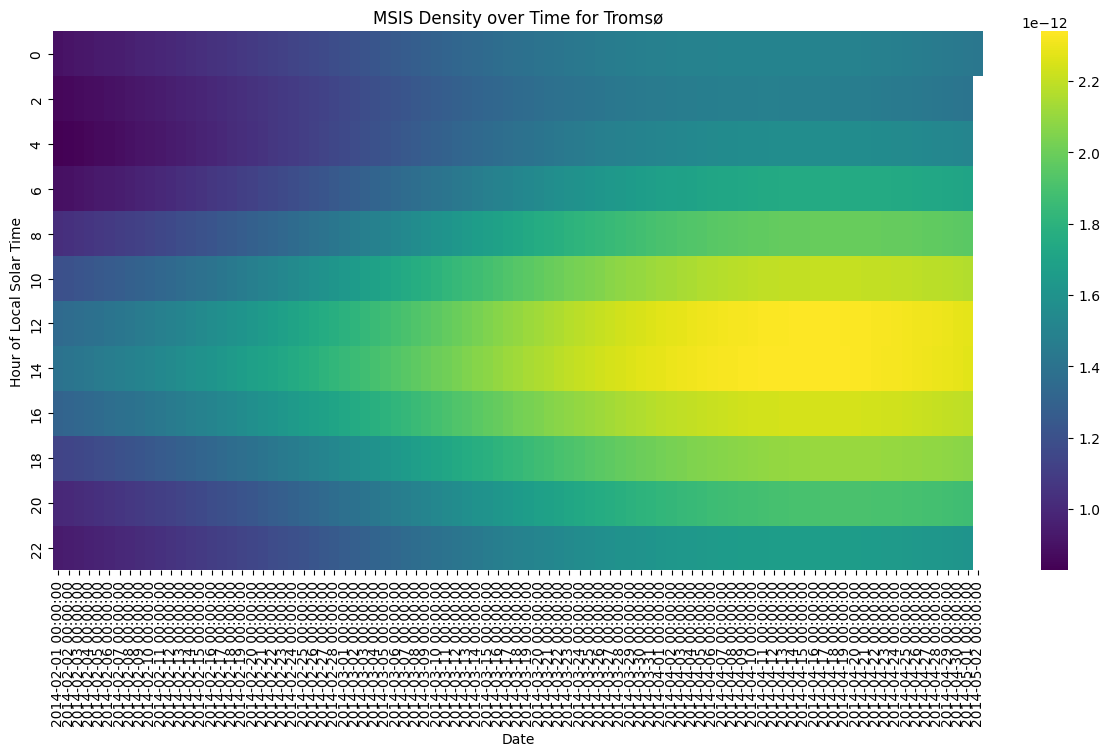

In [300]:

# 1. Create time series from 2014-02-01 for 90 days with hourly resolution
start_date = datetime(2014, 2, 1)
end_date = start_date + timedelta(days=90)
time_series = pd.date_range(start=start_date, end=end_date, freq='H')

# Tromsø coordinates
latitude = 69.6492
longitude = 18.9553

# 2. Create arrays for latitude and longitude
lats = np.full(len(time_series), latitude, dtype='float32')
lons = np.full(len(time_series), longitude, dtype='float32')

# 3. Set constant values for F10.7, F10.7a, and Ap
f107 = np.full(len(time_series), 150, dtype='float32')
f107a = np.full(len(time_series), 150, dtype='float32')
ap = np.full(len(time_series), 4, dtype='float32')
aps = np.tile(ap.reshape(-1, 1), (1, 7))

# 4. Convert altitude to km
altitude_km = np.full(len(time_series), 450, dtype='float32')

# 5. Run MSIS model
output = msis.run(time_series.to_pydatetime(), lons, lats, altitude_km, f107, f107a, aps)

# 6. Process output
msis_grid = np.squeeze(output)
msis_dens_grid = msis_grid[:, 0]
msis_df = pd.DataFrame({'Density': msis_dens_grid, 'Time': time_series})

# 7. Calculate Local Solar Time (LST)
def calculate_lst(time, longitude):
    lst = time + timedelta(hours=longitude / 15.0)
    return lst

msis_df['LST'] = msis_df['Time'].apply(lambda x: calculate_lst(x, longitude))
print(msis_df)
# 8. Split LST into hours and dates
msis_df['LST_hour'] = msis_df['LST'].dt.hour
msis_df['Date'] = msis_df['LST'].dt.floor('D')

# 9. Define binning logic for LST hours
def bin_lsth(lst_hour):
    return (lst_hour // 2) * 2

msis_df['LST_hour_bin'] = msis_df['LST_hour'].apply(bin_lsth)

# 10. Sort the DataFrame by Date and LST_hour_bin to ensure sorted coordinates
msis_df = msis_df.sort_values(by=['Date', 'LST_hour_bin'])

# 11. Create pivot table and fill missing values with NaN
pivot_table = msis_df.pivot_table(index='Date', columns='LST_hour_bin', values='Density', aggfunc='mean')

# 12. Create and Fill Xarray with MSIS Density Values
lst_hours_binned = msis_df['LST_hour_bin'].unique()
dates = msis_df['Date'].unique()

# Create DataArray with correct dimensions and coordinates
xarr = xr.DataArray(
    pivot_table.values,
    coords=[dates, lst_hours_binned],
    dims=['Date', 'Hour']  # Use 'Date' as y-axis and 'Hour' as x-axis
)

# 13. Plot the Xarray using Seaborn heatmap with transposed axes
plt.figure(figsize=(15, 7))
sns.heatmap(xarr.T, xticklabels=dates, yticklabels=lst_hours_binned, cmap='viridis')
plt.title('MSIS Density over Time for Tromsø')
plt.xlabel('Date')
plt.ylabel('Hour of Local Solar Time')
plt.show()
